<small><i>October 2021 - This notebook was created by [Oriol Pujol Vila](http://www.maia.ub.es/~oriol). Source and [license](./LICENSE.txt) info are in the folder.</i></small>

# Unsupervised learning in Keras

+ Autoencoders
+ Pretraining
+ Manifold Learning
+ Sparse Coding
+ A brief note on Variational Autoencoders


# Autoencoders

Let us train a simple autoencoder with a physical bottleneck. 

In [241]:
%reset -f
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras


In [242]:
# Load data
from sklearn.datasets import load_digits
data = load_digits()

idx = np.random.permutation(data.data.shape[0])
idx_train = idx[:-100]
idx_test = idx[-100:]

train = data.data[idx_train,:]
test = data.data[idx_test,:]

train_y = data.target[idx_train]
test_y = data.target[idx_test]

In [243]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(64, activation="linear"),
])

model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'])

model.fit(train, train, epochs=750, batch_size = 32)


Epoch 1/750
54/54 [==============================] - 0s 751us/step - loss: 47.9855 - accuracy: 0.0654
Epoch 2/750
54/54 [==============================] - 0s 583us/step - loss: 47.9270 - accuracy: 0.0438
Epoch 3/750
54/54 [==============================] - 0s 717us/step - loss: 50.4691 - accuracy: 0.0739
Epoch 4/750
54/54 [==============================] - 0s 641us/step - loss: 40.7128 - accuracy: 0.1019
Epoch 5/750
54/54 [==============================] - 0s 614us/step - loss: 32.4568 - accuracy: 0.1078
Epoch 6/750
54/54 [==============================] - 0s 612us/step - loss: 33.6820 - accuracy: 0.1049
Epoch 7/750
54/54 [==============================] - 0s 626us/step - loss: 23.3420 - accuracy: 0.0909
Epoch 8/750
54/54 [==============================] - 0s 659us/step - loss: 20.0369 - accuracy: 0.0262
Epoch 9/750
54/54 [==============================] - 0s 574us/step - loss: 19.5302 - accuracy: 0.0900
Epoch 10/750
54/54 [==============================] - 0s 643us/step - loss: 23.332

54/54 [==============================] - 0s 576us/step - loss: 7.5817 - accuracy: 0.0962
Epoch 160/750
54/54 [==============================] - 0s 568us/step - loss: 7.7020 - accuracy: 0.1101
Epoch 161/750
54/54 [==============================] - 0s 539us/step - loss: 7.6031 - accuracy: 0.1013
Epoch 162/750
54/54 [==============================] - 0s 561us/step - loss: 7.6294 - accuracy: 0.1051
Epoch 163/750
54/54 [==============================] - 0s 557us/step - loss: 7.6105 - accuracy: 0.0819
Epoch 164/750
54/54 [==============================] - 0s 630us/step - loss: 7.6451 - accuracy: 0.0964
Epoch 165/750
54/54 [==============================] - 0s 572us/step - loss: 8.0607 - accuracy: 0.0921
Epoch 166/750
54/54 [==============================] - 0s 555us/step - loss: 7.6691 - accuracy: 0.1013
Epoch 167/750
54/54 [==============================] - 0s 563us/step - loss: 7.7445 - accuracy: 0.0950
Epoch 168/750
54/54 [==============================] - 0s 542us/step - loss: 7.8868 - a

54/54 [==============================] - 0s 558us/step - loss: 6.5506 - accuracy: 0.0968
Epoch 318/750
54/54 [==============================] - 0s 556us/step - loss: 7.1601 - accuracy: 0.0861
Epoch 319/750
54/54 [==============================] - 0s 528us/step - loss: 6.9876 - accuracy: 0.1016
Epoch 320/750
54/54 [==============================] - 0s 543us/step - loss: 6.8532 - accuracy: 0.0737
Epoch 321/750
54/54 [==============================] - 0s 535us/step - loss: 6.9821 - accuracy: 0.1165
Epoch 322/750
54/54 [==============================] - 0s 567us/step - loss: 6.8780 - accuracy: 0.0799
Epoch 323/750
54/54 [==============================] - 0s 557us/step - loss: 6.6554 - accuracy: 0.0874
Epoch 324/750
54/54 [==============================] - 0s 558us/step - loss: 6.8821 - accuracy: 0.1032
Epoch 325/750
54/54 [==============================] - 0s 551us/step - loss: 6.5692 - accuracy: 0.0966
Epoch 326/750
54/54 [==============================] - 0s 589us/step - loss: 6.4543 - a

54/54 [==============================] - 0s 638us/step - loss: 6.0118 - accuracy: 0.0809
Epoch 476/750
54/54 [==============================] - 0s 616us/step - loss: 6.0019 - accuracy: 0.1153
Epoch 477/750
54/54 [==============================] - 0s 560us/step - loss: 6.1118 - accuracy: 0.1097
Epoch 478/750
54/54 [==============================] - 0s 630us/step - loss: 5.9628 - accuracy: 0.1048
Epoch 479/750
54/54 [==============================] - 0s 608us/step - loss: 6.1812 - accuracy: 0.1021
Epoch 480/750
54/54 [==============================] - 0s 592us/step - loss: 5.9724 - accuracy: 0.0993
Epoch 481/750
54/54 [==============================] - 0s 640us/step - loss: 5.5311 - accuracy: 0.1218
Epoch 482/750
54/54 [==============================] - 0s 621us/step - loss: 6.3106 - accuracy: 0.0990
Epoch 483/750
54/54 [==============================] - 0s 609us/step - loss: 5.9862 - accuracy: 0.1164
Epoch 484/750
54/54 [==============================] - 0s 603us/step - loss: 5.6527 - a

54/54 [==============================] - 0s 578us/step - loss: 5.5383 - accuracy: 0.1119
Epoch 634/750
54/54 [==============================] - 0s 574us/step - loss: 5.4565 - accuracy: 0.1028
Epoch 635/750
54/54 [==============================] - 0s 566us/step - loss: 5.6324 - accuracy: 0.1104
Epoch 636/750
54/54 [==============================] - 0s 551us/step - loss: 5.6520 - accuracy: 0.1017
Epoch 637/750
54/54 [==============================] - 0s 542us/step - loss: 5.1044 - accuracy: 0.1110
Epoch 638/750
54/54 [==============================] - 0s 550us/step - loss: 6.2575 - accuracy: 0.1274
Epoch 639/750
54/54 [==============================] - 0s 549us/step - loss: 5.5733 - accuracy: 0.1085
Epoch 640/750
54/54 [==============================] - 0s 557us/step - loss: 5.2193 - accuracy: 0.1100
Epoch 641/750
54/54 [==============================] - 0s 561us/step - loss: 5.4942 - accuracy: 0.1104
Epoch 642/750
54/54 [==============================] - 0s 549us/step - loss: 5.1287 - a

Let us check some predictions for training

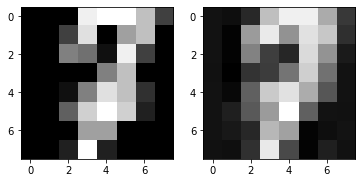

In [244]:
%matplotlib inline
import matplotlib.pyplot as plt


k= 100
reconstruction = model.predict(train[k:k+1,:])

plt.figure()
plt.subplot(1,2,1)
plt.imshow(train[k:k+1,:].reshape((8,8)),cmap="gray")
plt.subplot(1,2,2)
plt.imshow(reconstruction.reshape((8,8)),cmap="gray")

The same for test

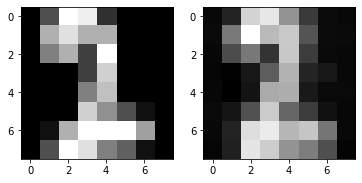

In [245]:
%matplotlib inline
import matplotlib.pyplot as plt


k= 1
reconstruction = model.predict(test[k:k+1,:])

plt.figure()
plt.subplot(1,2,1)
plt.imshow(test[k:k+1,:].reshape((8,8)),cmap="gray")
plt.subplot(1,2,2)
plt.imshow(reconstruction.reshape((8,8)),cmap="gray")

# Learning representations and pretraining

Let us use the intermediate representation for something.

In [246]:
tf.keras.backend.clear_session()

input_img = keras.Input(shape=(64,), name="image")
labels = keras.layers.Input(name="label", shape=(None,))

x = keras.layers.Dropout(0.1)(input_img)
x = keras.layers.Dense(32,activation="relu")(x)
x = keras.layers.Dense(16,activation="relu")(x)
encoder_output = keras.layers.Dense(2,activation="relu",name="encoder_output")(x)
x = keras.layers.Dense(16,activation="relu")(encoder_output)
x = keras.layers.Dense(32,activation="relu")(x)
decoder_output = keras.layers.Dense(64)(x)
model = keras.Model(inputs=input_img, outputs=decoder_output, name="a_model")

#keras.utils.plot_model(model, "autoencoder.png", show_shapes=True)

In [247]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss='mean_squared_error',
              metrics=['accuracy'])

history = model.fit(train, train, batch_size=64, epochs=2000, validation_split=0.2)


Epoch 1/2000
22/22 [==============================] - 1s 7ms/step - loss: 52.3708 - accuracy: 0.0117 - val_loss: 29.7557 - val_accuracy: 0.0235
Epoch 2/2000
22/22 [==============================] - 0s 2ms/step - loss: 26.2634 - accuracy: 0.0524 - val_loss: 20.6876 - val_accuracy: 0.1588
Epoch 3/2000
22/22 [==============================] - 0s 2ms/step - loss: 19.6627 - accuracy: 0.1280 - val_loss: 19.1796 - val_accuracy: 0.0088
Epoch 4/2000
22/22 [==============================] - 0s 3ms/step - loss: 18.7902 - accuracy: 0.0959 - val_loss: 18.9702 - val_accuracy: 0.0088
Epoch 5/2000
22/22 [==============================] - 0s 2ms/step - loss: 18.4657 - accuracy: 0.0349 - val_loss: 18.8998 - val_accuracy: 0.0088
Epoch 6/2000
22/22 [==============================] - 0s 2ms/step - loss: 18.3626 - accuracy: 0.0423 - val_loss: 18.7682 - val_accuracy: 0.0088
Epoch 7/2000
22/22 [==============================] - 0s 2ms/step - loss: 18.4611 - accuracy: 0.0460 - val_loss: 19.1290 - val_accuracy:

22/22 [==============================] - 0s 2ms/step - loss: 18.1019 - accuracy: 0.0364 - val_loss: 18.8375 - val_accuracy: 0.0088
Epoch 114/2000
22/22 [==============================] - 0s 2ms/step - loss: 18.3201 - accuracy: 0.0261 - val_loss: 18.7071 - val_accuracy: 0.0294
Epoch 115/2000
22/22 [==============================] - 0s 2ms/step - loss: 18.3246 - accuracy: 0.0450 - val_loss: 18.7648 - val_accuracy: 0.0088
Epoch 116/2000
22/22 [==============================] - 0s 2ms/step - loss: 18.1965 - accuracy: 0.0129 - val_loss: 18.8797 - val_accuracy: 0.0353
Epoch 117/2000
22/22 [==============================] - 0s 2ms/step - loss: 18.2140 - accuracy: 0.1052 - val_loss: 19.1371 - val_accuracy: 0.0088
Epoch 118/2000
22/22 [==============================] - 0s 2ms/step - loss: 18.4148 - accuracy: 0.0427 - val_loss: 18.9745 - val_accuracy: 0.0088
Epoch 119/2000
22/22 [==============================] - 0s 2ms/step - loss: 18.1138 - accuracy: 0.0459 - val_loss: 18.9170 - val_accuracy: 

22/22 [==============================] - 0s 2ms/step - loss: 18.1603 - accuracy: 0.1259 - val_loss: 18.7680 - val_accuracy: 0.0088
Epoch 226/2000
22/22 [==============================] - 0s 2ms/step - loss: 18.4638 - accuracy: 0.0428 - val_loss: 18.7717 - val_accuracy: 0.0088
Epoch 227/2000
22/22 [==============================] - 0s 2ms/step - loss: 18.1746 - accuracy: 0.0239 - val_loss: 18.7185 - val_accuracy: 0.0676
Epoch 228/2000
22/22 [==============================] - 0s 2ms/step - loss: 18.1847 - accuracy: 0.1234 - val_loss: 18.8517 - val_accuracy: 0.0088
Epoch 229/2000
22/22 [==============================] - 0s 2ms/step - loss: 18.0456 - accuracy: 0.0306 - val_loss: 18.8790 - val_accuracy: 0.0088
Epoch 230/2000
22/22 [==============================] - 0s 2ms/step - loss: 18.2902 - accuracy: 0.0080 - val_loss: 18.9181 - val_accuracy: 0.0294
Epoch 231/2000
22/22 [==============================] - 0s 2ms/step - loss: 18.3583 - accuracy: 0.0890 - val_loss: 18.8824 - val_accuracy: 

22/22 [==============================] - 0s 2ms/step - loss: 15.6027 - accuracy: 0.0737 - val_loss: 16.2670 - val_accuracy: 0.0824
Epoch 338/2000
22/22 [==============================] - 0s 2ms/step - loss: 15.5560 - accuracy: 0.0692 - val_loss: 16.0924 - val_accuracy: 0.0824
Epoch 339/2000
22/22 [==============================] - 0s 2ms/step - loss: 15.3243 - accuracy: 0.0818 - val_loss: 16.1041 - val_accuracy: 0.0706
Epoch 340/2000
22/22 [==============================] - 0s 2ms/step - loss: 15.5234 - accuracy: 0.0761 - val_loss: 15.8502 - val_accuracy: 0.1029
Epoch 341/2000
22/22 [==============================] - 0s 2ms/step - loss: 15.4714 - accuracy: 0.0962 - val_loss: 15.6957 - val_accuracy: 0.1000
Epoch 342/2000
22/22 [==============================] - 0s 2ms/step - loss: 15.1125 - accuracy: 0.0970 - val_loss: 15.7566 - val_accuracy: 0.1118
Epoch 343/2000
22/22 [==============================] - 0s 2ms/step - loss: 14.9923 - accuracy: 0.0944 - val_loss: 15.9311 - val_accuracy: 

22/22 [==============================] - 0s 2ms/step - loss: 11.8649 - accuracy: 0.1039 - val_loss: 12.0868 - val_accuracy: 0.1118
Epoch 450/2000
22/22 [==============================] - 0s 2ms/step - loss: 11.7883 - accuracy: 0.0924 - val_loss: 12.2731 - val_accuracy: 0.1500
Epoch 451/2000
22/22 [==============================] - 0s 2ms/step - loss: 11.8062 - accuracy: 0.0953 - val_loss: 12.1631 - val_accuracy: 0.1294
Epoch 452/2000
22/22 [==============================] - 0s 2ms/step - loss: 11.7475 - accuracy: 0.1159 - val_loss: 12.0588 - val_accuracy: 0.1529
Epoch 453/2000
22/22 [==============================] - 0s 2ms/step - loss: 11.6179 - accuracy: 0.0993 - val_loss: 12.8975 - val_accuracy: 0.1353
Epoch 454/2000
22/22 [==============================] - 0s 2ms/step - loss: 11.6397 - accuracy: 0.0820 - val_loss: 12.3051 - val_accuracy: 0.1176
Epoch 455/2000
22/22 [==============================] - 0s 2ms/step - loss: 11.7940 - accuracy: 0.0971 - val_loss: 12.1402 - val_accuracy: 

22/22 [==============================] - 0s 2ms/step - loss: 10.3240 - accuracy: 0.1183 - val_loss: 10.9944 - val_accuracy: 0.1029
Epoch 562/2000
22/22 [==============================] - 0s 3ms/step - loss: 10.6003 - accuracy: 0.1073 - val_loss: 11.1613 - val_accuracy: 0.0971
Epoch 563/2000
22/22 [==============================] - 0s 2ms/step - loss: 10.3324 - accuracy: 0.1008 - val_loss: 10.7140 - val_accuracy: 0.0853
Epoch 564/2000
22/22 [==============================] - 0s 2ms/step - loss: 10.4004 - accuracy: 0.0999 - val_loss: 10.7761 - val_accuracy: 0.1059
Epoch 565/2000
22/22 [==============================] - 0s 2ms/step - loss: 10.5343 - accuracy: 0.1224 - val_loss: 10.5972 - val_accuracy: 0.1206
Epoch 566/2000
22/22 [==============================] - 0s 2ms/step - loss: 10.3751 - accuracy: 0.0920 - val_loss: 10.7233 - val_accuracy: 0.0912
Epoch 567/2000
22/22 [==============================] - 0s 2ms/step - loss: 10.2728 - accuracy: 0.1037 - val_loss: 10.7583 - val_accuracy: 

22/22 [==============================] - 0s 2ms/step - loss: 9.9688 - accuracy: 0.0837 - val_loss: 10.2676 - val_accuracy: 0.0471
Epoch 674/2000
22/22 [==============================] - 0s 2ms/step - loss: 9.8331 - accuracy: 0.0828 - val_loss: 10.2099 - val_accuracy: 0.1118
Epoch 675/2000
22/22 [==============================] - 0s 2ms/step - loss: 9.8254 - accuracy: 0.0959 - val_loss: 10.1990 - val_accuracy: 0.1059
Epoch 676/2000
22/22 [==============================] - 0s 2ms/step - loss: 10.0182 - accuracy: 0.0911 - val_loss: 10.2395 - val_accuracy: 0.0735
Epoch 677/2000
22/22 [==============================] - 0s 2ms/step - loss: 9.8825 - accuracy: 0.0892 - val_loss: 10.1139 - val_accuracy: 0.0882
Epoch 678/2000
22/22 [==============================] - 0s 2ms/step - loss: 9.8744 - accuracy: 0.0772 - val_loss: 10.1080 - val_accuracy: 0.0735
Epoch 679/2000
22/22 [==============================] - 0s 2ms/step - loss: 9.9598 - accuracy: 0.0820 - val_loss: 10.2845 - val_accuracy: 0.0500

Epoch 786/2000
22/22 [==============================] - 0s 2ms/step - loss: 9.5695 - accuracy: 0.0993 - val_loss: 9.9483 - val_accuracy: 0.0706
Epoch 787/2000
22/22 [==============================] - 0s 2ms/step - loss: 9.5830 - accuracy: 0.0987 - val_loss: 9.9506 - val_accuracy: 0.0618
Epoch 788/2000
22/22 [==============================] - 0s 2ms/step - loss: 9.5030 - accuracy: 0.0990 - val_loss: 10.1604 - val_accuracy: 0.0882
Epoch 789/2000
22/22 [==============================] - 0s 2ms/step - loss: 9.5157 - accuracy: 0.1055 - val_loss: 9.9347 - val_accuracy: 0.0647
Epoch 790/2000
22/22 [==============================] - 0s 2ms/step - loss: 9.5443 - accuracy: 0.0893 - val_loss: 10.1672 - val_accuracy: 0.0529
Epoch 791/2000
22/22 [==============================] - 0s 2ms/step - loss: 9.5559 - accuracy: 0.0851 - val_loss: 10.0618 - val_accuracy: 0.0706
Epoch 792/2000
22/22 [==============================] - 0s 2ms/step - loss: 9.6042 - accuracy: 0.0830 - val_loss: 9.9974 - val_accura

Epoch 843/2000
22/22 [==============================] - 0s 2ms/step - loss: 9.3032 - accuracy: 0.0813 - val_loss: 9.8784 - val_accuracy: 0.0471
Epoch 844/2000
22/22 [==============================] - 0s 2ms/step - loss: 9.5255 - accuracy: 0.0825 - val_loss: 9.8338 - val_accuracy: 0.0941
Epoch 845/2000
22/22 [==============================] - 0s 2ms/step - loss: 9.3784 - accuracy: 0.0896 - val_loss: 9.6119 - val_accuracy: 0.1235
Epoch 846/2000
22/22 [==============================] - 0s 2ms/step - loss: 9.4821 - accuracy: 0.0984 - val_loss: 9.6981 - val_accuracy: 0.0735
Epoch 847/2000
22/22 [==============================] - 0s 2ms/step - loss: 9.5198 - accuracy: 0.0830 - val_loss: 9.8501 - val_accuracy: 0.0912
Epoch 848/2000
22/22 [==============================] - 0s 2ms/step - loss: 9.4905 - accuracy: 0.0968 - val_loss: 9.9788 - val_accuracy: 0.0353
Epoch 849/2000
22/22 [==============================] - 0s 2ms/step - loss: 9.4174 - accuracy: 0.0777 - val_loss: 9.7064 - val_accuracy:

Epoch 900/2000
22/22 [==============================] - 0s 2ms/step - loss: 9.5433 - accuracy: 0.0847 - val_loss: 9.5450 - val_accuracy: 0.1206
Epoch 901/2000
22/22 [==============================] - 0s 2ms/step - loss: 9.3048 - accuracy: 0.1071 - val_loss: 10.3784 - val_accuracy: 0.0618
Epoch 902/2000
22/22 [==============================] - 0s 2ms/step - loss: 9.2412 - accuracy: 0.0939 - val_loss: 9.7879 - val_accuracy: 0.0765
Epoch 903/2000
22/22 [==============================] - 0s 2ms/step - loss: 9.1604 - accuracy: 0.0847 - val_loss: 9.6959 - val_accuracy: 0.1059
Epoch 904/2000
22/22 [==============================] - 0s 2ms/step - loss: 9.4098 - accuracy: 0.0753 - val_loss: 9.6105 - val_accuracy: 0.1088
Epoch 905/2000
22/22 [==============================] - 0s 2ms/step - loss: 9.5582 - accuracy: 0.0867 - val_loss: 9.7242 - val_accuracy: 0.1000
Epoch 906/2000
22/22 [==============================] - 0s 2ms/step - loss: 9.3370 - accuracy: 0.0918 - val_loss: 9.9790 - val_accuracy

Epoch 957/2000
22/22 [==============================] - 0s 2ms/step - loss: 9.2043 - accuracy: 0.0880 - val_loss: 9.3680 - val_accuracy: 0.0735
Epoch 958/2000
22/22 [==============================] - 0s 2ms/step - loss: 9.1607 - accuracy: 0.0918 - val_loss: 9.3810 - val_accuracy: 0.0941
Epoch 959/2000
22/22 [==============================] - 0s 2ms/step - loss: 9.3650 - accuracy: 0.0732 - val_loss: 9.3881 - val_accuracy: 0.0824
Epoch 960/2000
22/22 [==============================] - 0s 2ms/step - loss: 9.0606 - accuracy: 0.0907 - val_loss: 10.1303 - val_accuracy: 0.0471
Epoch 961/2000
22/22 [==============================] - 0s 2ms/step - loss: 9.4130 - accuracy: 0.0748 - val_loss: 9.4551 - val_accuracy: 0.1412
Epoch 962/2000
22/22 [==============================] - 0s 2ms/step - loss: 9.0979 - accuracy: 0.0956 - val_loss: 10.0237 - val_accuracy: 0.0912
Epoch 963/2000
22/22 [==============================] - 0s 2ms/step - loss: 9.1485 - accuracy: 0.0983 - val_loss: 9.5512 - val_accurac

Epoch 1014/2000
22/22 [==============================] - 0s 2ms/step - loss: 9.1979 - accuracy: 0.0868 - val_loss: 9.3016 - val_accuracy: 0.0618
Epoch 1015/2000
22/22 [==============================] - 0s 2ms/step - loss: 8.9868 - accuracy: 0.0824 - val_loss: 9.3335 - val_accuracy: 0.1059
Epoch 1016/2000
22/22 [==============================] - 0s 2ms/step - loss: 9.1479 - accuracy: 0.1039 - val_loss: 9.5233 - val_accuracy: 0.0824
Epoch 1017/2000
22/22 [==============================] - 0s 2ms/step - loss: 8.9152 - accuracy: 0.1170 - val_loss: 9.4061 - val_accuracy: 0.0706
Epoch 1018/2000
22/22 [==============================] - 0s 2ms/step - loss: 9.1319 - accuracy: 0.0841 - val_loss: 9.3826 - val_accuracy: 0.0912
Epoch 1019/2000
22/22 [==============================] - 0s 2ms/step - loss: 9.0006 - accuracy: 0.0878 - val_loss: 9.7477 - val_accuracy: 0.0706
Epoch 1020/2000
22/22 [==============================] - 0s 2ms/step - loss: 8.9747 - accuracy: 0.0889 - val_loss: 9.4959 - val_ac

22/22 [==============================] - 0s 2ms/step - loss: 8.8900 - accuracy: 0.0814 - val_loss: 9.4594 - val_accuracy: 0.0912
Epoch 1127/2000
22/22 [==============================] - 0s 2ms/step - loss: 8.8522 - accuracy: 0.0894 - val_loss: 9.2021 - val_accuracy: 0.1353
Epoch 1128/2000
22/22 [==============================] - 0s 2ms/step - loss: 8.7767 - accuracy: 0.1011 - val_loss: 9.4813 - val_accuracy: 0.0882
Epoch 1129/2000
22/22 [==============================] - 0s 2ms/step - loss: 9.0584 - accuracy: 0.0748 - val_loss: 9.1735 - val_accuracy: 0.1118
Epoch 1130/2000
22/22 [==============================] - 0s 2ms/step - loss: 8.7736 - accuracy: 0.0903 - val_loss: 8.9934 - val_accuracy: 0.1088
Epoch 1131/2000
22/22 [==============================] - 0s 2ms/step - loss: 8.8632 - accuracy: 0.0998 - val_loss: 9.3747 - val_accuracy: 0.0853
Epoch 1132/2000
22/22 [==============================] - 0s 2ms/step - loss: 8.8195 - accuracy: 0.1020 - val_loss: 9.2437 - val_accuracy: 0.0618
E

22/22 [==============================] - 0s 2ms/step - loss: 8.3634 - accuracy: 0.1084 - val_loss: 9.3511 - val_accuracy: 0.0765
Epoch 1239/2000
22/22 [==============================] - 0s 2ms/step - loss: 8.7202 - accuracy: 0.0639 - val_loss: 9.0219 - val_accuracy: 0.0824
Epoch 1240/2000
22/22 [==============================] - 0s 2ms/step - loss: 8.6271 - accuracy: 0.0999 - val_loss: 9.1199 - val_accuracy: 0.0618
Epoch 1241/2000
22/22 [==============================] - 0s 2ms/step - loss: 8.6829 - accuracy: 0.1013 - val_loss: 9.2118 - val_accuracy: 0.0735
Epoch 1242/2000
22/22 [==============================] - 0s 2ms/step - loss: 8.4666 - accuracy: 0.0954 - val_loss: 9.0352 - val_accuracy: 0.0824
Epoch 1243/2000
22/22 [==============================] - 0s 2ms/step - loss: 8.6128 - accuracy: 0.0796 - val_loss: 8.8107 - val_accuracy: 0.1029
Epoch 1244/2000
22/22 [==============================] - 0s 2ms/step - loss: 8.5074 - accuracy: 0.0849 - val_loss: 8.8143 - val_accuracy: 0.0971
E

22/22 [==============================] - 0s 2ms/step - loss: 8.3810 - accuracy: 0.1127 - val_loss: 8.8520 - val_accuracy: 0.0912
Epoch 1351/2000
22/22 [==============================] - 0s 2ms/step - loss: 8.3564 - accuracy: 0.0981 - val_loss: 8.7747 - val_accuracy: 0.0971
Epoch 1352/2000
22/22 [==============================] - 0s 2ms/step - loss: 8.2715 - accuracy: 0.0983 - val_loss: 8.7413 - val_accuracy: 0.0853
Epoch 1353/2000
22/22 [==============================] - 0s 2ms/step - loss: 8.3996 - accuracy: 0.1022 - val_loss: 8.8170 - val_accuracy: 0.0794
Epoch 1354/2000
22/22 [==============================] - 0s 2ms/step - loss: 8.3318 - accuracy: 0.0866 - val_loss: 8.8299 - val_accuracy: 0.0941
Epoch 1355/2000
22/22 [==============================] - 0s 2ms/step - loss: 8.3103 - accuracy: 0.1072 - val_loss: 8.8258 - val_accuracy: 0.0794
Epoch 1356/2000
22/22 [==============================] - 0s 2ms/step - loss: 8.2854 - accuracy: 0.0930 - val_loss: 8.6192 - val_accuracy: 0.1059
E

22/22 [==============================] - 0s 3ms/step - loss: 8.2045 - accuracy: 0.1013 - val_loss: 8.8887 - val_accuracy: 0.0824
Epoch 1463/2000
22/22 [==============================] - 0s 3ms/step - loss: 8.2685 - accuracy: 0.1006 - val_loss: 8.5870 - val_accuracy: 0.0706
Epoch 1464/2000
22/22 [==============================] - 0s 2ms/step - loss: 8.0826 - accuracy: 0.0817 - val_loss: 9.0511 - val_accuracy: 0.0912
Epoch 1465/2000
22/22 [==============================] - 0s 2ms/step - loss: 8.3094 - accuracy: 0.0960 - val_loss: 8.9269 - val_accuracy: 0.1294
Epoch 1466/2000
22/22 [==============================] - 0s 2ms/step - loss: 8.2962 - accuracy: 0.1026 - val_loss: 8.5911 - val_accuracy: 0.1088
Epoch 1467/2000
22/22 [==============================] - 0s 2ms/step - loss: 8.2598 - accuracy: 0.1033 - val_loss: 8.9368 - val_accuracy: 0.1265
Epoch 1468/2000
22/22 [==============================] - 0s 2ms/step - loss: 8.1726 - accuracy: 0.1104 - val_loss: 8.7814 - val_accuracy: 0.0941
E

22/22 [==============================] - 0s 2ms/step - loss: 8.0682 - accuracy: 0.1053 - val_loss: 8.6744 - val_accuracy: 0.0971
Epoch 1575/2000
22/22 [==============================] - 0s 2ms/step - loss: 8.1126 - accuracy: 0.1049 - val_loss: 8.5576 - val_accuracy: 0.0794
Epoch 1576/2000
22/22 [==============================] - 0s 2ms/step - loss: 8.1621 - accuracy: 0.1134 - val_loss: 8.6671 - val_accuracy: 0.0588
Epoch 1577/2000
22/22 [==============================] - 0s 3ms/step - loss: 8.1777 - accuracy: 0.0853 - val_loss: 8.6173 - val_accuracy: 0.1206
Epoch 1578/2000
22/22 [==============================] - 0s 3ms/step - loss: 8.0854 - accuracy: 0.1346 - val_loss: 8.6491 - val_accuracy: 0.0912
Epoch 1579/2000
22/22 [==============================] - 0s 2ms/step - loss: 8.2050 - accuracy: 0.1031 - val_loss: 8.6831 - val_accuracy: 0.1029
Epoch 1580/2000
22/22 [==============================] - 0s 2ms/step - loss: 8.2339 - accuracy: 0.1230 - val_loss: 8.5692 - val_accuracy: 0.1441
E

22/22 [==============================] - 0s 2ms/step - loss: 8.0743 - accuracy: 0.0989 - val_loss: 8.4569 - val_accuracy: 0.1500
Epoch 1687/2000
22/22 [==============================] - 0s 2ms/step - loss: 8.1996 - accuracy: 0.1232 - val_loss: 8.6222 - val_accuracy: 0.1206
Epoch 1688/2000
22/22 [==============================] - 0s 2ms/step - loss: 8.2170 - accuracy: 0.1179 - val_loss: 8.4925 - val_accuracy: 0.1147
Epoch 1689/2000
22/22 [==============================] - 0s 2ms/step - loss: 7.9490 - accuracy: 0.0963 - val_loss: 8.4173 - val_accuracy: 0.1294
Epoch 1690/2000
22/22 [==============================] - 0s 2ms/step - loss: 7.9716 - accuracy: 0.1098 - val_loss: 8.7179 - val_accuracy: 0.0794
Epoch 1691/2000
22/22 [==============================] - 0s 2ms/step - loss: 8.0177 - accuracy: 0.0864 - val_loss: 8.4709 - val_accuracy: 0.0853
Epoch 1692/2000
22/22 [==============================] - 0s 2ms/step - loss: 8.0817 - accuracy: 0.0984 - val_loss: 8.3822 - val_accuracy: 0.0971
E

22/22 [==============================] - 0s 2ms/step - loss: 7.7396 - accuracy: 0.1052 - val_loss: 8.3981 - val_accuracy: 0.0941
Epoch 1799/2000
22/22 [==============================] - 0s 2ms/step - loss: 8.1014 - accuracy: 0.0962 - val_loss: 8.3394 - val_accuracy: 0.0882
Epoch 1800/2000
22/22 [==============================] - 0s 2ms/step - loss: 7.9967 - accuracy: 0.1129 - val_loss: 8.5829 - val_accuracy: 0.1000
Epoch 1801/2000
22/22 [==============================] - 0s 2ms/step - loss: 7.9948 - accuracy: 0.0995 - val_loss: 8.5246 - val_accuracy: 0.0441
Epoch 1802/2000
22/22 [==============================] - 0s 2ms/step - loss: 8.1095 - accuracy: 0.0811 - val_loss: 8.8405 - val_accuracy: 0.0706
Epoch 1803/2000
22/22 [==============================] - 0s 2ms/step - loss: 8.0848 - accuracy: 0.0819 - val_loss: 8.7428 - val_accuracy: 0.0706
Epoch 1804/2000
22/22 [==============================] - 0s 2ms/step - loss: 7.9365 - accuracy: 0.0830 - val_loss: 8.4971 - val_accuracy: 0.1088
E

22/22 [==============================] - 0s 3ms/step - loss: 7.9795 - accuracy: 0.1137 - val_loss: 8.5314 - val_accuracy: 0.0824
Epoch 1911/2000
22/22 [==============================] - 0s 2ms/step - loss: 7.9677 - accuracy: 0.0931 - val_loss: 8.8127 - val_accuracy: 0.0971
Epoch 1912/2000
22/22 [==============================] - 0s 2ms/step - loss: 7.8743 - accuracy: 0.0902 - val_loss: 8.7913 - val_accuracy: 0.0941
Epoch 1913/2000
22/22 [==============================] - 0s 2ms/step - loss: 7.8967 - accuracy: 0.1109 - val_loss: 8.4984 - val_accuracy: 0.1029
Epoch 1914/2000
22/22 [==============================] - 0s 2ms/step - loss: 8.0046 - accuracy: 0.0944 - val_loss: 8.3075 - val_accuracy: 0.1176
Epoch 1915/2000
22/22 [==============================] - 0s 2ms/step - loss: 8.0718 - accuracy: 0.0917 - val_loss: 8.3129 - val_accuracy: 0.0824
Epoch 1916/2000
22/22 [==============================] - 0s 2ms/step - loss: 7.9355 - accuracy: 0.1085 - val_loss: 8.3398 - val_accuracy: 0.1029
E

In [248]:
test_scores = model.evaluate(test, test, verbose=2)

4/4 - 0s - loss: 8.3554 - accuracy: 0.1000


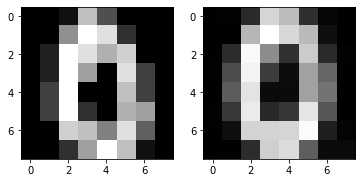

In [249]:
k= 5
reconstruction = model.predict(test[k:k+1,:])

plt.figure()
plt.subplot(1,2,1)
plt.imshow(test[k:k+1,:].reshape((8,8)),cmap="gray")
plt.subplot(1,2,2)
plt.imshow(reconstruction.reshape((8,8)),cmap="gray")

In [250]:
model.save("damodel")
del model
# Recreate the exact same model purely from the file:
model = keras.models.load_model("damodel")

INFO:tensorflow:Assets written to: damodel/assets


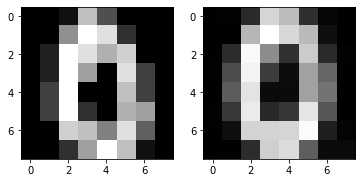

In [251]:
k= 5
reconstruction = model.predict(test[k:k+1,:])

plt.figure()
plt.subplot(1,2,1)
plt.imshow(test[k:k+1,:].reshape((8,8)),cmap="gray")
plt.subplot(1,2,2)
plt.imshow(reconstruction.reshape((8,8)),cmap="gray")

In [252]:
feature_ext = keras.Model(inputs=input_img, outputs=encoder_output)


In [253]:
code = feature_ext(train)

In [254]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(32,random_state=0)
clf.fit(code,train_y)

clf2 = RandomForestClassifier(32,random_state=0)
clf2.fit(train,train_y)

RandomForestClassifier(n_estimators=32, random_state=0)

In [255]:
print(code)

tf.Tensor(
[[ 9.339233   5.928583 ]
 [17.336731  34.91344  ]
 [10.9646225  7.3041973]
 ...
 [20.034397  18.396917 ]
 [39.591675  29.514612 ]
 [ 5.787067  21.493105 ]], shape=(1697, 2), dtype=float32)


In [256]:
code = feature_ext(test)
print(clf.score(code,test_y))
print(clf2.score(test,test_y))

0.81
0.92


With just 2 features??????

In [257]:
code[1,:],test_y[1]

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([51.083862, 47.69071 ], dtype=float32)>,
 2)

# Physical vs Logical bottlenecks: Sparse coding

Let us try a logical bottleneck.

In [258]:
from tensorflow.keras import layers


tf.keras.backend.clear_session()

class SparseRegularizationLayer(layers.Layer):
    def call(self, inputs):
        self.add_loss(tf.reduce_sum(tf.abs(inputs))*0.001)
        return inputs  # Pass-through layer.



input_img = keras.Input(shape=(64,), name="image")
labels = keras.layers.Input(name="label", shape=(None,))

x = keras.layers.Dropout(0.1)(input_img)
x = keras.layers.Dense(128,activation="relu")(x)
x = keras.layers.Dense(256,activation="relu")(x)
x = keras.layers.Dense(512,activation="relu")(x)
encoder_output = SparseRegularizationLayer()(x)
x = keras.layers.Dense(256,activation="relu")(encoder_output)
x = keras.layers.Dense(128,activation="relu")(x)
decoder_output = keras.layers.Dense(64)(x)
model = keras.Model(inputs=input_img, outputs=decoder_output, name="a_model")


In [259]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss='mean_squared_error',
              metrics=['accuracy'])

history = model.fit(train, train, batch_size=64, epochs=2000, validation_split=0.2)


Epoch 1/2000
22/22 [==============================] - 1s 10ms/step - loss: 49.1555 - accuracy: 0.0226 - val_loss: 24.7759 - val_accuracy: 0.0500
Epoch 2/2000
22/22 [==============================] - 0s 4ms/step - loss: 23.2326 - accuracy: 0.1226 - val_loss: 21.3216 - val_accuracy: 0.1824
Epoch 3/2000
22/22 [==============================] - 0s 4ms/step - loss: 20.0873 - accuracy: 0.1380 - val_loss: 18.7833 - val_accuracy: 0.1559
Epoch 4/2000
22/22 [==============================] - 0s 4ms/step - loss: 17.2267 - accuracy: 0.1031 - val_loss: 14.8390 - val_accuracy: 0.0588
Epoch 5/2000
22/22 [==============================] - 0s 4ms/step - loss: 14.9569 - accuracy: 0.0630 - val_loss: 12.7965 - val_accuracy: 0.0912
Epoch 6/2000
22/22 [==============================] - 0s 4ms/step - loss: 13.2178 - accuracy: 0.0518 - val_loss: 12.2882 - val_accuracy: 0.0706
Epoch 7/2000
22/22 [==============================] - 0s 4ms/step - loss: 12.2302 - accuracy: 0.0683 - val_loss: 10.7147 - val_accuracy

22/22 [==============================] - 0s 4ms/step - loss: 3.2990 - accuracy: 0.1328 - val_loss: 3.9026 - val_accuracy: 0.1353
Epoch 116/2000
22/22 [==============================] - 0s 4ms/step - loss: 3.2850 - accuracy: 0.1413 - val_loss: 4.0442 - val_accuracy: 0.0941
Epoch 117/2000
22/22 [==============================] - 0s 4ms/step - loss: 3.2088 - accuracy: 0.1565 - val_loss: 3.9449 - val_accuracy: 0.1412
Epoch 118/2000
22/22 [==============================] - 0s 4ms/step - loss: 3.2720 - accuracy: 0.1429 - val_loss: 3.9396 - val_accuracy: 0.1647
Epoch 119/2000
22/22 [==============================] - 0s 4ms/step - loss: 3.1713 - accuracy: 0.1469 - val_loss: 4.0989 - val_accuracy: 0.1235
Epoch 120/2000
22/22 [==============================] - 0s 4ms/step - loss: 3.1674 - accuracy: 0.1392 - val_loss: 3.8893 - val_accuracy: 0.1029
Epoch 121/2000
22/22 [==============================] - 0s 4ms/step - loss: 3.1744 - accuracy: 0.1410 - val_loss: 4.0547 - val_accuracy: 0.1029
Epoch 1

Epoch 172/2000
22/22 [==============================] - 0s 4ms/step - loss: 2.5708 - accuracy: 0.1542 - val_loss: 3.8464 - val_accuracy: 0.1294
Epoch 173/2000
22/22 [==============================] - 0s 4ms/step - loss: 2.6193 - accuracy: 0.1318 - val_loss: 3.7011 - val_accuracy: 0.1118
Epoch 174/2000
22/22 [==============================] - 0s 4ms/step - loss: 2.5448 - accuracy: 0.1348 - val_loss: 3.6586 - val_accuracy: 0.1324
Epoch 175/2000
22/22 [==============================] - 0s 4ms/step - loss: 2.6009 - accuracy: 0.1432 - val_loss: 3.8279 - val_accuracy: 0.1265
Epoch 176/2000
22/22 [==============================] - 0s 4ms/step - loss: 2.5425 - accuracy: 0.1649 - val_loss: 3.6878 - val_accuracy: 0.1647
Epoch 177/2000
22/22 [==============================] - 0s 4ms/step - loss: 2.5408 - accuracy: 0.1403 - val_loss: 3.8258 - val_accuracy: 0.1382
Epoch 178/2000
22/22 [==============================] - 0s 4ms/step - loss: 2.5494 - accuracy: 0.1360 - val_loss: 3.8063 - val_accuracy:

Epoch 285/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.9524 - accuracy: 0.1470 - val_loss: 3.5349 - val_accuracy: 0.1059
Epoch 286/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.9345 - accuracy: 0.1706 - val_loss: 3.6723 - val_accuracy: 0.1118
Epoch 287/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.9444 - accuracy: 0.1766 - val_loss: 3.5599 - val_accuracy: 0.1118
Epoch 288/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.8757 - accuracy: 0.1643 - val_loss: 3.5038 - val_accuracy: 0.1265
Epoch 289/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.9272 - accuracy: 0.1849 - val_loss: 3.7511 - val_accuracy: 0.1000
Epoch 290/2000
22/22 [==============================] - 0s 4ms/step - loss: 2.0161 - accuracy: 0.1782 - val_loss: 3.6208 - val_accuracy: 0.1382
Epoch 291/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.9436 - accuracy: 0.1742 - val_loss: 3.7505 - val_accuracy:

Epoch 342/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.7294 - accuracy: 0.1586 - val_loss: 3.5849 - val_accuracy: 0.1529
Epoch 343/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.7260 - accuracy: 0.1545 - val_loss: 3.5347 - val_accuracy: 0.1235
Epoch 344/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.7007 - accuracy: 0.1702 - val_loss: 3.5609 - val_accuracy: 0.1059
Epoch 345/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.6967 - accuracy: 0.1556 - val_loss: 3.6553 - val_accuracy: 0.1647
Epoch 346/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.7258 - accuracy: 0.1713 - val_loss: 3.5866 - val_accuracy: 0.1235
Epoch 347/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.7300 - accuracy: 0.1710 - val_loss: 3.6096 - val_accuracy: 0.1294
Epoch 348/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.7028 - accuracy: 0.1538 - val_loss: 3.6810 - val_accuracy:

Epoch 399/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.5361 - accuracy: 0.1741 - val_loss: 3.7703 - val_accuracy: 0.1412
Epoch 400/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.5398 - accuracy: 0.1604 - val_loss: 3.7985 - val_accuracy: 0.1265
Epoch 401/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.5984 - accuracy: 0.1688 - val_loss: 3.8076 - val_accuracy: 0.1676
Epoch 402/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.5512 - accuracy: 0.1638 - val_loss: 3.6876 - val_accuracy: 0.1176
Epoch 403/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.5917 - accuracy: 0.1677 - val_loss: 3.6811 - val_accuracy: 0.0941
Epoch 404/2000
22/22 [==============================] - 0s 5ms/step - loss: 1.5314 - accuracy: 0.1668 - val_loss: 3.6952 - val_accuracy: 0.1176
Epoch 405/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.5671 - accuracy: 0.1737 - val_loss: 3.7585 - val_accuracy:

Epoch 456/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.4737 - accuracy: 0.1915 - val_loss: 3.7472 - val_accuracy: 0.1206
Epoch 457/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.5075 - accuracy: 0.1529 - val_loss: 3.8787 - val_accuracy: 0.1265
Epoch 458/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.5062 - accuracy: 0.1922 - val_loss: 3.6115 - val_accuracy: 0.1088
Epoch 459/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.4393 - accuracy: 0.1957 - val_loss: 3.8912 - val_accuracy: 0.1412
Epoch 460/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.4308 - accuracy: 0.1783 - val_loss: 3.8183 - val_accuracy: 0.1853
Epoch 461/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.4471 - accuracy: 0.1904 - val_loss: 3.7616 - val_accuracy: 0.1471
Epoch 462/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.4879 - accuracy: 0.1629 - val_loss: 3.9844 - val_accuracy:

Epoch 513/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.3596 - accuracy: 0.1821 - val_loss: 3.6130 - val_accuracy: 0.1529
Epoch 514/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.3379 - accuracy: 0.1776 - val_loss: 3.6526 - val_accuracy: 0.1500
Epoch 515/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.3317 - accuracy: 0.2068 - val_loss: 3.7101 - val_accuracy: 0.1029
Epoch 516/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.3303 - accuracy: 0.1784 - val_loss: 3.7219 - val_accuracy: 0.1676
Epoch 517/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.3323 - accuracy: 0.1654 - val_loss: 3.7591 - val_accuracy: 0.1235
Epoch 518/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.3645 - accuracy: 0.1872 - val_loss: 3.7722 - val_accuracy: 0.1088
Epoch 519/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.3661 - accuracy: 0.1830 - val_loss: 3.7717 - val_accuracy:

Epoch 570/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.2480 - accuracy: 0.1793 - val_loss: 3.8842 - val_accuracy: 0.1147
Epoch 571/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.2139 - accuracy: 0.1737 - val_loss: 3.7557 - val_accuracy: 0.1147
Epoch 572/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.3040 - accuracy: 0.1700 - val_loss: 3.9072 - val_accuracy: 0.1059
Epoch 573/2000
22/22 [==============================] - 0s 5ms/step - loss: 1.1991 - accuracy: 0.1972 - val_loss: 3.8570 - val_accuracy: 0.1088
Epoch 574/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.2150 - accuracy: 0.1942 - val_loss: 3.7594 - val_accuracy: 0.1529
Epoch 575/2000
22/22 [==============================] - 0s 5ms/step - loss: 1.2454 - accuracy: 0.1908 - val_loss: 3.8965 - val_accuracy: 0.1118
Epoch 576/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.2481 - accuracy: 0.1915 - val_loss: 3.8422 - val_accuracy:

Epoch 627/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.2284 - accuracy: 0.1835 - val_loss: 4.0136 - val_accuracy: 0.1471
Epoch 628/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.2440 - accuracy: 0.1817 - val_loss: 3.8608 - val_accuracy: 0.1235
Epoch 629/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.1337 - accuracy: 0.1918 - val_loss: 4.0903 - val_accuracy: 0.1500
Epoch 630/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.2142 - accuracy: 0.1948 - val_loss: 3.8661 - val_accuracy: 0.1235
Epoch 631/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.2321 - accuracy: 0.1878 - val_loss: 3.7710 - val_accuracy: 0.1353
Epoch 632/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.1285 - accuracy: 0.1972 - val_loss: 3.8515 - val_accuracy: 0.1147
Epoch 633/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.1772 - accuracy: 0.1823 - val_loss: 3.6818 - val_accuracy:

Epoch 684/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.1803 - accuracy: 0.1908 - val_loss: 3.9405 - val_accuracy: 0.1235
Epoch 685/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.1285 - accuracy: 0.2138 - val_loss: 3.8592 - val_accuracy: 0.1176
Epoch 686/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.0967 - accuracy: 0.2016 - val_loss: 3.9753 - val_accuracy: 0.1059
Epoch 687/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.0924 - accuracy: 0.1965 - val_loss: 3.7770 - val_accuracy: 0.0941
Epoch 688/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.1518 - accuracy: 0.2093 - val_loss: 3.8495 - val_accuracy: 0.1206
Epoch 689/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.1145 - accuracy: 0.2073 - val_loss: 3.8436 - val_accuracy: 0.1059
Epoch 690/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.1230 - accuracy: 0.1726 - val_loss: 3.8285 - val_accuracy:

Epoch 741/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.1028 - accuracy: 0.1882 - val_loss: 3.9095 - val_accuracy: 0.1029
Epoch 742/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.0349 - accuracy: 0.1807 - val_loss: 3.8506 - val_accuracy: 0.1382
Epoch 743/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.0593 - accuracy: 0.2017 - val_loss: 3.9767 - val_accuracy: 0.1206
Epoch 744/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.0821 - accuracy: 0.2171 - val_loss: 3.9884 - val_accuracy: 0.1206
Epoch 745/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.0262 - accuracy: 0.1979 - val_loss: 3.9511 - val_accuracy: 0.0882
Epoch 746/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.0584 - accuracy: 0.1907 - val_loss: 4.0124 - val_accuracy: 0.1118
Epoch 747/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.0118 - accuracy: 0.2086 - val_loss: 3.9458 - val_accuracy:

Epoch 798/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.0660 - accuracy: 0.2077 - val_loss: 3.9569 - val_accuracy: 0.1382
Epoch 799/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.0235 - accuracy: 0.2064 - val_loss: 4.0286 - val_accuracy: 0.1118
Epoch 800/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.9794 - accuracy: 0.1925 - val_loss: 4.0924 - val_accuracy: 0.1206
Epoch 801/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.0201 - accuracy: 0.2007 - val_loss: 4.1591 - val_accuracy: 0.1529
Epoch 802/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.0795 - accuracy: 0.2464 - val_loss: 3.9976 - val_accuracy: 0.0941
Epoch 803/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.0256 - accuracy: 0.2192 - val_loss: 4.0241 - val_accuracy: 0.1118
Epoch 804/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.0228 - accuracy: 0.2011 - val_loss: 3.8504 - val_accuracy:

Epoch 855/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.9140 - accuracy: 0.2200 - val_loss: 4.2206 - val_accuracy: 0.1176
Epoch 856/2000
22/22 [==============================] - 0s 4ms/step - loss: 1.0062 - accuracy: 0.2083 - val_loss: 4.0151 - val_accuracy: 0.1471
Epoch 857/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.9628 - accuracy: 0.2042 - val_loss: 4.0064 - val_accuracy: 0.1382
Epoch 858/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.9926 - accuracy: 0.2129 - val_loss: 4.0322 - val_accuracy: 0.0941
Epoch 859/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.9580 - accuracy: 0.1823 - val_loss: 4.0480 - val_accuracy: 0.1382
Epoch 860/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.9550 - accuracy: 0.1960 - val_loss: 4.3202 - val_accuracy: 0.0971
Epoch 861/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.9971 - accuracy: 0.1768 - val_loss: 3.9680 - val_accuracy:

Epoch 912/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.9113 - accuracy: 0.2119 - val_loss: 3.8976 - val_accuracy: 0.1324
Epoch 913/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.9071 - accuracy: 0.2132 - val_loss: 4.0408 - val_accuracy: 0.1412
Epoch 914/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.9627 - accuracy: 0.1865 - val_loss: 3.9839 - val_accuracy: 0.0971
Epoch 915/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.9106 - accuracy: 0.1968 - val_loss: 4.0104 - val_accuracy: 0.1088
Epoch 916/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.9794 - accuracy: 0.2098 - val_loss: 4.0545 - val_accuracy: 0.0824
Epoch 917/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.9117 - accuracy: 0.1968 - val_loss: 4.0267 - val_accuracy: 0.1088
Epoch 918/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.9276 - accuracy: 0.2154 - val_loss: 3.9615 - val_accuracy:

Epoch 969/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.8720 - accuracy: 0.1893 - val_loss: 4.0368 - val_accuracy: 0.1059
Epoch 970/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.8631 - accuracy: 0.2003 - val_loss: 4.3528 - val_accuracy: 0.1265
Epoch 971/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.9068 - accuracy: 0.2007 - val_loss: 4.0121 - val_accuracy: 0.1029
Epoch 972/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.8535 - accuracy: 0.1930 - val_loss: 4.1200 - val_accuracy: 0.1618
Epoch 973/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.9421 - accuracy: 0.2079 - val_loss: 4.2597 - val_accuracy: 0.1147
Epoch 974/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.8990 - accuracy: 0.1850 - val_loss: 4.2214 - val_accuracy: 0.1294
Epoch 975/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.9214 - accuracy: 0.2452 - val_loss: 4.1107 - val_accuracy:

Epoch 1026/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.9453 - accuracy: 0.2306 - val_loss: 4.0626 - val_accuracy: 0.0941
Epoch 1027/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.9006 - accuracy: 0.1915 - val_loss: 4.1242 - val_accuracy: 0.1088
Epoch 1028/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.8815 - accuracy: 0.2022 - val_loss: 4.1574 - val_accuracy: 0.1029
Epoch 1029/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.8671 - accuracy: 0.2067 - val_loss: 4.0727 - val_accuracy: 0.1235
Epoch 1030/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.8926 - accuracy: 0.2026 - val_loss: 3.9796 - val_accuracy: 0.0941
Epoch 1031/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.8500 - accuracy: 0.1977 - val_loss: 4.2192 - val_accuracy: 0.1059
Epoch 1032/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.8652 - accuracy: 0.1758 - val_loss: 4.0813 - val_ac

22/22 [==============================] - 0s 4ms/step - loss: 0.8319 - accuracy: 0.2100 - val_loss: 4.4591 - val_accuracy: 0.1029
Epoch 1139/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.8817 - accuracy: 0.2225 - val_loss: 4.0815 - val_accuracy: 0.1088
Epoch 1140/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.7830 - accuracy: 0.2124 - val_loss: 4.1913 - val_accuracy: 0.1294
Epoch 1141/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.8354 - accuracy: 0.2060 - val_loss: 4.1278 - val_accuracy: 0.1088
Epoch 1142/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.8541 - accuracy: 0.2103 - val_loss: 4.2593 - val_accuracy: 0.1118
Epoch 1143/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.8275 - accuracy: 0.2322 - val_loss: 4.0588 - val_accuracy: 0.1382
Epoch 1144/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.8209 - accuracy: 0.1967 - val_loss: 4.2375 - val_accuracy: 0.1147
E

22/22 [==============================] - 0s 4ms/step - loss: 0.7934 - accuracy: 0.2037 - val_loss: 4.2336 - val_accuracy: 0.1118
Epoch 1251/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.7676 - accuracy: 0.2051 - val_loss: 4.3320 - val_accuracy: 0.1147
Epoch 1252/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.7527 - accuracy: 0.2210 - val_loss: 4.2438 - val_accuracy: 0.1441
Epoch 1253/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.7583 - accuracy: 0.2163 - val_loss: 4.2979 - val_accuracy: 0.1353
Epoch 1254/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.8199 - accuracy: 0.2128 - val_loss: 4.1924 - val_accuracy: 0.1235
Epoch 1255/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.8131 - accuracy: 0.2161 - val_loss: 4.2063 - val_accuracy: 0.1147
Epoch 1256/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.7858 - accuracy: 0.2348 - val_loss: 4.2798 - val_accuracy: 0.1235
E

22/22 [==============================] - 0s 4ms/step - loss: 0.7727 - accuracy: 0.2149 - val_loss: 4.3000 - val_accuracy: 0.1353
Epoch 1363/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.7591 - accuracy: 0.2173 - val_loss: 4.3411 - val_accuracy: 0.1059
Epoch 1364/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.7691 - accuracy: 0.2013 - val_loss: 4.2317 - val_accuracy: 0.1265
Epoch 1365/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.7457 - accuracy: 0.2257 - val_loss: 4.5239 - val_accuracy: 0.0912
Epoch 1366/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.7347 - accuracy: 0.1916 - val_loss: 4.3560 - val_accuracy: 0.1353
Epoch 1367/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.7644 - accuracy: 0.2397 - val_loss: 4.2108 - val_accuracy: 0.1029
Epoch 1368/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.7622 - accuracy: 0.1938 - val_loss: 4.3225 - val_accuracy: 0.1118
E

22/22 [==============================] - 0s 4ms/step - loss: 0.7424 - accuracy: 0.1935 - val_loss: 4.2347 - val_accuracy: 0.1235
Epoch 1475/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.7549 - accuracy: 0.2223 - val_loss: 4.2991 - val_accuracy: 0.1441
Epoch 1476/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.7534 - accuracy: 0.2234 - val_loss: 4.3657 - val_accuracy: 0.1618
Epoch 1477/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.7026 - accuracy: 0.2217 - val_loss: 4.3561 - val_accuracy: 0.1471
Epoch 1478/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.7151 - accuracy: 0.2259 - val_loss: 4.3445 - val_accuracy: 0.1735
Epoch 1479/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.7943 - accuracy: 0.2045 - val_loss: 4.4068 - val_accuracy: 0.1059
Epoch 1480/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.7812 - accuracy: 0.1795 - val_loss: 4.3955 - val_accuracy: 0.1029
E

22/22 [==============================] - 0s 4ms/step - loss: 0.7123 - accuracy: 0.2256 - val_loss: 4.2604 - val_accuracy: 0.1118
Epoch 1587/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.6886 - accuracy: 0.2322 - val_loss: 4.6437 - val_accuracy: 0.1176
Epoch 1588/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.7206 - accuracy: 0.2185 - val_loss: 4.3822 - val_accuracy: 0.1000
Epoch 1589/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.7141 - accuracy: 0.2207 - val_loss: 4.3851 - val_accuracy: 0.1382
Epoch 1590/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.7170 - accuracy: 0.2154 - val_loss: 4.4351 - val_accuracy: 0.1441
Epoch 1591/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.7666 - accuracy: 0.2254 - val_loss: 4.5863 - val_accuracy: 0.1588
Epoch 1592/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.7579 - accuracy: 0.2104 - val_loss: 4.3518 - val_accuracy: 0.1265
E

22/22 [==============================] - 0s 4ms/step - loss: 0.7254 - accuracy: 0.2133 - val_loss: 4.4322 - val_accuracy: 0.1588
Epoch 1699/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.6909 - accuracy: 0.2219 - val_loss: 4.3595 - val_accuracy: 0.1500
Epoch 1700/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.6342 - accuracy: 0.2267 - val_loss: 4.3566 - val_accuracy: 0.1294
Epoch 1701/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.6972 - accuracy: 0.2308 - val_loss: 4.3851 - val_accuracy: 0.1559
Epoch 1702/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.7085 - accuracy: 0.2247 - val_loss: 4.5094 - val_accuracy: 0.1441
Epoch 1703/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.7235 - accuracy: 0.2220 - val_loss: 4.4391 - val_accuracy: 0.1471
Epoch 1704/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.7309 - accuracy: 0.2220 - val_loss: 4.4890 - val_accuracy: 0.1441
E

22/22 [==============================] - 0s 4ms/step - loss: 0.6996 - accuracy: 0.2229 - val_loss: 4.4595 - val_accuracy: 0.1588
Epoch 1811/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.6707 - accuracy: 0.2158 - val_loss: 4.3605 - val_accuracy: 0.1118
Epoch 1812/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.7105 - accuracy: 0.2306 - val_loss: 4.3155 - val_accuracy: 0.1206
Epoch 1813/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.6884 - accuracy: 0.1986 - val_loss: 4.6257 - val_accuracy: 0.1529
Epoch 1814/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.7327 - accuracy: 0.2081 - val_loss: 4.4378 - val_accuracy: 0.1412
Epoch 1815/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.7285 - accuracy: 0.1998 - val_loss: 4.4803 - val_accuracy: 0.1294
Epoch 1816/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.7705 - accuracy: 0.2516 - val_loss: 4.4680 - val_accuracy: 0.1412
E

22/22 [==============================] - 0s 4ms/step - loss: 0.7165 - accuracy: 0.2444 - val_loss: 4.5360 - val_accuracy: 0.1088
Epoch 1923/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.6683 - accuracy: 0.2113 - val_loss: 4.5632 - val_accuracy: 0.1324
Epoch 1924/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.7381 - accuracy: 0.2179 - val_loss: 4.3750 - val_accuracy: 0.1294
Epoch 1925/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.6740 - accuracy: 0.1986 - val_loss: 4.7019 - val_accuracy: 0.1000
Epoch 1926/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.7017 - accuracy: 0.2227 - val_loss: 4.7399 - val_accuracy: 0.1206
Epoch 1927/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.6736 - accuracy: 0.2316 - val_loss: 4.5366 - val_accuracy: 0.1206
Epoch 1928/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.7007 - accuracy: 0.2177 - val_loss: 4.5992 - val_accuracy: 0.1382
E

In [260]:
test_scores = model.evaluate(test, test, verbose=2)

4/4 - 0s - loss: 5.0616 - accuracy: 0.0900


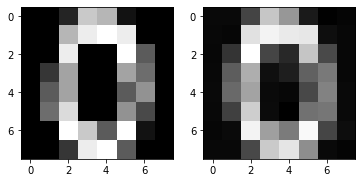

In [261]:
k= 10
reconstruction = model.predict(test[k:k+1,:])

plt.figure()
plt.subplot(1,2,1)
plt.imshow(test[k:k+1,:].reshape((8,8)),cmap="gray")
plt.subplot(1,2,2)
plt.imshow(reconstruction.reshape((8,8)),cmap="gray")

In [262]:
sparse_ext = keras.Model(inputs=input_img, outputs=encoder_output)


In [263]:
code = sparse_ext(train)

In [264]:
code = code.numpy()

In [265]:
non_zero=[]
for i in range(code.shape[0]):
    non_zero.append(len(np.where(code[i]>1e-6)[0]))

(array([4.130e+02, 1.067e+03, 1.800e+02, 2.600e+01, 6.000e+00, 3.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([ 0. ,  4.5,  9. , 13.5, 18. , 22.5, 27. , 31.5, 36. , 40.5, 45. ]),
 <BarContainer object of 10 artists>)

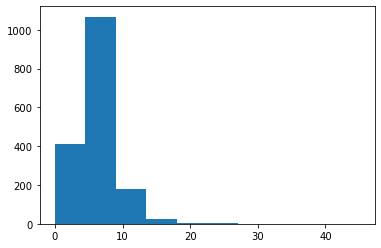

In [266]:
# Histogram of coded values
plt.hist(non_zero)

Let us check also the prediction capabilities from the intermediate representation.

In [267]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(32,random_state=0)
clf.fit(code,train_y)

clf2 = RandomForestClassifier(32,random_state=0)
clf2.fit(train,train_y)

RandomForestClassifier(n_estimators=32, random_state=0)

In [268]:
code = sparse_ext(test)
print(clf.score(code,test_y))
print(clf2.score(test,test_y))

0.88
0.92


# Generating with the decoder. From compressed to restored

Now let us get the decoder. Let us get the saved model first.

In [318]:
tf.keras.backend.clear_session()

input_img = keras.Input(shape=(64,), name="image")
labels = keras.layers.Input(name="label", shape=(None,))

#Instanciate the layers that are going to be reused in two data flows, 
#training of the autoencoder and decoding from intermediate layer

dec1 = keras.layers.Dense(16,activation="relu")
dec2 = keras.layers.Dense(32,activation="relu")
dec3 = keras.layers.Dense(64)

x = keras.layers.Dropout(0.1)(input_img)
x = keras.layers.Dense(32,activation="relu")(x)
x = keras.layers.Dense(16,activation="relu")(x)
encoder_output = keras.layers.Dense(2,activation="relu",name="encoder_output")(x)
x = dec1(encoder_output)
x = dec2(x)
decoder_output = dec3(x)
model = keras.Model(inputs=input_img, outputs=decoder_output, name="a_model")



intermediate_input = keras.Input(shape=dec1.get_input_shape_at(0)) # get shape at node 0
x = dec1(intermediate_input)
x = dec2(x)
decoder_output = dec3(x)
decoder = keras.Model(inputs=intermediate_input, outputs=decoder_output, name="a_decoder")



#keras.utils.plot_model(model, "autoencoder.png", show_shapes=True)

In [319]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss='mean_squared_error',
              metrics=['accuracy'])

history = model.fit(train, train, batch_size=64, epochs=4000, validation_split=0.2)


Epoch 1/4000
22/22 [==============================] - 1s 7ms/step - loss: 58.2669 - accuracy: 0.0172 - val_loss: 41.0620 - val_accuracy: 0.0353
Epoch 2/4000
22/22 [==============================] - 0s 2ms/step - loss: 36.1368 - accuracy: 0.0503 - val_loss: 26.4672 - val_accuracy: 0.0088
Epoch 3/4000
22/22 [==============================] - 0s 2ms/step - loss: 23.5998 - accuracy: 0.0132 - val_loss: 20.2543 - val_accuracy: 0.0088
Epoch 4/4000
22/22 [==============================] - 0s 2ms/step - loss: 19.3595 - accuracy: 0.0139 - val_loss: 18.9511 - val_accuracy: 0.0088
Epoch 5/4000
22/22 [==============================] - 0s 2ms/step - loss: 18.5814 - accuracy: 0.0445 - val_loss: 18.9383 - val_accuracy: 0.0088
Epoch 6/4000
22/22 [==============================] - 0s 2ms/step - loss: 18.5629 - accuracy: 0.0665 - val_loss: 18.9237 - val_accuracy: 0.1353
Epoch 7/4000
22/22 [==============================] - 0s 2ms/step - loss: 18.4990 - accuracy: 0.0992 - val_loss: 18.8503 - val_accuracy:

22/22 [==============================] - 0s 2ms/step - loss: 18.2558 - accuracy: 0.1169 - val_loss: 18.7597 - val_accuracy: 0.0088
Epoch 114/4000
22/22 [==============================] - 0s 2ms/step - loss: 18.3105 - accuracy: 0.0399 - val_loss: 19.0160 - val_accuracy: 0.1353
Epoch 115/4000
22/22 [==============================] - 0s 2ms/step - loss: 18.4310 - accuracy: 0.0988 - val_loss: 18.8004 - val_accuracy: 0.0088
Epoch 116/4000
22/22 [==============================] - 0s 2ms/step - loss: 18.2461 - accuracy: 0.0129 - val_loss: 18.9068 - val_accuracy: 0.1588
Epoch 117/4000
22/22 [==============================] - 0s 2ms/step - loss: 18.1751 - accuracy: 0.0927 - val_loss: 19.0601 - val_accuracy: 0.0088
Epoch 118/4000
22/22 [==============================] - 0s 2ms/step - loss: 18.1797 - accuracy: 0.0209 - val_loss: 19.2169 - val_accuracy: 0.0088
Epoch 119/4000
22/22 [==============================] - 0s 2ms/step - loss: 18.1837 - accuracy: 0.0364 - val_loss: 19.0889 - val_accuracy: 

22/22 [==============================] - 0s 2ms/step - loss: 13.6562 - accuracy: 0.0421 - val_loss: 14.2767 - val_accuracy: 0.0353
Epoch 226/4000
22/22 [==============================] - 0s 2ms/step - loss: 13.6764 - accuracy: 0.0518 - val_loss: 14.0831 - val_accuracy: 0.0441
Epoch 227/4000
22/22 [==============================] - 0s 2ms/step - loss: 13.6390 - accuracy: 0.0498 - val_loss: 14.0946 - val_accuracy: 0.0794
Epoch 228/4000
22/22 [==============================] - 0s 2ms/step - loss: 13.3728 - accuracy: 0.0619 - val_loss: 14.0107 - val_accuracy: 0.0529
Epoch 229/4000
22/22 [==============================] - 0s 2ms/step - loss: 13.4196 - accuracy: 0.0565 - val_loss: 14.0247 - val_accuracy: 0.0441
Epoch 230/4000
22/22 [==============================] - 0s 2ms/step - loss: 13.7661 - accuracy: 0.0489 - val_loss: 14.6062 - val_accuracy: 0.0294
Epoch 231/4000
22/22 [==============================] - 0s 2ms/step - loss: 13.9505 - accuracy: 0.0512 - val_loss: 14.2205 - val_accuracy: 

22/22 [==============================] - 0s 2ms/step - loss: 12.3162 - accuracy: 0.0377 - val_loss: 12.8838 - val_accuracy: 0.0559
Epoch 338/4000
22/22 [==============================] - 0s 2ms/step - loss: 12.2461 - accuracy: 0.0424 - val_loss: 12.5747 - val_accuracy: 0.0706
Epoch 339/4000
22/22 [==============================] - 0s 2ms/step - loss: 12.0044 - accuracy: 0.0430 - val_loss: 12.8949 - val_accuracy: 0.0588
Epoch 340/4000
22/22 [==============================] - 0s 2ms/step - loss: 12.0705 - accuracy: 0.0476 - val_loss: 12.6523 - val_accuracy: 0.0824
Epoch 341/4000
22/22 [==============================] - 0s 2ms/step - loss: 12.1477 - accuracy: 0.0762 - val_loss: 12.8126 - val_accuracy: 0.0441
Epoch 342/4000
22/22 [==============================] - 0s 2ms/step - loss: 12.0951 - accuracy: 0.0476 - val_loss: 12.7549 - val_accuracy: 0.0500
Epoch 343/4000
22/22 [==============================] - 0s 2ms/step - loss: 12.0571 - accuracy: 0.0464 - val_loss: 12.9297 - val_accuracy: 

22/22 [==============================] - 0s 2ms/step - loss: 11.6791 - accuracy: 0.0651 - val_loss: 12.1780 - val_accuracy: 0.0794
Epoch 450/4000
22/22 [==============================] - 0s 2ms/step - loss: 11.7974 - accuracy: 0.0722 - val_loss: 12.2095 - val_accuracy: 0.0971
Epoch 451/4000
22/22 [==============================] - 0s 2ms/step - loss: 11.4519 - accuracy: 0.0747 - val_loss: 12.2555 - val_accuracy: 0.0971
Epoch 452/4000
22/22 [==============================] - 0s 2ms/step - loss: 11.5960 - accuracy: 0.0676 - val_loss: 12.1202 - val_accuracy: 0.0706
Epoch 453/4000
22/22 [==============================] - 0s 2ms/step - loss: 11.5406 - accuracy: 0.0767 - val_loss: 12.1257 - val_accuracy: 0.0441
Epoch 454/4000
22/22 [==============================] - 0s 2ms/step - loss: 11.5794 - accuracy: 0.0801 - val_loss: 11.8998 - val_accuracy: 0.0971
Epoch 455/4000
22/22 [==============================] - 0s 2ms/step - loss: 11.6279 - accuracy: 0.0933 - val_loss: 12.0601 - val_accuracy: 

22/22 [==============================] - 0s 2ms/step - loss: 11.2145 - accuracy: 0.0807 - val_loss: 11.7890 - val_accuracy: 0.1147
Epoch 562/4000
22/22 [==============================] - 0s 2ms/step - loss: 11.2891 - accuracy: 0.0948 - val_loss: 11.6188 - val_accuracy: 0.0912
Epoch 563/4000
22/22 [==============================] - 0s 2ms/step - loss: 10.9987 - accuracy: 0.0799 - val_loss: 11.7050 - val_accuracy: 0.0971
Epoch 564/4000
22/22 [==============================] - 0s 2ms/step - loss: 10.8643 - accuracy: 0.0859 - val_loss: 11.7251 - val_accuracy: 0.1118
Epoch 565/4000
22/22 [==============================] - 0s 2ms/step - loss: 10.9358 - accuracy: 0.1077 - val_loss: 11.7711 - val_accuracy: 0.0559
Epoch 566/4000
22/22 [==============================] - 0s 2ms/step - loss: 11.1225 - accuracy: 0.0897 - val_loss: 11.4741 - val_accuracy: 0.0765
Epoch 567/4000
22/22 [==============================] - 0s 2ms/step - loss: 11.1086 - accuracy: 0.0863 - val_loss: 11.5186 - val_accuracy: 

22/22 [==============================] - 0s 2ms/step - loss: 10.6885 - accuracy: 0.0965 - val_loss: 11.3503 - val_accuracy: 0.1206
Epoch 674/4000
22/22 [==============================] - 0s 2ms/step - loss: 10.5321 - accuracy: 0.0923 - val_loss: 11.3234 - val_accuracy: 0.1088
Epoch 675/4000
22/22 [==============================] - 0s 2ms/step - loss: 10.7404 - accuracy: 0.0835 - val_loss: 11.1610 - val_accuracy: 0.0618
Epoch 676/4000
22/22 [==============================] - 0s 2ms/step - loss: 10.6575 - accuracy: 0.0765 - val_loss: 11.1377 - val_accuracy: 0.0794
Epoch 677/4000
22/22 [==============================] - 0s 2ms/step - loss: 10.6510 - accuracy: 0.0998 - val_loss: 11.1946 - val_accuracy: 0.0765
Epoch 678/4000
22/22 [==============================] - 0s 2ms/step - loss: 10.7210 - accuracy: 0.1058 - val_loss: 11.1228 - val_accuracy: 0.0824
Epoch 679/4000
22/22 [==============================] - 0s 2ms/step - loss: 10.7941 - accuracy: 0.1062 - val_loss: 11.1559 - val_accuracy: 

22/22 [==============================] - 0s 2ms/step - loss: 10.0771 - accuracy: 0.0994 - val_loss: 10.7800 - val_accuracy: 0.0824
Epoch 786/4000
22/22 [==============================] - 0s 2ms/step - loss: 10.2428 - accuracy: 0.0755 - val_loss: 10.5224 - val_accuracy: 0.1265
Epoch 787/4000
22/22 [==============================] - 0s 2ms/step - loss: 10.1555 - accuracy: 0.0972 - val_loss: 10.8017 - val_accuracy: 0.1529
Epoch 788/4000
22/22 [==============================] - 0s 2ms/step - loss: 10.3833 - accuracy: 0.1116 - val_loss: 10.5953 - val_accuracy: 0.0971
Epoch 789/4000
22/22 [==============================] - 0s 2ms/step - loss: 10.1835 - accuracy: 0.0819 - val_loss: 11.1386 - val_accuracy: 0.0971
Epoch 790/4000
22/22 [==============================] - 0s 2ms/step - loss: 10.2313 - accuracy: 0.0860 - val_loss: 10.8862 - val_accuracy: 0.0382
Epoch 791/4000
22/22 [==============================] - 0s 2ms/step - loss: 10.1852 - accuracy: 0.0630 - val_loss: 10.6002 - val_accuracy: 

22/22 [==============================] - 0s 2ms/step - loss: 9.8847 - accuracy: 0.0841 - val_loss: 10.4190 - val_accuracy: 0.0912
Epoch 898/4000
22/22 [==============================] - 0s 2ms/step - loss: 9.9715 - accuracy: 0.0820 - val_loss: 10.2955 - val_accuracy: 0.1176
Epoch 899/4000
22/22 [==============================] - 0s 2ms/step - loss: 9.7513 - accuracy: 0.0900 - val_loss: 10.2176 - val_accuracy: 0.0529
Epoch 900/4000
22/22 [==============================] - 0s 2ms/step - loss: 9.8530 - accuracy: 0.0669 - val_loss: 10.4068 - val_accuracy: 0.1412
Epoch 901/4000
22/22 [==============================] - 0s 2ms/step - loss: 10.0364 - accuracy: 0.0970 - val_loss: 10.2137 - val_accuracy: 0.0588
Epoch 902/4000
22/22 [==============================] - 0s 2ms/step - loss: 10.0309 - accuracy: 0.0676 - val_loss: 10.3198 - val_accuracy: 0.0882
Epoch 903/4000
22/22 [==============================] - 0s 2ms/step - loss: 9.9113 - accuracy: 0.0828 - val_loss: 10.4826 - val_accuracy: 0.058

22/22 [==============================] - 0s 2ms/step - loss: 10.0987 - accuracy: 0.1026 - val_loss: 9.9808 - val_accuracy: 0.1029
Epoch 1010/4000
22/22 [==============================] - 0s 2ms/step - loss: 9.6726 - accuracy: 0.0984 - val_loss: 10.4601 - val_accuracy: 0.0735
Epoch 1011/4000
22/22 [==============================] - 0s 2ms/step - loss: 9.7696 - accuracy: 0.0800 - val_loss: 10.1943 - val_accuracy: 0.0794
Epoch 1012/4000
22/22 [==============================] - 0s 2ms/step - loss: 9.6477 - accuracy: 0.1165 - val_loss: 10.0701 - val_accuracy: 0.1088
Epoch 1013/4000
22/22 [==============================] - 0s 2ms/step - loss: 9.6166 - accuracy: 0.0710 - val_loss: 10.1098 - val_accuracy: 0.0882
Epoch 1014/4000
22/22 [==============================] - 0s 2ms/step - loss: 9.6646 - accuracy: 0.0788 - val_loss: 10.3386 - val_accuracy: 0.0706
Epoch 1015/4000
22/22 [==============================] - 0s 2ms/step - loss: 9.5407 - accuracy: 0.0830 - val_loss: 10.0724 - val_accuracy: 0

22/22 [==============================] - 0s 2ms/step - loss: 9.4616 - accuracy: 0.1063 - val_loss: 10.1160 - val_accuracy: 0.0824
Epoch 1122/4000
22/22 [==============================] - 0s 2ms/step - loss: 9.4845 - accuracy: 0.0843 - val_loss: 9.8414 - val_accuracy: 0.0853
Epoch 1123/4000
22/22 [==============================] - 0s 2ms/step - loss: 9.2389 - accuracy: 0.0992 - val_loss: 10.0135 - val_accuracy: 0.0588
Epoch 1124/4000
22/22 [==============================] - 0s 2ms/step - loss: 9.5170 - accuracy: 0.0865 - val_loss: 9.8342 - val_accuracy: 0.0853
Epoch 1125/4000
22/22 [==============================] - 0s 2ms/step - loss: 9.4691 - accuracy: 0.0855 - val_loss: 10.1100 - val_accuracy: 0.1059
Epoch 1126/4000
22/22 [==============================] - 0s 2ms/step - loss: 9.4395 - accuracy: 0.1111 - val_loss: 9.7985 - val_accuracy: 0.1265
Epoch 1127/4000
22/22 [==============================] - 0s 2ms/step - loss: 9.5617 - accuracy: 0.0933 - val_loss: 9.8418 - val_accuracy: 0.120

22/22 [==============================] - 0s 2ms/step - loss: 9.1860 - accuracy: 0.1063 - val_loss: 9.7597 - val_accuracy: 0.0588
Epoch 1234/4000
22/22 [==============================] - 0s 2ms/step - loss: 9.0531 - accuracy: 0.1005 - val_loss: 9.8997 - val_accuracy: 0.0941
Epoch 1235/4000
22/22 [==============================] - 0s 2ms/step - loss: 9.4090 - accuracy: 0.1239 - val_loss: 9.7661 - val_accuracy: 0.1500
Epoch 1236/4000
22/22 [==============================] - 0s 2ms/step - loss: 9.3891 - accuracy: 0.1270 - val_loss: 9.8603 - val_accuracy: 0.1559
Epoch 1237/4000
22/22 [==============================] - 0s 2ms/step - loss: 9.3547 - accuracy: 0.1132 - val_loss: 9.6072 - val_accuracy: 0.1382
Epoch 1238/4000
22/22 [==============================] - 0s 2ms/step - loss: 9.2187 - accuracy: 0.1305 - val_loss: 9.9150 - val_accuracy: 0.1412
Epoch 1239/4000
22/22 [==============================] - 0s 2ms/step - loss: 9.2103 - accuracy: 0.1376 - val_loss: 9.6327 - val_accuracy: 0.1294
E

22/22 [==============================] - 0s 2ms/step - loss: 9.2409 - accuracy: 0.1143 - val_loss: 9.6265 - val_accuracy: 0.1588
Epoch 1346/4000
22/22 [==============================] - 0s 3ms/step - loss: 9.0823 - accuracy: 0.1175 - val_loss: 9.5100 - val_accuracy: 0.1206
Epoch 1347/4000
22/22 [==============================] - 0s 3ms/step - loss: 8.9805 - accuracy: 0.1135 - val_loss: 9.6191 - val_accuracy: 0.1294
Epoch 1348/4000
22/22 [==============================] - 0s 2ms/step - loss: 9.1488 - accuracy: 0.1095 - val_loss: 9.5715 - val_accuracy: 0.1324
Epoch 1349/4000
22/22 [==============================] - 0s 2ms/step - loss: 9.1765 - accuracy: 0.1449 - val_loss: 10.2604 - val_accuracy: 0.1265
Epoch 1350/4000
22/22 [==============================] - 0s 2ms/step - loss: 9.0685 - accuracy: 0.1325 - val_loss: 9.3891 - val_accuracy: 0.1147
Epoch 1351/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.9906 - accuracy: 0.1201 - val_loss: 9.5305 - val_accuracy: 0.1676


22/22 [==============================] - 0s 2ms/step - loss: 9.0964 - accuracy: 0.1579 - val_loss: 9.6884 - val_accuracy: 0.1471
Epoch 1458/4000
22/22 [==============================] - 0s 2ms/step - loss: 9.0610 - accuracy: 0.1336 - val_loss: 9.7899 - val_accuracy: 0.1147
Epoch 1459/4000
22/22 [==============================] - 0s 3ms/step - loss: 9.0198 - accuracy: 0.1234 - val_loss: 9.7559 - val_accuracy: 0.1118
Epoch 1460/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.9020 - accuracy: 0.1090 - val_loss: 9.5673 - val_accuracy: 0.0794
Epoch 1461/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.7795 - accuracy: 0.1225 - val_loss: 9.8629 - val_accuracy: 0.1588
Epoch 1462/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.9996 - accuracy: 0.1508 - val_loss: 9.7452 - val_accuracy: 0.1382
Epoch 1463/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.8479 - accuracy: 0.1311 - val_loss: 9.7057 - val_accuracy: 0.0559
E

22/22 [==============================] - 0s 2ms/step - loss: 8.6329 - accuracy: 0.1382 - val_loss: 9.5642 - val_accuracy: 0.1147
Epoch 1570/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.8610 - accuracy: 0.1450 - val_loss: 9.4277 - val_accuracy: 0.1235
Epoch 1571/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.8882 - accuracy: 0.1134 - val_loss: 9.6995 - val_accuracy: 0.1382
Epoch 1572/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.8231 - accuracy: 0.1204 - val_loss: 9.8450 - val_accuracy: 0.1235
Epoch 1573/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.8387 - accuracy: 0.1100 - val_loss: 9.4368 - val_accuracy: 0.1118
Epoch 1574/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.7592 - accuracy: 0.1282 - val_loss: 9.3240 - val_accuracy: 0.0941
Epoch 1575/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.9052 - accuracy: 0.1137 - val_loss: 9.2526 - val_accuracy: 0.1059
E

22/22 [==============================] - 0s 2ms/step - loss: 8.7943 - accuracy: 0.1260 - val_loss: 9.3596 - val_accuracy: 0.1441
Epoch 1682/4000
22/22 [==============================] - 0s 3ms/step - loss: 8.9816 - accuracy: 0.1489 - val_loss: 9.4030 - val_accuracy: 0.1118
Epoch 1683/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.8014 - accuracy: 0.1236 - val_loss: 9.3647 - val_accuracy: 0.1500
Epoch 1684/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.7186 - accuracy: 0.1251 - val_loss: 9.6031 - val_accuracy: 0.1059
Epoch 1685/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.6818 - accuracy: 0.1233 - val_loss: 9.2603 - val_accuracy: 0.1294
Epoch 1686/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.7183 - accuracy: 0.1185 - val_loss: 9.2630 - val_accuracy: 0.1118
Epoch 1687/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.9225 - accuracy: 0.1176 - val_loss: 9.4316 - val_accuracy: 0.1206
E

22/22 [==============================] - 0s 2ms/step - loss: 8.7356 - accuracy: 0.1214 - val_loss: 9.1875 - val_accuracy: 0.1147
Epoch 1794/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.7590 - accuracy: 0.1186 - val_loss: 9.4906 - val_accuracy: 0.1618
Epoch 1795/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.7464 - accuracy: 0.1448 - val_loss: 9.3468 - val_accuracy: 0.1471
Epoch 1796/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.8411 - accuracy: 0.1208 - val_loss: 9.3664 - val_accuracy: 0.0971
Epoch 1797/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.8145 - accuracy: 0.1182 - val_loss: 9.5092 - val_accuracy: 0.1559
Epoch 1798/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.7521 - accuracy: 0.1319 - val_loss: 9.3990 - val_accuracy: 0.1029
Epoch 1799/4000
22/22 [==============================] - 0s 2ms/step - loss: 9.0097 - accuracy: 0.1326 - val_loss: 9.2602 - val_accuracy: 0.1471
E

22/22 [==============================] - 0s 2ms/step - loss: 8.5065 - accuracy: 0.1383 - val_loss: 9.4306 - val_accuracy: 0.1412
Epoch 1906/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.7143 - accuracy: 0.1332 - val_loss: 9.3319 - val_accuracy: 0.1441
Epoch 1907/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.7155 - accuracy: 0.1643 - val_loss: 9.1892 - val_accuracy: 0.1294
Epoch 1908/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.6380 - accuracy: 0.1207 - val_loss: 9.2243 - val_accuracy: 0.0971
Epoch 1909/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.7253 - accuracy: 0.1485 - val_loss: 9.2154 - val_accuracy: 0.1029
Epoch 1910/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.6689 - accuracy: 0.1417 - val_loss: 9.1424 - val_accuracy: 0.0971
Epoch 1911/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.6000 - accuracy: 0.1085 - val_loss: 9.0698 - val_accuracy: 0.1235
E

22/22 [==============================] - 0s 2ms/step - loss: 8.9430 - accuracy: 0.1520 - val_loss: 9.1180 - val_accuracy: 0.1088
Epoch 2018/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.7425 - accuracy: 0.1573 - val_loss: 9.1184 - val_accuracy: 0.1176
Epoch 2019/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.4501 - accuracy: 0.1232 - val_loss: 9.1967 - val_accuracy: 0.1353
Epoch 2020/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.6703 - accuracy: 0.1372 - val_loss: 9.1062 - val_accuracy: 0.1294
Epoch 2021/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.6481 - accuracy: 0.1242 - val_loss: 9.0318 - val_accuracy: 0.0824
Epoch 2022/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.5476 - accuracy: 0.1240 - val_loss: 9.0601 - val_accuracy: 0.1176
Epoch 2023/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.7474 - accuracy: 0.1078 - val_loss: 9.1717 - val_accuracy: 0.1441
E

22/22 [==============================] - 0s 2ms/step - loss: 8.7473 - accuracy: 0.1459 - val_loss: 9.2450 - val_accuracy: 0.1059
Epoch 2130/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.5987 - accuracy: 0.1400 - val_loss: 9.1713 - val_accuracy: 0.1324
Epoch 2131/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.5992 - accuracy: 0.1508 - val_loss: 9.9875 - val_accuracy: 0.0941
Epoch 2132/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.7296 - accuracy: 0.1196 - val_loss: 9.2991 - val_accuracy: 0.0912
Epoch 2133/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.4654 - accuracy: 0.1225 - val_loss: 9.1313 - val_accuracy: 0.1059
Epoch 2134/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.6524 - accuracy: 0.1374 - val_loss: 8.9899 - val_accuracy: 0.0882
Epoch 2135/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.3502 - accuracy: 0.1286 - val_loss: 9.4444 - val_accuracy: 0.0882
E

22/22 [==============================] - 0s 2ms/step - loss: 8.3317 - accuracy: 0.1240 - val_loss: 9.0115 - val_accuracy: 0.1206
Epoch 2242/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.2799 - accuracy: 0.1600 - val_loss: 9.1914 - val_accuracy: 0.1000
Epoch 2243/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.4334 - accuracy: 0.1281 - val_loss: 8.9284 - val_accuracy: 0.1588
Epoch 2244/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.3466 - accuracy: 0.1270 - val_loss: 8.8966 - val_accuracy: 0.1118
Epoch 2245/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.3574 - accuracy: 0.1213 - val_loss: 9.0363 - val_accuracy: 0.0941
Epoch 2246/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.5360 - accuracy: 0.1269 - val_loss: 9.0594 - val_accuracy: 0.0941
Epoch 2247/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.5150 - accuracy: 0.1199 - val_loss: 8.9282 - val_accuracy: 0.1265
E

22/22 [==============================] - 0s 2ms/step - loss: 8.3620 - accuracy: 0.1272 - val_loss: 9.0859 - val_accuracy: 0.1147
Epoch 2354/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.5084 - accuracy: 0.1137 - val_loss: 9.0592 - val_accuracy: 0.1206
Epoch 2355/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.6142 - accuracy: 0.1338 - val_loss: 8.9630 - val_accuracy: 0.0941
Epoch 2356/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.6523 - accuracy: 0.1205 - val_loss: 9.0449 - val_accuracy: 0.0765
Epoch 2357/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.5386 - accuracy: 0.0982 - val_loss: 9.2791 - val_accuracy: 0.1088
Epoch 2358/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.5900 - accuracy: 0.1200 - val_loss: 8.9764 - val_accuracy: 0.1088
Epoch 2359/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.5818 - accuracy: 0.1121 - val_loss: 8.9156 - val_accuracy: 0.1118
E

22/22 [==============================] - 0s 2ms/step - loss: 8.4731 - accuracy: 0.1204 - val_loss: 8.9148 - val_accuracy: 0.1324
Epoch 2466/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.2788 - accuracy: 0.1093 - val_loss: 9.0156 - val_accuracy: 0.0941
Epoch 2467/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.5334 - accuracy: 0.1250 - val_loss: 8.8894 - val_accuracy: 0.1029
Epoch 2468/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.2890 - accuracy: 0.1408 - val_loss: 8.8939 - val_accuracy: 0.1029
Epoch 2469/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.4936 - accuracy: 0.1242 - val_loss: 8.9290 - val_accuracy: 0.0882
Epoch 2470/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.6108 - accuracy: 0.1154 - val_loss: 8.7237 - val_accuracy: 0.1412
Epoch 2471/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.3700 - accuracy: 0.1218 - val_loss: 8.8862 - val_accuracy: 0.1353
E

22/22 [==============================] - 0s 2ms/step - loss: 8.2882 - accuracy: 0.1211 - val_loss: 8.7867 - val_accuracy: 0.1088
Epoch 2578/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.4754 - accuracy: 0.1211 - val_loss: 8.8752 - val_accuracy: 0.0941
Epoch 2579/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.2926 - accuracy: 0.1199 - val_loss: 9.0149 - val_accuracy: 0.1059
Epoch 2580/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.2122 - accuracy: 0.1527 - val_loss: 8.9099 - val_accuracy: 0.0941
Epoch 2581/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.4549 - accuracy: 0.1512 - val_loss: 9.0292 - val_accuracy: 0.1206
Epoch 2582/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.5650 - accuracy: 0.1089 - val_loss: 8.7718 - val_accuracy: 0.0882
Epoch 2583/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.4210 - accuracy: 0.1206 - val_loss: 9.2847 - val_accuracy: 0.0882
E

22/22 [==============================] - 0s 2ms/step - loss: 8.5060 - accuracy: 0.1198 - val_loss: 8.9433 - val_accuracy: 0.0559
Epoch 2690/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.4233 - accuracy: 0.1067 - val_loss: 8.7592 - val_accuracy: 0.1029
Epoch 2691/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.3678 - accuracy: 0.1271 - val_loss: 8.6200 - val_accuracy: 0.0882
Epoch 2692/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.2788 - accuracy: 0.1249 - val_loss: 8.7764 - val_accuracy: 0.0971
Epoch 2693/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.4007 - accuracy: 0.1223 - val_loss: 8.9356 - val_accuracy: 0.0971
Epoch 2694/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.2908 - accuracy: 0.1376 - val_loss: 8.5871 - val_accuracy: 0.1000
Epoch 2695/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.2761 - accuracy: 0.1180 - val_loss: 8.7128 - val_accuracy: 0.0912
E

22/22 [==============================] - 0s 2ms/step - loss: 8.1784 - accuracy: 0.1110 - val_loss: 8.6205 - val_accuracy: 0.0765
Epoch 2802/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.5369 - accuracy: 0.1227 - val_loss: 8.7688 - val_accuracy: 0.0853
Epoch 2803/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.2719 - accuracy: 0.1117 - val_loss: 8.8242 - val_accuracy: 0.0618
Epoch 2804/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.4825 - accuracy: 0.1131 - val_loss: 8.9123 - val_accuracy: 0.0735
Epoch 2805/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.2921 - accuracy: 0.1158 - val_loss: 8.6012 - val_accuracy: 0.0971
Epoch 2806/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.3105 - accuracy: 0.1034 - val_loss: 8.5392 - val_accuracy: 0.0647
Epoch 2807/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.1441 - accuracy: 0.1181 - val_loss: 8.6995 - val_accuracy: 0.1324
E

22/22 [==============================] - 0s 2ms/step - loss: 8.1932 - accuracy: 0.1238 - val_loss: 8.6795 - val_accuracy: 0.1029
Epoch 2914/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.1629 - accuracy: 0.1273 - val_loss: 8.6975 - val_accuracy: 0.0706
Epoch 2915/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.3225 - accuracy: 0.1220 - val_loss: 8.5562 - val_accuracy: 0.0912
Epoch 2916/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.4258 - accuracy: 0.1077 - val_loss: 8.8984 - val_accuracy: 0.0824
Epoch 2917/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.1949 - accuracy: 0.1107 - val_loss: 8.7515 - val_accuracy: 0.1147
Epoch 2918/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.3686 - accuracy: 0.1225 - val_loss: 8.8073 - val_accuracy: 0.0824
Epoch 2919/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.3133 - accuracy: 0.1301 - val_loss: 8.6476 - val_accuracy: 0.0971
E

22/22 [==============================] - 0s 2ms/step - loss: 8.3939 - accuracy: 0.1260 - val_loss: 8.6497 - val_accuracy: 0.0824
Epoch 3026/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.3070 - accuracy: 0.1201 - val_loss: 8.7298 - val_accuracy: 0.0441
Epoch 3027/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.1824 - accuracy: 0.1181 - val_loss: 8.6975 - val_accuracy: 0.0735
Epoch 3028/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.3946 - accuracy: 0.1136 - val_loss: 8.9143 - val_accuracy: 0.0588
Epoch 3029/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.1797 - accuracy: 0.1157 - val_loss: 8.7173 - val_accuracy: 0.1235
Epoch 3030/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.3508 - accuracy: 0.1175 - val_loss: 8.6236 - val_accuracy: 0.1000
Epoch 3031/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.2993 - accuracy: 0.1156 - val_loss: 8.8363 - val_accuracy: 0.1029
E

22/22 [==============================] - 0s 2ms/step - loss: 7.9848 - accuracy: 0.1147 - val_loss: 8.5217 - val_accuracy: 0.1000
Epoch 3138/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.1055 - accuracy: 0.1188 - val_loss: 8.6180 - val_accuracy: 0.1000
Epoch 3139/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.3188 - accuracy: 0.1302 - val_loss: 8.7646 - val_accuracy: 0.0676
Epoch 3140/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.0921 - accuracy: 0.1138 - val_loss: 8.9282 - val_accuracy: 0.1059
Epoch 3141/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.0591 - accuracy: 0.1341 - val_loss: 8.5916 - val_accuracy: 0.0529
Epoch 3142/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.1885 - accuracy: 0.1123 - val_loss: 8.6254 - val_accuracy: 0.0941
Epoch 3143/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.3928 - accuracy: 0.1089 - val_loss: 8.5965 - val_accuracy: 0.0853
E

22/22 [==============================] - 0s 2ms/step - loss: 8.2805 - accuracy: 0.1110 - val_loss: 8.7615 - val_accuracy: 0.1147
Epoch 3250/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.0929 - accuracy: 0.1279 - val_loss: 8.7540 - val_accuracy: 0.0912
Epoch 3251/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.1384 - accuracy: 0.1169 - val_loss: 8.4818 - val_accuracy: 0.0971
Epoch 3252/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.1817 - accuracy: 0.1174 - val_loss: 8.3289 - val_accuracy: 0.1265
Epoch 3253/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.2246 - accuracy: 0.1116 - val_loss: 8.7789 - val_accuracy: 0.1324
Epoch 3254/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.0318 - accuracy: 0.1221 - val_loss: 8.8557 - val_accuracy: 0.1088
Epoch 3255/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.1721 - accuracy: 0.1195 - val_loss: 8.6772 - val_accuracy: 0.0706
E

22/22 [==============================] - 0s 2ms/step - loss: 8.0370 - accuracy: 0.1110 - val_loss: 8.7006 - val_accuracy: 0.0853
Epoch 3362/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.2479 - accuracy: 0.1166 - val_loss: 8.9443 - val_accuracy: 0.1265
Epoch 3363/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.0130 - accuracy: 0.1110 - val_loss: 8.7131 - val_accuracy: 0.1265
Epoch 3364/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.0836 - accuracy: 0.1105 - val_loss: 8.5903 - val_accuracy: 0.0676
Epoch 3365/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.1889 - accuracy: 0.1052 - val_loss: 8.5086 - val_accuracy: 0.0912
Epoch 3366/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.1019 - accuracy: 0.1302 - val_loss: 8.5618 - val_accuracy: 0.0912
Epoch 3367/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.0994 - accuracy: 0.1155 - val_loss: 8.6253 - val_accuracy: 0.1147
E

22/22 [==============================] - 0s 2ms/step - loss: 8.0784 - accuracy: 0.0959 - val_loss: 8.3338 - val_accuracy: 0.1147
Epoch 3474/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.1431 - accuracy: 0.1054 - val_loss: 8.5195 - val_accuracy: 0.0941
Epoch 3475/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.1584 - accuracy: 0.1188 - val_loss: 8.6300 - val_accuracy: 0.1088
Epoch 3476/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.0760 - accuracy: 0.1245 - val_loss: 8.8235 - val_accuracy: 0.0676
Epoch 3477/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.1910 - accuracy: 0.1056 - val_loss: 8.3701 - val_accuracy: 0.0941
Epoch 3478/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.0224 - accuracy: 0.0993 - val_loss: 8.6508 - val_accuracy: 0.0706
Epoch 3479/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.1828 - accuracy: 0.1046 - val_loss: 8.6588 - val_accuracy: 0.0735
E

22/22 [==============================] - 0s 2ms/step - loss: 7.9397 - accuracy: 0.1000 - val_loss: 8.6976 - val_accuracy: 0.0588
Epoch 3586/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.0530 - accuracy: 0.0945 - val_loss: 8.6553 - val_accuracy: 0.0559
Epoch 3587/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.1670 - accuracy: 0.1134 - val_loss: 8.6206 - val_accuracy: 0.1000
Epoch 3588/4000
22/22 [==============================] - 0s 2ms/step - loss: 7.9491 - accuracy: 0.1306 - val_loss: 8.6391 - val_accuracy: 0.1441
Epoch 3589/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.1912 - accuracy: 0.1170 - val_loss: 8.7497 - val_accuracy: 0.0706
Epoch 3590/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.0886 - accuracy: 0.0902 - val_loss: 8.5244 - val_accuracy: 0.0882
Epoch 3591/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.0448 - accuracy: 0.1108 - val_loss: 8.5615 - val_accuracy: 0.0794
E

22/22 [==============================] - 0s 2ms/step - loss: 8.0387 - accuracy: 0.0967 - val_loss: 8.5805 - val_accuracy: 0.0824
Epoch 3698/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.2373 - accuracy: 0.0934 - val_loss: 8.5504 - val_accuracy: 0.0941
Epoch 3699/4000
22/22 [==============================] - 0s 2ms/step - loss: 7.9982 - accuracy: 0.1154 - val_loss: 8.5953 - val_accuracy: 0.0853
Epoch 3700/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.0177 - accuracy: 0.1062 - val_loss: 8.7451 - val_accuracy: 0.1118
Epoch 3701/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.0477 - accuracy: 0.1169 - val_loss: 8.4501 - val_accuracy: 0.1059
Epoch 3702/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.2971 - accuracy: 0.1015 - val_loss: 8.7434 - val_accuracy: 0.0853
Epoch 3703/4000
22/22 [==============================] - 0s 2ms/step - loss: 7.8584 - accuracy: 0.0930 - val_loss: 8.5905 - val_accuracy: 0.0765
E

22/22 [==============================] - 0s 2ms/step - loss: 7.9018 - accuracy: 0.0909 - val_loss: 8.7034 - val_accuracy: 0.1176
Epoch 3810/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.2284 - accuracy: 0.1143 - val_loss: 8.7279 - val_accuracy: 0.1059
Epoch 3811/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.1377 - accuracy: 0.1031 - val_loss: 8.7662 - val_accuracy: 0.1000
Epoch 3812/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.0289 - accuracy: 0.0988 - val_loss: 8.5066 - val_accuracy: 0.0882
Epoch 3813/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.1762 - accuracy: 0.1279 - val_loss: 8.8428 - val_accuracy: 0.1000
Epoch 3814/4000
22/22 [==============================] - 0s 2ms/step - loss: 7.9521 - accuracy: 0.1234 - val_loss: 8.4061 - val_accuracy: 0.0471
Epoch 3815/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.0273 - accuracy: 0.0939 - val_loss: 8.7611 - val_accuracy: 0.0676
E

22/22 [==============================] - 0s 2ms/step - loss: 8.0716 - accuracy: 0.0911 - val_loss: 8.5220 - val_accuracy: 0.0882
Epoch 3922/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.1403 - accuracy: 0.0914 - val_loss: 8.7099 - val_accuracy: 0.0882
Epoch 3923/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.3665 - accuracy: 0.0735 - val_loss: 8.5306 - val_accuracy: 0.1000
Epoch 3924/4000
22/22 [==============================] - 0s 2ms/step - loss: 7.9354 - accuracy: 0.1133 - val_loss: 8.4864 - val_accuracy: 0.0853
Epoch 3925/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.1025 - accuracy: 0.1006 - val_loss: 8.4408 - val_accuracy: 0.0941
Epoch 3926/4000
22/22 [==============================] - 0s 2ms/step - loss: 8.0329 - accuracy: 0.0882 - val_loss: 8.4753 - val_accuracy: 0.0794
Epoch 3927/4000
22/22 [==============================] - 0s 2ms/step - loss: 7.9951 - accuracy: 0.1216 - val_loss: 8.6288 - val_accuracy: 0.1235
E

In [320]:
feature_ext = keras.Model(inputs=input_img, outputs=encoder_output)
intermediate_code=feature_ext(train)

In [321]:
code_decoded=decoder(intermediate_code)

In [322]:
intermediate_code[0,:],code_decoded[0,:]

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([11.991867, 21.29079 ], dtype=float32)>,
 <tf.Tensor: shape=(64,), dtype=float32, numpy=
 array([-3.00770663e-02,  2.07610831e-01,  7.22922039e+00,  1.27852926e+01,
         1.39040413e+01,  9.78124142e+00,  2.04024029e+00, -1.67085528e-02,
         3.13992724e-02,  2.07717800e+00,  1.47901917e+01,  1.08631811e+01,
         8.32505417e+00,  9.35346985e+00,  2.24157381e+00,  7.02022165e-02,
         2.41787806e-02,  3.89007759e+00,  1.38499031e+01,  4.55477381e+00,
         3.03758097e+00,  6.74859571e+00,  1.74136949e+00,  7.92139992e-02,
         1.81432664e-02,  3.98049283e+00,  1.31087284e+01,  1.29840307e+01,
         1.23894415e+01,  8.02929688e+00,  1.03436875e+00, -4.54891920e-02,
         3.47649306e-02,  1.42288351e+00,  7.60174274e+00,  1.05030117e+01,
         1.20502806e+01,  1.05638943e+01,  1.64758658e+00, -2.03234106e-02,
         5.91349006e-02,  4.35708493e-01,  4.67265892e+00,  2.40785265e+00,
         4.96413612e+00

Let us query a random value and see what we get...

In [323]:
reconstruction = decoder(tf.constant([[0.,20.]]))

In [324]:
reconstruction=reconstruction.numpy()

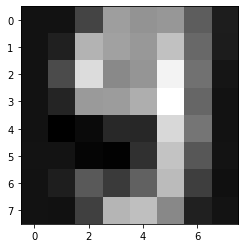

In [325]:
plt.imshow(reconstruction.reshape((8,8)),cmap="gray")

# Surfing the embedding manifold 

In [326]:
feature_ext = keras.Model(inputs=input_img, outputs=encoder_output)
representation=feature_ext(train)

In [327]:
from scipy.spatial import distance 
N=10
vx = np.linspace(np.min(representation[:,0]),np.max(representation[:,0]),N)
vy = np.linspace(np.min(representation[:,1]),np.max(representation[:,1]),N)
print(vx,vy)

def is_visited(x,l):
    for item in l:
        if np.abs(x-item)<1e-10:
            return True
    return False

visited=[]
idx_mat=np.zeros((N,N))       

for i in range(N):
    for j in range(N):
        d = distance.cdist(np.array([vx[i],vy[j]])[np.newaxis,:], representation)
        idx_sort = np.argsort(d)[0]
        idx_not_visited=[tmp for tmp in idx_sort if not(is_visited(tmp,visited))]
        if len(idx_not_visited)>0:
            idx_mat[i,j] = idx_not_visited[0]
            visited.append(idx_not_visited[0])

[ 0.          6.01036792 12.02073585 18.03110377 24.04147169 30.05183962
 36.06220754 42.07257546 48.08294339 54.09331131] [ 0.          7.30360158 14.60720317 21.91080475 29.21440633 36.51800791
 43.8216095  51.12521108 58.42881266 65.73241425]


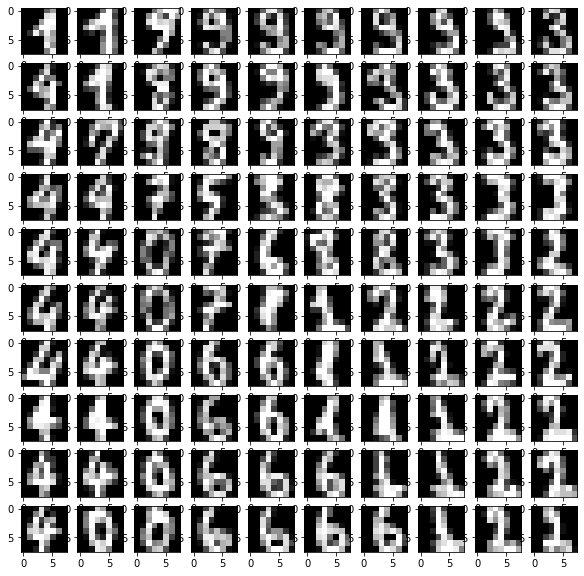

In [328]:
%matplotlib inline
import matplotlib.pyplot as plt
f, axarr = plt.subplots(N, N)

for i in range(N):
    for j in range(N):
        axarr[i,j].imshow(train[int(idx_mat[i,j]),:].reshape((8,8)),cmap='gray', interpolation='nearest')
f.set_size_inches(10,10)

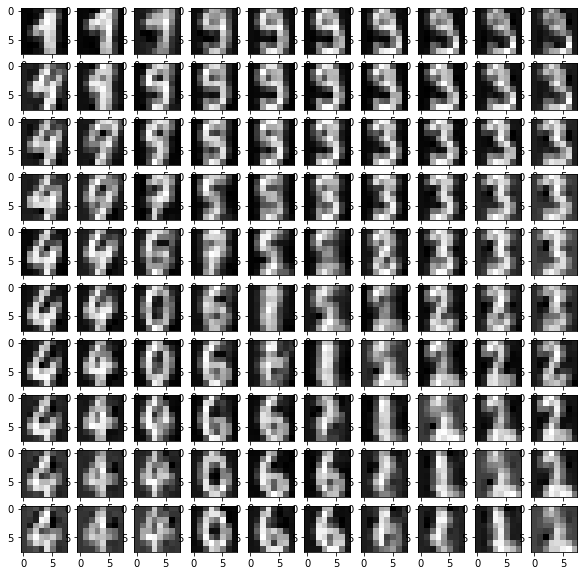

In [329]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(N, N)

for i in range(N):
    for j in range(N):
        reconstruction = decoder(tf.constant(np.array([[vx[i],vy[j]]])))
        axarr[i,j].imshow(reconstruction.numpy().reshape((8,8)),cmap='gray', interpolation='nearest')
f.set_size_inches(10,10)

# Some notes on Variational Autoencoders

Althought autoencoders already serve the trick for generating samples. It turns out that space from which we are generating seems to be composed of bubbles of information with bad interpolation properties among bubbles. In order to solve that issue and smooth the manifold Variational Autoencoders (VAE) are proposed.

<img src = "vae2_proc.png">

This probabilistic behavior requires the use of a different loss, Kullbakc-Leibler divergence.

In practice the latent space is going to be modeled as a Gaussian distribution, and thus two vectors are returned.

<img src = "vae2.png">

But... what is the distribution we are comparing with in the loss? We will use standard normal distribution, resulting in the following loss:


$$L (x,\hat{x}) = \|x-\hat{x}\| + KL(\mathcal{N}(\mu(x),\sigma(x)),\mathcal{N}(0,1))$$


Where this comes from?

We are using Variational Inference for learning. This is we are approximating the desired distribution $p(z|x)$ by a controlled set of base functions $q(z)$. Usually, we use mean field approximation in which we assume that all variables in $z$ are independent and Gaussian. This is $q_x(z) = \prod q_x(z^{(i)}) = \prod \mathcal{N}(\mu^{(i)}(x),\sigma^{(i)}(x))$.

Our goal is

$$\underset{\mu,\sigma}{\text{minimize}}\quad KL(q_x(z),p(z|x))$$

where 

$$KL(q(x)\|p(x)) = \mathbb{E}_{q(x)}[\log\frac{q(x)}{p(x)}] = \int_{-\infty}^{\infty} q(x) \log \frac{q(x)}{p(x)}dx$$,

thus 

$$KL(q_x(z),p(z|x)) = \mathbb{E}_{z\sim q(x)}[\log q(z) - \log p(z|x)] $$

$$= \mathbb{E}_{z\sim q(x)}[\log q(z)] - \mathbb{E}_{z\sim q(x)}[\log p(z|x)]$$

$$= \mathbb{E}_{z\sim q(z)}[\log q(x)] - \mathbb{E}_{z\sim q(x)}[\log p(x|z) + \log p(z) - \log p(x)]$$

$$= - \mathbb{E}_{z\sim q(x)}[\log p(x|z)] +\mathbb{E}_{z\sim q(x)}[\log q(z) -\log p(z) + \log p(x)]$$

Observe that $p(x)$ does not depend on $z$ so this term is irrelevant in terms of the minimization. Thus

$$\underset{\mu,\sigma}{\text{minimize}}\quad - \mathbb{E}_{z\sim q(x)}[\log p(x|z)] +\mathbb{E}_{z\sim q(x)}[\log q(z) -\log p(z)] = $$

$$\underset{\mu,\sigma}{\text{minimize}}\quad - \mathbb{E}_{z\sim q(x)}[\log p(x|z)] +KL(q(z)\|p(z))$$


considering $p(x|z)$ a Gaussian distribution, then 

$$\underset{\mu,\sigma}{\text{minimize}}\quad - \mathbb{E}_{z\sim q(x)}[-\frac{(x-f(z))^2}{2c}] +KL(q(z)\|p(z))$$

that shows the dual loss we brought up before. 

# Generative Adversarial Networks

This is a clever trick for guiding a network into mimicking a sampled data distribution. In a nutshell it consists of a two part process:

- **Part 1: The generator** A network plays the role of a generator. We input data coming from one well-known distribution such as a Normal distribution and the output is expected to be the type of data we desire, e.g. cat images, words, etc. Just as we saw with the decoder of the Auto-encoder.

- **Part 2: The discriminator** In order for the generator to be able to achieve its goal here comes the clever trick. A discriminator is trained with data coming from the true source we want to mimick and with the data coming from the generator. These are mixed. And the role of the discriminator is to tell apart real from fake data. 

In [35]:
%reset -f
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras


In [36]:
# Load data
from sklearn.datasets import load_digits
data = load_digits()

idx = np.random.permutation(data.data.shape[0])
idx_train = idx[:-100]
idx_test = idx[-100:]

train = data.data[idx_train,:]
test = data.data[idx_test,:]

train_y = data.target[idx_train]
test_y = data.target[idx_test]

In [37]:
from tensorflow.keras import layers


tf.keras.backend.clear_session()

noise = keras.Input(shape=(64,), name="random")

x = keras.layers.Dense(128,activation="relu")(noise)
x = keras.layers.Dense(64,activation="relu")(x)
gen_output = keras.layers.Dense(64)(x) # The same as the decoder
generator = keras.Model(inputs=noise, outputs=gen_output, name="generator")


In [38]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, clipvalue=1.0, decay=6e-8)
GEN = tf.keras.Sequential()
GEN.add(generator)
GEN.compile(loss='least_squares', optimizer=optimizer,metrics=['rmse'])


In [39]:

input_img = keras.Input(shape=(64,), name="image")
labels = keras.layers.Input(name="label", shape=(None,))

x = keras.layers.Dropout(0.1)(input_img)
x = keras.layers.Dense(256,activation="relu")(x)
x = keras.layers.Dense(64,activation="relu")(x)
dis_output = keras.layers.Dense(1)(x)

discriminator = keras.Model(inputs=input_img, outputs=dis_output, name="discriminator")


In [40]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, clipvalue=1.0, decay=6e-8)
DM = tf.keras.Sequential()
DM.add(discriminator)
DM.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])


In [41]:
generator.trainable=False
GAN = tf.keras.Sequential()
GAN.add(generator)
GAN.add(discriminator)
GAN.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

tf.Tensor(
[[-0.16406526  0.02976899  0.17601253  0.22742674 -0.8125857  -0.00928169
   0.04848453 -0.23861179  0.480071   -0.00843379 -0.33449775  0.16716021
  -0.16769257  0.3247345   0.29976508  0.8757771  -0.15006256  0.5277105
   0.09632583 -0.12023832  0.42217118  0.3920359  -0.2813924  -0.7268522
   0.07449211 -0.39916956  0.18532154 -0.6596445  -0.11678334  0.10401838
  -0.2727783   0.26268995  0.46868247 -0.48476937  0.4102721   0.3595814
   0.07342933 -0.4926505   0.30740803 -0.00385743  0.34187645 -0.24404463
   0.06639966  0.36667907 -0.01255216 -0.39821196  0.4450169   0.02542361
  -0.08863515  0.02371596  0.3565575   0.37187266  0.11023811  0.4056679
   0.1781495   0.03429331  0.57513833  0.22290207  0.13414513  0.3552314
   0.4647278   0.3462862  -0.664513   -0.01457556]], shape=(1, 64), dtype=float32)


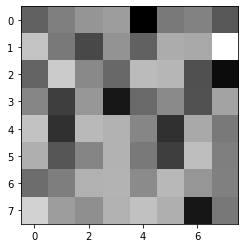

In [42]:
noise = tf.random.normal([1, 64])
generated_image = generator(noise, training=False)

print(generated_image)
plt.imshow(generated_image[0].numpy().reshape((8,8)), cmap='gray')

In [43]:
def generate_latent_points(latent_dim, n_samples):
    # generate points in the latent space
    x_input = np.random.randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

In [44]:
generate_latent_points(64,2)

array([[ 0.05911864,  0.72633471,  0.8008381 ,  1.44513725, -0.2868058 ,
         0.72022458,  0.42252767,  0.66181291, -1.96375911,  0.36931346,
         0.11301747,  0.74171078, -0.1673033 ,  0.221779  ,  0.69842249,
        -0.08322813,  0.54585237, -1.52571466, -1.99626138,  1.90551189,
        -1.41522485, -1.50184549,  0.50119967, -1.19805952,  0.74947486,
        -0.10122091, -0.70852356,  0.25809683, -0.83204763, -0.66275334,
        -2.32436557, -0.8057568 , -1.21913091,  0.23862982,  0.10399056,
        -0.27960911, -0.79417376, -0.33825523,  0.50221154, -1.77619357,
         0.38307554,  0.22685105,  0.91984424,  1.79153486,  0.71114764,
        -1.61872113, -0.19952821, -0.00659182, -0.29621578, -0.64066666,
        -1.85000511,  0.20069247, -0.03555455, -0.5016141 , -3.08782066,
         0.74555356,  1.23845416,  1.33885953,  0.04003648,  2.1392805 ,
         2.00746337, -0.18335427,  0.49042803, -0.52431322],
       [-0.46186991, -1.09710473, -0.03924886,  1.06548751,  0.

In [45]:
def generate_fake_samples(gen, latent_dim, n_samples):
    # generate points in latent space
    x_input = generate_latent_points(latent_dim, n_samples)
    # predict outputs
    X = gen.predict(x_input)
    # create 'fake' class labels (0)
    y = np.zeros((n_samples, 1))
    return X, y


In [46]:
generate_fake_samples(GEN,64,1)

(array([[ 0.34296885, -0.25194985, -0.09376795,  0.32971063, -0.4674565 ,
          0.8985751 ,  0.45920584,  0.06840418,  0.34022754, -0.23748273,
         -0.32024586, -0.05006102, -0.14821644, -0.22001529, -0.01769122,
          1.2457312 , -0.70784783,  0.717124  ,  0.61562216,  0.48175687,
          0.56896186,  0.0077228 , -0.17389737, -0.6774572 ,  0.49984062,
         -0.4877298 ,  0.3526267 , -0.60589564, -0.08634974,  0.46653712,
          0.30768722, -0.60547423,  0.7506209 , -0.39300945,  0.16231933,
         -0.21679051, -0.0977921 , -0.18633768,  0.04240543,  0.06011812,
         -0.34294814,  0.44352672,  0.33430552,  0.7202341 ,  0.485815  ,
         -0.488698  ,  0.32739216,  0.09585117,  0.04488784, -0.34287682,
         -0.13778158,  0.2733799 , -0.16438302,  0.02974792,  0.27516988,
          0.02479693,  0.44027054,  0.781018  , -0.30618498,  0.2564642 ,
          0.2505955 , -0.30304694, -0.33994853,  0.871072  ]],
       dtype=float32), array([[0.]]))

In [47]:
def generate_real_samples(dataset, n_samples):
    # choose random instances
    ix = np.random.randint(0, dataset.shape[0], n_samples)
    # retrieve selected images
    X = dataset[ix]
    # generate 'real' class labels (1)
    y = np.ones((n_samples, 1))
    return X, y

In [48]:
generate_real_samples(train,3)

(array([[ 0.,  2., 13., 16., 16., 16., 15.,  2.,  0.,  8., 16., 12.,  8.,
          4.,  1.,  0.,  0.,  5., 16., 13.,  1.,  0.,  0.,  0.,  0.,  0.,
          8., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 10., 16.,  0.,  0.,
          0.,  0.,  0.,  0.,  9., 16.,  0.,  0.,  0.,  0.,  0.,  3., 13.,
         12.,  0.,  0.,  0.,  0.,  2., 16., 16.,  6.,  0.,  0.,  0.],
        [ 0.,  0.,  8., 13., 14.,  5.,  0.,  0.,  0.,  5., 13.,  4., 11.,
          9.,  0.,  0.,  0.,  4., 13.,  1., 12., 14.,  0.,  0.,  0.,  0.,
          8., 14., 11., 12.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  8.,
          0.,  0.,  0.,  0.,  0.,  0.,  4.,  8.,  0.,  0.,  0.,  2.,  2.,
          0., 11.,  7.,  0.,  0.,  0.,  8., 16., 16., 13.,  2.,  0.],
        [ 0.,  0., 10., 16., 15.,  0.,  0.,  0.,  0.,  4., 14.,  8., 16.,
          1.,  0.,  0.,  0.,  0.,  1.,  4., 16.,  0.,  2.,  0.,  0.,  0.,
          3., 11., 16., 16., 13.,  0.,  0.,  0., 12., 16., 11.,  7.,  2.,
          0.,  0.,  0.,  6., 16.,  0.,  0.,  0

In [49]:
def trainGAN(gen, dm, gan, dataset, latent_dim, n_epochs=100, n_batch=256):
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    print(bat_per_epo)
    print(half_batch)
    # manually enumerate epochs
    for i in range(n_epochs):
        # enumerate batches over the training set
        for j in range(bat_per_epo):
            # get randomly selected 'real' samples
            X_real, y_real = generate_real_samples(dataset, half_batch)
            # generate 'fake' examples
            X_fake, y_fake = generate_fake_samples(gen, latent_dim, half_batch)
            # create training set for the discriminator
            X, y = np.vstack((X_real, X_fake)), np.vstack((y_real, y_fake))
            # update discriminator model weights
            d_loss, _ = dm.train_on_batch(X, y)
            # prepare points in latent space as input for the generator
            X_gan = generate_latent_points(latent_dim, n_batch)
            # create inverted labels for the fake samples
            y_gan = np.ones((n_batch, 1))
            # update the generator via the discriminator's error
            g_loss = gan.train_on_batch(X_gan, y_gan)
            # summarize loss on this batch
            print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss[0]))

In [ ]:
trainGAN(GEN,DM,GAN,train,64,n_epochs=10000)

6
128
>1, 1/6, d=0.296, g=11.193
>1, 2/6, d=0.373, g=1.051
>1, 3/6, d=0.638, g=0.999
>1, 4/6, d=0.432, g=0.837
>1, 5/6, d=0.677, g=0.818
>1, 6/6, d=0.652, g=0.840
>2, 1/6, d=0.484, g=0.808
>2, 2/6, d=0.774, g=0.716
>2, 3/6, d=0.497, g=0.716
>2, 4/6, d=0.618, g=0.739
>2, 5/6, d=0.587, g=0.695
>2, 6/6, d=0.658, g=0.749
>3, 1/6, d=0.566, g=0.716
>3, 2/6, d=0.571, g=0.712
>3, 3/6, d=0.726, g=0.673
>3, 4/6, d=0.575, g=0.695
>3, 5/6, d=0.556, g=0.794
>3, 6/6, d=0.474, g=0.743
>4, 1/6, d=0.493, g=0.710
>4, 2/6, d=0.507, g=0.757
>4, 3/6, d=0.479, g=0.768
>4, 4/6, d=0.519, g=0.713
>4, 5/6, d=0.578, g=0.749
>4, 6/6, d=0.444, g=0.708
>5, 1/6, d=0.592, g=0.730
>5, 2/6, d=0.576, g=0.893
>5, 3/6, d=0.351, g=0.808
>5, 4/6, d=0.406, g=0.733
>5, 5/6, d=0.487, g=0.697
>5, 6/6, d=0.525, g=0.728
>6, 1/6, d=0.508, g=0.669
>6, 2/6, d=0.494, g=0.654
>6, 3/6, d=0.489, g=0.676
>6, 4/6, d=0.475, g=0.637
>6, 5/6, d=0.544, g=0.648
>6, 6/6, d=0.604, g=0.644
>7, 1/6, d=0.617, g=0.652
>7, 2/6, d=0.510, g=0.646
>7, 3

>52, 1/6, d=0.541, g=0.556
>52, 2/6, d=0.567, g=0.547
>52, 3/6, d=0.513, g=0.547
>52, 4/6, d=0.528, g=0.549
>52, 5/6, d=0.541, g=0.564
>52, 6/6, d=0.517, g=0.557
>53, 1/6, d=0.501, g=0.565
>53, 2/6, d=0.511, g=0.558
>53, 3/6, d=0.527, g=0.540
>53, 4/6, d=0.541, g=0.570
>53, 5/6, d=0.504, g=0.548
>53, 6/6, d=0.568, g=0.552
>54, 1/6, d=0.552, g=0.570
>54, 2/6, d=0.510, g=0.553
>54, 3/6, d=0.537, g=0.558
>54, 4/6, d=0.522, g=0.554
>54, 5/6, d=0.506, g=0.567
>54, 6/6, d=0.512, g=0.540
>55, 1/6, d=0.506, g=0.541
>55, 2/6, d=0.530, g=0.559
>55, 3/6, d=0.533, g=0.563
>55, 4/6, d=0.552, g=0.564
>55, 5/6, d=0.499, g=0.550
>55, 6/6, d=0.533, g=0.562
>56, 1/6, d=0.578, g=0.548
>56, 2/6, d=0.524, g=0.545
>56, 3/6, d=0.498, g=0.552
>56, 4/6, d=0.574, g=0.549
>56, 5/6, d=0.575, g=0.539
>56, 6/6, d=0.508, g=0.548
>57, 1/6, d=0.612, g=0.548
>57, 2/6, d=0.570, g=0.561
>57, 3/6, d=0.509, g=0.536
>57, 4/6, d=0.506, g=0.533
>57, 5/6, d=0.504, g=0.531
>57, 6/6, d=0.533, g=0.535
>58, 1/6, d=0.541, g=0.541
>

>102, 6/6, d=0.523, g=0.517
>103, 1/6, d=0.516, g=0.521
>103, 2/6, d=0.516, g=0.535
>103, 3/6, d=0.523, g=0.525
>103, 4/6, d=0.530, g=0.540
>103, 5/6, d=0.508, g=0.501
>103, 6/6, d=0.508, g=0.527
>104, 1/6, d=0.542, g=0.527
>104, 2/6, d=0.518, g=0.530
>104, 3/6, d=0.543, g=0.526
>104, 4/6, d=0.539, g=0.515
>104, 5/6, d=0.519, g=0.498
>104, 6/6, d=0.514, g=0.520
>105, 1/6, d=0.513, g=0.512
>105, 2/6, d=0.549, g=0.507
>105, 3/6, d=0.517, g=0.519
>105, 4/6, d=0.542, g=0.504
>105, 5/6, d=0.529, g=0.517
>105, 6/6, d=0.552, g=0.523
>106, 1/6, d=0.527, g=0.517
>106, 2/6, d=0.549, g=0.527
>106, 3/6, d=0.517, g=0.528
>106, 4/6, d=0.516, g=0.531
>106, 5/6, d=0.524, g=0.527
>106, 6/6, d=0.537, g=0.510
>107, 1/6, d=0.549, g=0.525
>107, 2/6, d=0.495, g=0.542
>107, 3/6, d=0.537, g=0.518
>107, 4/6, d=0.544, g=0.522
>107, 5/6, d=0.545, g=0.533
>107, 6/6, d=0.517, g=0.508
>108, 1/6, d=0.522, g=0.532
>108, 2/6, d=0.530, g=0.517
>108, 3/6, d=0.525, g=0.521
>108, 4/6, d=0.534, g=0.503
>108, 5/6, d=0.530, 

>152, 5/6, d=0.528, g=0.497
>152, 6/6, d=0.552, g=0.512
>153, 1/6, d=0.532, g=0.506
>153, 2/6, d=0.541, g=0.512
>153, 3/6, d=0.536, g=0.507
>153, 4/6, d=0.551, g=0.504
>153, 5/6, d=0.525, g=0.510
>153, 6/6, d=0.544, g=0.512
>154, 1/6, d=0.537, g=0.515
>154, 2/6, d=0.537, g=0.516
>154, 3/6, d=0.576, g=0.501
>154, 4/6, d=0.542, g=0.513
>154, 5/6, d=0.529, g=0.526
>154, 6/6, d=0.516, g=0.505
>155, 1/6, d=0.526, g=0.507
>155, 2/6, d=0.511, g=0.508
>155, 3/6, d=0.530, g=0.498
>155, 4/6, d=0.540, g=0.511
>155, 5/6, d=0.532, g=0.496
>155, 6/6, d=0.558, g=0.517
>156, 1/6, d=0.536, g=0.507
>156, 2/6, d=0.532, g=0.512
>156, 3/6, d=0.523, g=0.499
>156, 4/6, d=0.522, g=0.532
>156, 5/6, d=0.541, g=0.507
>156, 6/6, d=0.531, g=0.499
>157, 1/6, d=0.537, g=0.501
>157, 2/6, d=0.531, g=0.497
>157, 3/6, d=0.528, g=0.512
>157, 4/6, d=0.555, g=0.513
>157, 5/6, d=0.537, g=0.519
>157, 6/6, d=0.511, g=0.497
>158, 1/6, d=0.544, g=0.494
>158, 2/6, d=0.549, g=0.528
>158, 3/6, d=0.518, g=0.519
>158, 4/6, d=0.527, 

>201, 4/6, d=0.524, g=0.485
>201, 5/6, d=0.531, g=0.492
>201, 6/6, d=0.553, g=0.512
>202, 1/6, d=0.548, g=0.503
>202, 2/6, d=0.540, g=0.511
>202, 3/6, d=0.529, g=0.508
>202, 4/6, d=0.543, g=0.506
>202, 5/6, d=0.599, g=0.499
>202, 6/6, d=0.537, g=0.512
>203, 1/6, d=0.535, g=0.507
>203, 2/6, d=0.534, g=0.508
>203, 3/6, d=0.523, g=0.510
>203, 4/6, d=0.528, g=0.507
>203, 5/6, d=0.523, g=0.496
>203, 6/6, d=0.550, g=0.502
>204, 1/6, d=0.521, g=0.508
>204, 2/6, d=0.510, g=0.497
>204, 3/6, d=0.557, g=0.497
>204, 4/6, d=0.547, g=0.506
>204, 5/6, d=0.541, g=0.492
>204, 6/6, d=0.512, g=0.510
>205, 1/6, d=0.526, g=0.505
>205, 2/6, d=0.533, g=0.502
>205, 3/6, d=0.534, g=0.487
>205, 4/6, d=0.522, g=0.483
>205, 5/6, d=0.535, g=0.507
>205, 6/6, d=0.545, g=0.505
>206, 1/6, d=0.532, g=0.502
>206, 2/6, d=0.522, g=0.499
>206, 3/6, d=0.534, g=0.508
>206, 4/6, d=0.532, g=0.503
>206, 5/6, d=0.530, g=0.512
>206, 6/6, d=0.544, g=0.504
>207, 1/6, d=0.524, g=0.493
>207, 2/6, d=0.521, g=0.512
>207, 3/6, d=0.522, 

>250, 6/6, d=0.528, g=0.480
>251, 1/6, d=0.526, g=0.505
>251, 2/6, d=0.550, g=0.505
>251, 3/6, d=0.517, g=0.499
>251, 4/6, d=0.548, g=0.485
>251, 5/6, d=0.543, g=0.497
>251, 6/6, d=0.526, g=0.494
>252, 1/6, d=0.524, g=0.481
>252, 2/6, d=0.533, g=0.496
>252, 3/6, d=0.529, g=0.492
>252, 4/6, d=0.523, g=0.487
>252, 5/6, d=0.530, g=0.492
>252, 6/6, d=0.547, g=0.484
>253, 1/6, d=0.534, g=0.507
>253, 2/6, d=0.529, g=0.491
>253, 3/6, d=0.537, g=0.504
>253, 4/6, d=0.527, g=0.504
>253, 5/6, d=0.562, g=0.497
>253, 6/6, d=0.521, g=0.485
>254, 1/6, d=0.524, g=0.487
>254, 2/6, d=0.531, g=0.483
>254, 3/6, d=0.534, g=0.492
>254, 4/6, d=0.538, g=0.501
>254, 5/6, d=0.529, g=0.483
>254, 6/6, d=0.533, g=0.484
>255, 1/6, d=0.541, g=0.498
>255, 2/6, d=0.534, g=0.508
>255, 3/6, d=0.530, g=0.484
>255, 4/6, d=0.526, g=0.485
>255, 5/6, d=0.541, g=0.488
>255, 6/6, d=0.551, g=0.492
>256, 1/6, d=0.544, g=0.500
>256, 2/6, d=0.546, g=0.496
>256, 3/6, d=0.510, g=0.497
>256, 4/6, d=0.526, g=0.493
>256, 5/6, d=0.508, 

>299, 6/6, d=0.534, g=0.497
>300, 1/6, d=0.547, g=0.480
>300, 2/6, d=0.551, g=0.482
>300, 3/6, d=0.532, g=0.482
>300, 4/6, d=0.532, g=0.481
>300, 5/6, d=0.538, g=0.481
>300, 6/6, d=0.535, g=0.499
>301, 1/6, d=0.547, g=0.483
>301, 2/6, d=0.523, g=0.481
>301, 3/6, d=0.540, g=0.482
>301, 4/6, d=0.551, g=0.487
>301, 5/6, d=0.517, g=0.484
>301, 6/6, d=0.543, g=0.501
>302, 1/6, d=0.546, g=0.482
>302, 2/6, d=0.540, g=0.494
>302, 3/6, d=0.541, g=0.492
>302, 4/6, d=0.529, g=0.496
>302, 5/6, d=0.541, g=0.486
>302, 6/6, d=0.536, g=0.481
>303, 1/6, d=0.526, g=0.503
>303, 2/6, d=0.532, g=0.488
>303, 3/6, d=0.547, g=0.492
>303, 4/6, d=0.527, g=0.494
>303, 5/6, d=0.519, g=0.477
>303, 6/6, d=0.528, g=0.486
>304, 1/6, d=0.534, g=0.504
>304, 2/6, d=0.538, g=0.484
>304, 3/6, d=0.534, g=0.487
>304, 4/6, d=0.532, g=0.475
>304, 5/6, d=0.542, g=0.478
>304, 6/6, d=0.558, g=0.478
>305, 1/6, d=0.530, g=0.491
>305, 2/6, d=0.524, g=0.484
>305, 3/6, d=0.534, g=0.482
>305, 4/6, d=0.535, g=0.496
>305, 5/6, d=0.527, 

>349, 4/6, d=0.535, g=0.482
>349, 5/6, d=0.531, g=0.489
>349, 6/6, d=0.541, g=0.478
>350, 1/6, d=0.542, g=0.490
>350, 2/6, d=0.535, g=0.479
>350, 3/6, d=0.543, g=0.488
>350, 4/6, d=0.539, g=0.484
>350, 5/6, d=0.542, g=0.485
>350, 6/6, d=0.554, g=0.479
>351, 1/6, d=0.528, g=0.485
>351, 2/6, d=0.535, g=0.486
>351, 3/6, d=0.521, g=0.482
>351, 4/6, d=0.527, g=0.477
>351, 5/6, d=0.551, g=0.492
>351, 6/6, d=0.551, g=0.486
>352, 1/6, d=0.539, g=0.499
>352, 2/6, d=0.543, g=0.469
>352, 3/6, d=0.519, g=0.482
>352, 4/6, d=0.534, g=0.483
>352, 5/6, d=0.545, g=0.494
>352, 6/6, d=0.531, g=0.490
>353, 1/6, d=0.529, g=0.482
>353, 2/6, d=0.536, g=0.475
>353, 3/6, d=0.576, g=0.480
>353, 4/6, d=0.514, g=0.464
>353, 5/6, d=0.561, g=0.473
>353, 6/6, d=0.546, g=0.469
>354, 1/6, d=0.545, g=0.497
>354, 2/6, d=0.539, g=0.481
>354, 3/6, d=0.539, g=0.490
>354, 4/6, d=0.524, g=0.473
>354, 5/6, d=0.556, g=0.475
>354, 6/6, d=0.541, g=0.474
>355, 1/6, d=0.528, g=0.477
>355, 2/6, d=0.521, g=0.471
>355, 3/6, d=0.560, 

>398, 5/6, d=0.553, g=0.481
>398, 6/6, d=0.551, g=0.488
>399, 1/6, d=0.569, g=0.469
>399, 2/6, d=0.539, g=0.475
>399, 3/6, d=0.542, g=0.478
>399, 4/6, d=0.583, g=0.473
>399, 5/6, d=0.533, g=0.476
>399, 6/6, d=0.540, g=0.473
>400, 1/6, d=0.528, g=0.478
>400, 2/6, d=0.536, g=0.477
>400, 3/6, d=0.528, g=0.469
>400, 4/6, d=0.533, g=0.481
>400, 5/6, d=0.550, g=0.488
>400, 6/6, d=0.541, g=0.483
>401, 1/6, d=0.533, g=0.481
>401, 2/6, d=0.544, g=0.479
>401, 3/6, d=0.539, g=0.487
>401, 4/6, d=0.539, g=0.476
>401, 5/6, d=0.566, g=0.482
>401, 6/6, d=0.516, g=0.488
>402, 1/6, d=0.532, g=0.476
>402, 2/6, d=0.520, g=0.464
>402, 3/6, d=0.543, g=0.473
>402, 4/6, d=0.542, g=0.475
>402, 5/6, d=0.605, g=0.475
>402, 6/6, d=0.525, g=0.473
>403, 1/6, d=0.541, g=0.478
>403, 2/6, d=0.540, g=0.477
>403, 3/6, d=0.547, g=0.476
>403, 4/6, d=0.531, g=0.473
>403, 5/6, d=0.539, g=0.472
>403, 6/6, d=0.548, g=0.482
>404, 1/6, d=0.539, g=0.469
>404, 2/6, d=0.542, g=0.469
>404, 3/6, d=0.537, g=0.469
>404, 4/6, d=0.543, 

>448, 3/6, d=0.531, g=0.467
>448, 4/6, d=0.547, g=0.482
>448, 5/6, d=0.529, g=0.481
>448, 6/6, d=0.543, g=0.467
>449, 1/6, d=0.531, g=0.472
>449, 2/6, d=0.550, g=0.480
>449, 3/6, d=0.527, g=0.467
>449, 4/6, d=0.538, g=0.488
>449, 5/6, d=0.527, g=0.481
>449, 6/6, d=0.541, g=0.469
>450, 1/6, d=0.539, g=0.483
>450, 2/6, d=0.521, g=0.474
>450, 3/6, d=0.539, g=0.472
>450, 4/6, d=0.548, g=0.477
>450, 5/6, d=0.530, g=0.477
>450, 6/6, d=0.535, g=0.475
>451, 1/6, d=0.533, g=0.484
>451, 2/6, d=0.557, g=0.474
>451, 3/6, d=0.530, g=0.481
>451, 4/6, d=0.549, g=0.468
>451, 5/6, d=0.548, g=0.472
>451, 6/6, d=0.541, g=0.469
>452, 1/6, d=0.539, g=0.478
>452, 2/6, d=0.528, g=0.475
>452, 3/6, d=0.530, g=0.488
>452, 4/6, d=0.541, g=0.484
>452, 5/6, d=0.546, g=0.463
>452, 6/6, d=0.540, g=0.468
>453, 1/6, d=0.536, g=0.476
>453, 2/6, d=0.552, g=0.482
>453, 3/6, d=0.545, g=0.472
>453, 4/6, d=0.538, g=0.477
>453, 5/6, d=0.529, g=0.481
>453, 6/6, d=0.530, g=0.474
>454, 1/6, d=0.530, g=0.472
>454, 2/6, d=0.548, 

>497, 5/6, d=0.537, g=0.463
>497, 6/6, d=0.543, g=0.474
>498, 1/6, d=0.541, g=0.465
>498, 2/6, d=0.536, g=0.460
>498, 3/6, d=0.527, g=0.464
>498, 4/6, d=0.542, g=0.470
>498, 5/6, d=0.533, g=0.464
>498, 6/6, d=0.538, g=0.470
>499, 1/6, d=0.546, g=0.472
>499, 2/6, d=0.542, g=0.459
>499, 3/6, d=0.532, g=0.469
>499, 4/6, d=0.541, g=0.468
>499, 5/6, d=0.540, g=0.472
>499, 6/6, d=0.541, g=0.475
>500, 1/6, d=0.550, g=0.468
>500, 2/6, d=0.533, g=0.464
>500, 3/6, d=0.530, g=0.468
>500, 4/6, d=0.536, g=0.475
>500, 5/6, d=0.547, g=0.464
>500, 6/6, d=0.531, g=0.473
>501, 1/6, d=0.566, g=0.467
>501, 2/6, d=0.546, g=0.478
>501, 3/6, d=0.541, g=0.464
>501, 4/6, d=0.558, g=0.474
>501, 5/6, d=0.539, g=0.490
>501, 6/6, d=0.563, g=0.480
>502, 1/6, d=0.539, g=0.490
>502, 2/6, d=0.521, g=0.472
>502, 3/6, d=0.543, g=0.480
>502, 4/6, d=0.545, g=0.473
>502, 5/6, d=0.533, g=0.465
>502, 6/6, d=0.537, g=0.478
>503, 1/6, d=0.544, g=0.481
>503, 2/6, d=0.536, g=0.475
>503, 3/6, d=0.538, g=0.486
>503, 4/6, d=0.526, 

>546, 4/6, d=0.543, g=0.468
>546, 5/6, d=0.541, g=0.467
>546, 6/6, d=0.547, g=0.465
>547, 1/6, d=0.544, g=0.462
>547, 2/6, d=0.544, g=0.461
>547, 3/6, d=0.540, g=0.473
>547, 4/6, d=0.547, g=0.474
>547, 5/6, d=0.532, g=0.466
>547, 6/6, d=0.544, g=0.462
>548, 1/6, d=0.550, g=0.471
>548, 2/6, d=0.540, g=0.470
>548, 3/6, d=0.533, g=0.476
>548, 4/6, d=0.546, g=0.464
>548, 5/6, d=0.535, g=0.463
>548, 6/6, d=0.546, g=0.466
>549, 1/6, d=0.557, g=0.465
>549, 2/6, d=0.535, g=0.471
>549, 3/6, d=0.541, g=0.481
>549, 4/6, d=0.537, g=0.468
>549, 5/6, d=0.541, g=0.470
>549, 6/6, d=0.531, g=0.469
>550, 1/6, d=0.531, g=0.471
>550, 2/6, d=0.542, g=0.468
>550, 3/6, d=0.602, g=0.470
>550, 4/6, d=0.546, g=0.473
>550, 5/6, d=0.540, g=0.455
>550, 6/6, d=0.538, g=0.464
>551, 1/6, d=0.534, g=0.465
>551, 2/6, d=0.525, g=0.470
>551, 3/6, d=0.549, g=0.473
>551, 4/6, d=0.544, g=0.473
>551, 5/6, d=0.534, g=0.460
>551, 6/6, d=0.548, g=0.465
>552, 1/6, d=0.542, g=0.457
>552, 2/6, d=0.533, g=0.469
>552, 3/6, d=0.548, 

>595, 4/6, d=0.527, g=0.482
>595, 5/6, d=0.524, g=0.476
>595, 6/6, d=0.540, g=0.468
>596, 1/6, d=0.539, g=0.478
>596, 2/6, d=0.541, g=0.466
>596, 3/6, d=0.526, g=0.475
>596, 4/6, d=0.530, g=0.468
>596, 5/6, d=0.540, g=0.475
>596, 6/6, d=0.530, g=0.467
>597, 1/6, d=0.543, g=0.469
>597, 2/6, d=0.538, g=0.469
>597, 3/6, d=0.548, g=0.468
>597, 4/6, d=0.544, g=0.464
>597, 5/6, d=0.525, g=0.460
>597, 6/6, d=0.538, g=0.466
>598, 1/6, d=0.543, g=0.463
>598, 2/6, d=0.553, g=0.456
>598, 3/6, d=0.545, g=0.469
>598, 4/6, d=0.526, g=0.460
>598, 5/6, d=0.540, g=0.471
>598, 6/6, d=0.557, g=0.468
>599, 1/6, d=0.538, g=0.472
>599, 2/6, d=0.538, g=0.467
>599, 3/6, d=0.546, g=0.474
>599, 4/6, d=0.541, g=0.474
>599, 5/6, d=0.531, g=0.460
>599, 6/6, d=0.542, g=0.469
>600, 1/6, d=0.550, g=0.464
>600, 2/6, d=0.538, g=0.467
>600, 3/6, d=0.541, g=0.465
>600, 4/6, d=0.548, g=0.468
>600, 5/6, d=0.540, g=0.472
>600, 6/6, d=0.546, g=0.475
>601, 1/6, d=0.544, g=0.465
>601, 2/6, d=0.528, g=0.465
>601, 3/6, d=0.538, 

>644, 3/6, d=0.551, g=0.465
>644, 4/6, d=0.548, g=0.474
>644, 5/6, d=0.550, g=0.468
>644, 6/6, d=0.552, g=0.467
>645, 1/6, d=0.540, g=0.466
>645, 2/6, d=0.534, g=0.472
>645, 3/6, d=0.528, g=0.461
>645, 4/6, d=0.542, g=0.465
>645, 5/6, d=0.541, g=0.466
>645, 6/6, d=0.536, g=0.471
>646, 1/6, d=0.556, g=0.465
>646, 2/6, d=0.542, g=0.456
>646, 3/6, d=0.529, g=0.468
>646, 4/6, d=0.545, g=0.463
>646, 5/6, d=0.538, g=0.467
>646, 6/6, d=0.594, g=0.457
>647, 1/6, d=0.530, g=0.455
>647, 2/6, d=0.558, g=0.475
>647, 3/6, d=0.535, g=0.469
>647, 4/6, d=0.545, g=0.463
>647, 5/6, d=0.533, g=0.459
>647, 6/6, d=0.534, g=0.459
>648, 1/6, d=0.538, g=0.475
>648, 2/6, d=0.540, g=0.467
>648, 3/6, d=0.552, g=0.467
>648, 4/6, d=0.567, g=0.466
>648, 5/6, d=0.529, g=0.466
>648, 6/6, d=0.526, g=0.463
>649, 1/6, d=0.547, g=0.462
>649, 2/6, d=0.549, g=0.468
>649, 3/6, d=0.520, g=0.472
>649, 4/6, d=0.542, g=0.463
>649, 5/6, d=0.548, g=0.474
>649, 6/6, d=0.544, g=0.466
>650, 1/6, d=0.530, g=0.467
>650, 2/6, d=0.532, 

>694, 2/6, d=0.542, g=0.456
>694, 3/6, d=0.541, g=0.465
>694, 4/6, d=0.538, g=0.462
>694, 5/6, d=0.548, g=0.459
>694, 6/6, d=0.549, g=0.462
>695, 1/6, d=0.547, g=0.451
>695, 2/6, d=0.543, g=0.466
>695, 3/6, d=0.549, g=0.457
>695, 4/6, d=0.546, g=0.464
>695, 5/6, d=0.531, g=0.456
>695, 6/6, d=0.561, g=0.449
>696, 1/6, d=0.534, g=0.457
>696, 2/6, d=0.541, g=0.460
>696, 3/6, d=0.550, g=0.462
>696, 4/6, d=0.538, g=0.458
>696, 5/6, d=0.539, g=0.458
>696, 6/6, d=0.536, g=0.456
>697, 1/6, d=0.552, g=0.456
>697, 2/6, d=0.558, g=0.456
>697, 3/6, d=0.541, g=0.466
>697, 4/6, d=0.549, g=0.464
>697, 5/6, d=0.550, g=0.474
>697, 6/6, d=0.541, g=0.465
>698, 1/6, d=0.542, g=0.463
>698, 2/6, d=0.537, g=0.462
>698, 3/6, d=0.536, g=0.466
>698, 4/6, d=0.535, g=0.461
>698, 5/6, d=0.529, g=0.460
>698, 6/6, d=0.537, g=0.469
>699, 1/6, d=0.536, g=0.470
>699, 2/6, d=0.550, g=0.466
>699, 3/6, d=0.539, g=0.467
>699, 4/6, d=0.535, g=0.458
>699, 5/6, d=0.558, g=0.460
>699, 6/6, d=0.538, g=0.462
>700, 1/6, d=0.543, 

>743, 3/6, d=0.542, g=0.452
>743, 4/6, d=0.536, g=0.465
>743, 5/6, d=0.554, g=0.457
>743, 6/6, d=0.545, g=0.455
>744, 1/6, d=0.533, g=0.456
>744, 2/6, d=0.559, g=0.458
>744, 3/6, d=0.531, g=0.462
>744, 4/6, d=0.535, g=0.449
>744, 5/6, d=0.539, g=0.459
>744, 6/6, d=0.541, g=0.471
>745, 1/6, d=0.531, g=0.460
>745, 2/6, d=0.552, g=0.448
>745, 3/6, d=0.540, g=0.452
>745, 4/6, d=0.542, g=0.466
>745, 5/6, d=0.544, g=0.463
>745, 6/6, d=0.546, g=0.462
>746, 1/6, d=0.545, g=0.460
>746, 2/6, d=0.532, g=0.464
>746, 3/6, d=0.555, g=0.458
>746, 4/6, d=0.538, g=0.458
>746, 5/6, d=0.540, g=0.466
>746, 6/6, d=0.552, g=0.465
>747, 1/6, d=0.541, g=0.459
>747, 2/6, d=0.541, g=0.461
>747, 3/6, d=0.554, g=0.459
>747, 4/6, d=0.535, g=0.463
>747, 5/6, d=0.535, g=0.469
>747, 6/6, d=0.535, g=0.458
>748, 1/6, d=0.552, g=0.463
>748, 2/6, d=0.531, g=0.455
>748, 3/6, d=0.559, g=0.452
>748, 4/6, d=0.531, g=0.456
>748, 5/6, d=0.530, g=0.444
>748, 6/6, d=0.538, g=0.462
>749, 1/6, d=0.553, g=0.457
>749, 2/6, d=0.557, 

>793, 1/6, d=0.550, g=0.459
>793, 2/6, d=0.538, g=0.458
>793, 3/6, d=0.545, g=0.464
>793, 4/6, d=0.528, g=0.457
>793, 5/6, d=0.544, g=0.460
>793, 6/6, d=0.541, g=0.447
>794, 1/6, d=0.537, g=0.465
>794, 2/6, d=0.547, g=0.447
>794, 3/6, d=0.545, g=0.459
>794, 4/6, d=0.550, g=0.460
>794, 5/6, d=0.538, g=0.463
>794, 6/6, d=0.530, g=0.466
>795, 1/6, d=0.525, g=0.457
>795, 2/6, d=0.547, g=0.462
>795, 3/6, d=0.552, g=0.460
>795, 4/6, d=0.550, g=0.451
>795, 5/6, d=0.554, g=0.456
>795, 6/6, d=0.540, g=0.460
>796, 1/6, d=0.543, g=0.470
>796, 2/6, d=0.541, g=0.473
>796, 3/6, d=0.546, g=0.462
>796, 4/6, d=0.528, g=0.458
>796, 5/6, d=0.533, g=0.458
>796, 6/6, d=0.545, g=0.466
>797, 1/6, d=0.543, g=0.470
>797, 2/6, d=0.533, g=0.461
>797, 3/6, d=0.533, g=0.466
>797, 4/6, d=0.550, g=0.462
>797, 5/6, d=0.534, g=0.462
>797, 6/6, d=0.540, g=0.464
>798, 1/6, d=0.552, g=0.465
>798, 2/6, d=0.535, g=0.457
>798, 3/6, d=0.533, g=0.464
>798, 4/6, d=0.541, g=0.462
>798, 5/6, d=0.588, g=0.462
>798, 6/6, d=0.532, 

>842, 1/6, d=0.544, g=0.464
>842, 2/6, d=0.545, g=0.455
>842, 3/6, d=0.543, g=0.457
>842, 4/6, d=0.536, g=0.452
>842, 5/6, d=0.553, g=0.463
>842, 6/6, d=0.541, g=0.454
>843, 1/6, d=0.534, g=0.450
>843, 2/6, d=0.544, g=0.453
>843, 3/6, d=0.543, g=0.459
>843, 4/6, d=0.554, g=0.455
>843, 5/6, d=0.542, g=0.453
>843, 6/6, d=0.538, g=0.461
>844, 1/6, d=0.529, g=0.469
>844, 2/6, d=0.543, g=0.448
>844, 3/6, d=0.540, g=0.456
>844, 4/6, d=0.548, g=0.456
>844, 5/6, d=0.553, g=0.456
>844, 6/6, d=0.539, g=0.460
>845, 1/6, d=0.539, g=0.456
>845, 2/6, d=0.550, g=0.453
>845, 3/6, d=0.537, g=0.456
>845, 4/6, d=0.541, g=0.462
>845, 5/6, d=0.536, g=0.465
>845, 6/6, d=0.544, g=0.458
>846, 1/6, d=0.537, g=0.455
>846, 2/6, d=0.533, g=0.457
>846, 3/6, d=0.549, g=0.461
>846, 4/6, d=0.551, g=0.458
>846, 5/6, d=0.549, g=0.453
>846, 6/6, d=0.543, g=0.457
>847, 1/6, d=0.536, g=0.458
>847, 2/6, d=0.559, g=0.448
>847, 3/6, d=0.554, g=0.459
>847, 4/6, d=0.553, g=0.457
>847, 5/6, d=0.537, g=0.456
>847, 6/6, d=0.541, 

>890, 6/6, d=0.549, g=0.449
>891, 1/6, d=0.550, g=0.451
>891, 2/6, d=0.548, g=0.451
>891, 3/6, d=0.543, g=0.462
>891, 4/6, d=0.550, g=0.457
>891, 5/6, d=0.530, g=0.449
>891, 6/6, d=0.549, g=0.448
>892, 1/6, d=0.554, g=0.454
>892, 2/6, d=0.528, g=0.457
>892, 3/6, d=0.552, g=0.457
>892, 4/6, d=0.536, g=0.458
>892, 5/6, d=0.543, g=0.453
>892, 6/6, d=0.543, g=0.451
>893, 1/6, d=0.538, g=0.451
>893, 2/6, d=0.527, g=0.451
>893, 3/6, d=0.556, g=0.455
>893, 4/6, d=0.546, g=0.456
>893, 5/6, d=0.539, g=0.455
>893, 6/6, d=0.538, g=0.454
>894, 1/6, d=0.526, g=0.451
>894, 2/6, d=0.537, g=0.462
>894, 3/6, d=0.548, g=0.459
>894, 4/6, d=0.547, g=0.448
>894, 5/6, d=0.547, g=0.454
>894, 6/6, d=0.540, g=0.456
>895, 1/6, d=0.536, g=0.456
>895, 2/6, d=0.543, g=0.445
>895, 3/6, d=0.543, g=0.449
>895, 4/6, d=0.539, g=0.452
>895, 5/6, d=0.591, g=0.456
>895, 6/6, d=0.544, g=0.452
>896, 1/6, d=0.552, g=0.448
>896, 2/6, d=0.539, g=0.449
>896, 3/6, d=0.545, g=0.447
>896, 4/6, d=0.558, g=0.454
>896, 5/6, d=0.553, 

>940, 1/6, d=0.537, g=0.458
>940, 2/6, d=0.549, g=0.463
>940, 3/6, d=0.541, g=0.450
>940, 4/6, d=0.554, g=0.464
>940, 5/6, d=0.531, g=0.443
>940, 6/6, d=0.566, g=0.454
>941, 1/6, d=0.537, g=0.463
>941, 2/6, d=0.541, g=0.449
>941, 3/6, d=0.541, g=0.456
>941, 4/6, d=0.533, g=0.457
>941, 5/6, d=0.538, g=0.456
>941, 6/6, d=0.546, g=0.453
>942, 1/6, d=0.545, g=0.450
>942, 2/6, d=0.547, g=0.452
>942, 3/6, d=0.535, g=0.458
>942, 4/6, d=0.539, g=0.453
>942, 5/6, d=0.537, g=0.449
>942, 6/6, d=0.553, g=0.450
>943, 1/6, d=0.546, g=0.457
>943, 2/6, d=0.546, g=0.460
>943, 3/6, d=0.550, g=0.462
>943, 4/6, d=0.535, g=0.449
>943, 5/6, d=0.535, g=0.452
>943, 6/6, d=0.532, g=0.455
>944, 1/6, d=0.554, g=0.456
>944, 2/6, d=0.557, g=0.458
>944, 3/6, d=0.544, g=0.447
>944, 4/6, d=0.537, g=0.454
>944, 5/6, d=0.589, g=0.445
>944, 6/6, d=0.543, g=0.456
>945, 1/6, d=0.553, g=0.456
>945, 2/6, d=0.543, g=0.451
>945, 3/6, d=0.553, g=0.449
>945, 4/6, d=0.558, g=0.453
>945, 5/6, d=0.548, g=0.457
>945, 6/6, d=0.543, 

>988, 6/6, d=0.546, g=0.459
>989, 1/6, d=0.592, g=0.460
>989, 2/6, d=0.534, g=0.458
>989, 3/6, d=0.535, g=0.453
>989, 4/6, d=0.545, g=0.450
>989, 5/6, d=0.558, g=0.463
>989, 6/6, d=0.538, g=0.453
>990, 1/6, d=0.538, g=0.454
>990, 2/6, d=0.540, g=0.449
>990, 3/6, d=0.539, g=0.451
>990, 4/6, d=0.536, g=0.455
>990, 5/6, d=0.544, g=0.459
>990, 6/6, d=0.525, g=0.450
>991, 1/6, d=0.550, g=0.457
>991, 2/6, d=0.538, g=0.448
>991, 3/6, d=0.549, g=0.450
>991, 4/6, d=0.551, g=0.448
>991, 5/6, d=0.541, g=0.452
>991, 6/6, d=0.540, g=0.447
>992, 1/6, d=0.553, g=0.443
>992, 2/6, d=0.540, g=0.449
>992, 3/6, d=0.540, g=0.455
>992, 4/6, d=0.544, g=0.456
>992, 5/6, d=0.540, g=0.455
>992, 6/6, d=0.551, g=0.445
>993, 1/6, d=0.540, g=0.445
>993, 2/6, d=0.555, g=0.454
>993, 3/6, d=0.533, g=0.454
>993, 4/6, d=0.552, g=0.455
>993, 5/6, d=0.540, g=0.447
>993, 6/6, d=0.548, g=0.457
>994, 1/6, d=0.548, g=0.452
>994, 2/6, d=0.547, g=0.450
>994, 3/6, d=0.551, g=0.452
>994, 4/6, d=0.544, g=0.457
>994, 5/6, d=0.546, 

>1037, 1/6, d=0.541, g=0.448
>1037, 2/6, d=0.534, g=0.452
>1037, 3/6, d=0.606, g=0.451
>1037, 4/6, d=0.536, g=0.449
>1037, 5/6, d=0.540, g=0.444
>1037, 6/6, d=0.542, g=0.459
>1038, 1/6, d=0.538, g=0.453
>1038, 2/6, d=0.535, g=0.454
>1038, 3/6, d=0.539, g=0.450
>1038, 4/6, d=0.556, g=0.446
>1038, 5/6, d=0.549, g=0.456
>1038, 6/6, d=0.554, g=0.453
>1039, 1/6, d=0.537, g=0.453
>1039, 2/6, d=0.546, g=0.452
>1039, 3/6, d=0.540, g=0.451
>1039, 4/6, d=0.547, g=0.447
>1039, 5/6, d=0.551, g=0.450
>1039, 6/6, d=0.546, g=0.449
>1040, 1/6, d=0.572, g=0.446
>1040, 2/6, d=0.544, g=0.453
>1040, 3/6, d=0.534, g=0.448
>1040, 4/6, d=0.552, g=0.448
>1040, 5/6, d=0.535, g=0.452
>1040, 6/6, d=0.545, g=0.449
>1041, 1/6, d=0.541, g=0.444
>1041, 2/6, d=0.543, g=0.446
>1041, 3/6, d=0.547, g=0.453
>1041, 4/6, d=0.539, g=0.438
>1041, 5/6, d=0.543, g=0.443
>1041, 6/6, d=0.547, g=0.449
>1042, 1/6, d=0.540, g=0.444
>1042, 2/6, d=0.554, g=0.448
>1042, 3/6, d=0.526, g=0.449
>1042, 4/6, d=0.546, g=0.452
>1042, 5/6, d=

>1085, 2/6, d=0.542, g=0.449
>1085, 3/6, d=0.541, g=0.457
>1085, 4/6, d=0.658, g=0.453
>1085, 5/6, d=0.548, g=0.453
>1085, 6/6, d=0.538, g=0.442
>1086, 1/6, d=0.547, g=0.450
>1086, 2/6, d=0.536, g=0.447
>1086, 3/6, d=0.542, g=0.448
>1086, 4/6, d=0.542, g=0.453
>1086, 5/6, d=0.547, g=0.449
>1086, 6/6, d=0.536, g=0.447
>1087, 1/6, d=0.537, g=0.447
>1087, 2/6, d=0.541, g=0.447
>1087, 3/6, d=0.592, g=0.438
>1087, 4/6, d=0.548, g=0.451
>1087, 5/6, d=0.548, g=0.443
>1087, 6/6, d=0.544, g=0.450
>1088, 1/6, d=0.553, g=0.442
>1088, 2/6, d=0.552, g=0.448
>1088, 3/6, d=0.546, g=0.447
>1088, 4/6, d=0.556, g=0.454
>1088, 5/6, d=0.548, g=0.450
>1088, 6/6, d=0.542, g=0.440
>1089, 1/6, d=0.542, g=0.450
>1089, 2/6, d=0.547, g=0.443
>1089, 3/6, d=0.541, g=0.446
>1089, 4/6, d=0.597, g=0.443
>1089, 5/6, d=0.549, g=0.443
>1089, 6/6, d=0.548, g=0.444
>1090, 1/6, d=0.553, g=0.452
>1090, 2/6, d=0.552, g=0.451
>1090, 3/6, d=0.556, g=0.450
>1090, 4/6, d=0.552, g=0.458
>1090, 5/6, d=0.544, g=0.451
>1090, 6/6, d=

>1133, 2/6, d=0.548, g=0.454
>1133, 3/6, d=0.539, g=0.449
>1133, 4/6, d=0.556, g=0.452
>1133, 5/6, d=0.544, g=0.444
>1133, 6/6, d=0.543, g=0.452
>1134, 1/6, d=0.542, g=0.451
>1134, 2/6, d=0.595, g=0.453
>1134, 3/6, d=0.547, g=0.449
>1134, 4/6, d=0.543, g=0.457
>1134, 5/6, d=0.532, g=0.457
>1134, 6/6, d=0.553, g=0.449
>1135, 1/6, d=0.540, g=0.449
>1135, 2/6, d=0.537, g=0.453
>1135, 3/6, d=0.542, g=0.447
>1135, 4/6, d=0.534, g=0.451
>1135, 5/6, d=0.548, g=0.452
>1135, 6/6, d=0.534, g=0.448
>1136, 1/6, d=0.605, g=0.446
>1136, 2/6, d=0.535, g=0.443
>1136, 3/6, d=0.539, g=0.451
>1136, 4/6, d=0.552, g=0.456
>1136, 5/6, d=0.538, g=0.448
>1136, 6/6, d=0.555, g=0.451
>1137, 1/6, d=0.544, g=0.452
>1137, 2/6, d=0.542, g=0.446
>1137, 3/6, d=0.538, g=0.449
>1137, 4/6, d=0.546, g=0.444
>1137, 5/6, d=0.548, g=0.447
>1137, 6/6, d=0.542, g=0.453
>1138, 1/6, d=0.541, g=0.451
>1138, 2/6, d=0.542, g=0.441
>1138, 3/6, d=0.543, g=0.448
>1138, 4/6, d=0.543, g=0.449
>1138, 5/6, d=0.545, g=0.451
>1138, 6/6, d=

>1181, 1/6, d=0.543, g=0.456
>1181, 2/6, d=0.538, g=0.443
>1181, 3/6, d=0.559, g=0.449
>1181, 4/6, d=0.549, g=0.452
>1181, 5/6, d=0.536, g=0.447
>1181, 6/6, d=0.559, g=0.450
>1182, 1/6, d=0.544, g=0.454
>1182, 2/6, d=0.541, g=0.449
>1182, 3/6, d=0.540, g=0.451
>1182, 4/6, d=0.542, g=0.453
>1182, 5/6, d=0.543, g=0.445
>1182, 6/6, d=0.549, g=0.450
>1183, 1/6, d=0.544, g=0.455
>1183, 2/6, d=0.546, g=0.446
>1183, 3/6, d=0.548, g=0.449
>1183, 4/6, d=0.543, g=0.454
>1183, 5/6, d=0.538, g=0.450
>1183, 6/6, d=0.549, g=0.455
>1184, 1/6, d=0.541, g=0.452
>1184, 2/6, d=0.540, g=0.444
>1184, 3/6, d=0.535, g=0.458
>1184, 4/6, d=0.552, g=0.457
>1184, 5/6, d=0.539, g=0.452
>1184, 6/6, d=0.538, g=0.452
>1185, 1/6, d=0.543, g=0.450
>1185, 2/6, d=0.542, g=0.456
>1185, 3/6, d=0.548, g=0.455
>1185, 4/6, d=0.548, g=0.450
>1185, 5/6, d=0.601, g=0.452
>1185, 6/6, d=0.542, g=0.450
>1186, 1/6, d=0.536, g=0.449
>1186, 2/6, d=0.548, g=0.453
>1186, 3/6, d=0.546, g=0.444
>1186, 4/6, d=0.544, g=0.453
>1186, 5/6, d=

>1228, 4/6, d=0.545, g=0.443
>1228, 5/6, d=0.535, g=0.441
>1228, 6/6, d=0.544, g=0.445
>1229, 1/6, d=0.542, g=0.443
>1229, 2/6, d=0.538, g=0.447
>1229, 3/6, d=0.541, g=0.450
>1229, 4/6, d=0.551, g=0.448
>1229, 5/6, d=0.552, g=0.444
>1229, 6/6, d=0.548, g=0.451
>1230, 1/6, d=0.543, g=0.453
>1230, 2/6, d=0.540, g=0.452
>1230, 3/6, d=0.545, g=0.452
>1230, 4/6, d=0.542, g=0.447
>1230, 5/6, d=0.545, g=0.444
>1230, 6/6, d=0.550, g=0.452
>1231, 1/6, d=0.536, g=0.448
>1231, 2/6, d=0.545, g=0.443
>1231, 3/6, d=0.546, g=0.447
>1231, 4/6, d=0.538, g=0.445
>1231, 5/6, d=0.600, g=0.444
>1231, 6/6, d=0.541, g=0.447
>1232, 1/6, d=0.537, g=0.447
>1232, 2/6, d=0.551, g=0.450
>1232, 3/6, d=0.546, g=0.447
>1232, 4/6, d=0.546, g=0.450
>1232, 5/6, d=0.549, g=0.446
>1232, 6/6, d=0.546, g=0.442
>1233, 1/6, d=0.540, g=0.447
>1233, 2/6, d=0.549, g=0.445
>1233, 3/6, d=0.547, g=0.448
>1233, 4/6, d=0.548, g=0.446
>1233, 5/6, d=0.544, g=0.447
>1233, 6/6, d=0.544, g=0.445
>1234, 1/6, d=0.533, g=0.444
>1234, 2/6, d=

>1276, 3/6, d=0.541, g=0.453
>1276, 4/6, d=0.543, g=0.451
>1276, 5/6, d=0.537, g=0.447
>1276, 6/6, d=0.551, g=0.444
>1277, 1/6, d=0.545, g=0.447
>1277, 2/6, d=0.539, g=0.444
>1277, 3/6, d=0.544, g=0.443
>1277, 4/6, d=0.551, g=0.448
>1277, 5/6, d=0.539, g=0.454
>1277, 6/6, d=0.545, g=0.450
>1278, 1/6, d=0.532, g=0.453
>1278, 2/6, d=0.541, g=0.445
>1278, 3/6, d=0.537, g=0.449
>1278, 4/6, d=0.546, g=0.446
>1278, 5/6, d=0.553, g=0.445
>1278, 6/6, d=0.543, g=0.450
>1279, 1/6, d=0.538, g=0.446
>1279, 2/6, d=0.551, g=0.448
>1279, 3/6, d=0.545, g=0.451
>1279, 4/6, d=0.534, g=0.444
>1279, 5/6, d=0.554, g=0.444
>1279, 6/6, d=0.546, g=0.447
>1280, 1/6, d=0.541, g=0.445
>1280, 2/6, d=0.543, g=0.448
>1280, 3/6, d=0.600, g=0.440
>1280, 4/6, d=0.556, g=0.453
>1280, 5/6, d=0.547, g=0.449
>1280, 6/6, d=0.541, g=0.452
>1281, 1/6, d=0.544, g=0.451
>1281, 2/6, d=0.545, g=0.445
>1281, 3/6, d=0.546, g=0.450
>1281, 4/6, d=0.544, g=0.449
>1281, 5/6, d=0.544, g=0.452
>1281, 6/6, d=0.543, g=0.445
>1282, 1/6, d=

>1323, 5/6, d=0.551, g=0.443
>1323, 6/6, d=0.546, g=0.446
>1324, 1/6, d=0.538, g=0.442
>1324, 2/6, d=0.551, g=0.444
>1324, 3/6, d=0.547, g=0.443
>1324, 4/6, d=0.543, g=0.446
>1324, 5/6, d=0.550, g=0.445
>1324, 6/6, d=0.550, g=0.443
>1325, 1/6, d=0.539, g=0.440
>1325, 2/6, d=0.546, g=0.447
>1325, 3/6, d=0.551, g=0.443
>1325, 4/6, d=0.538, g=0.450
>1325, 5/6, d=0.546, g=0.443
>1325, 6/6, d=0.543, g=0.440
>1326, 1/6, d=0.549, g=0.441
>1326, 2/6, d=0.611, g=0.446
>1326, 3/6, d=0.541, g=0.441
>1326, 4/6, d=0.545, g=0.454
>1326, 5/6, d=0.542, g=0.446
>1326, 6/6, d=0.545, g=0.438
>1327, 1/6, d=0.532, g=0.437
>1327, 2/6, d=0.556, g=0.446
>1327, 3/6, d=0.546, g=0.442
>1327, 4/6, d=0.553, g=0.451
>1327, 5/6, d=0.542, g=0.445
>1327, 6/6, d=0.545, g=0.448
>1328, 1/6, d=0.540, g=0.444
>1328, 2/6, d=0.538, g=0.441
>1328, 3/6, d=0.546, g=0.452
>1328, 4/6, d=0.597, g=0.441
>1328, 5/6, d=0.555, g=0.445
>1328, 6/6, d=0.543, g=0.447
>1329, 1/6, d=0.537, g=0.443
>1329, 2/6, d=0.604, g=0.449
>1329, 3/6, d=

>1371, 4/6, d=0.551, g=0.442
>1371, 5/6, d=0.540, g=0.448
>1371, 6/6, d=0.546, g=0.449
>1372, 1/6, d=0.546, g=0.447
>1372, 2/6, d=0.544, g=0.449
>1372, 3/6, d=0.548, g=0.451
>1372, 4/6, d=0.540, g=0.443
>1372, 5/6, d=0.547, g=0.450
>1372, 6/6, d=0.544, g=0.452
>1373, 1/6, d=0.549, g=0.444
>1373, 2/6, d=0.534, g=0.442
>1373, 3/6, d=0.541, g=0.450
>1373, 4/6, d=0.605, g=0.442
>1373, 5/6, d=0.545, g=0.447
>1373, 6/6, d=0.595, g=0.452
>1374, 1/6, d=0.544, g=0.440
>1374, 2/6, d=0.543, g=0.454
>1374, 3/6, d=0.536, g=0.450
>1374, 4/6, d=0.546, g=0.439
>1374, 5/6, d=0.541, g=0.439
>1374, 6/6, d=0.545, g=0.447
>1375, 1/6, d=0.538, g=0.445
>1375, 2/6, d=0.542, g=0.443
>1375, 3/6, d=0.601, g=0.446
>1375, 4/6, d=0.533, g=0.450
>1375, 5/6, d=0.549, g=0.442
>1375, 6/6, d=0.540, g=0.443
>1376, 1/6, d=0.548, g=0.449
>1376, 2/6, d=0.608, g=0.446
>1376, 3/6, d=0.548, g=0.442
>1376, 4/6, d=0.545, g=0.451
>1376, 5/6, d=0.549, g=0.454
>1376, 6/6, d=0.547, g=0.446
>1377, 1/6, d=0.551, g=0.446
>1377, 2/6, d=

>1419, 2/6, d=0.541, g=0.446
>1419, 3/6, d=0.546, g=0.446
>1419, 4/6, d=0.597, g=0.450
>1419, 5/6, d=0.549, g=0.449
>1419, 6/6, d=0.549, g=0.445
>1420, 1/6, d=0.539, g=0.449
>1420, 2/6, d=0.543, g=0.447
>1420, 3/6, d=0.536, g=0.452
>1420, 4/6, d=0.541, g=0.446
>1420, 5/6, d=0.542, g=0.443
>1420, 6/6, d=0.543, g=0.455
>1421, 1/6, d=0.537, g=0.442
>1421, 2/6, d=0.549, g=0.441
>1421, 3/6, d=0.546, g=0.443
>1421, 4/6, d=0.548, g=0.448
>1421, 5/6, d=0.547, g=0.455
>1421, 6/6, d=0.598, g=0.448
>1422, 1/6, d=0.542, g=0.449
>1422, 2/6, d=0.546, g=0.443
>1422, 3/6, d=0.539, g=0.447
>1422, 4/6, d=0.549, g=0.443
>1422, 5/6, d=0.543, g=0.439
>1422, 6/6, d=0.593, g=0.442
>1423, 1/6, d=0.537, g=0.446
>1423, 2/6, d=0.543, g=0.448
>1423, 3/6, d=0.541, g=0.440
>1423, 4/6, d=0.540, g=0.440
>1423, 5/6, d=0.536, g=0.438
>1423, 6/6, d=0.545, g=0.441
>1424, 1/6, d=0.548, g=0.448
>1424, 2/6, d=0.547, g=0.432
>1424, 3/6, d=0.558, g=0.445
>1424, 4/6, d=0.549, g=0.444
>1424, 5/6, d=0.545, g=0.442
>1424, 6/6, d=

>1467, 4/6, d=0.548, g=0.446
>1467, 5/6, d=0.553, g=0.448
>1467, 6/6, d=0.538, g=0.447
>1468, 1/6, d=0.548, g=0.440
>1468, 2/6, d=0.540, g=0.448
>1468, 3/6, d=0.544, g=0.445
>1468, 4/6, d=0.545, g=0.446
>1468, 5/6, d=0.551, g=0.442
>1468, 6/6, d=0.536, g=0.443
>1469, 1/6, d=0.550, g=0.453
>1469, 2/6, d=0.540, g=0.445
>1469, 3/6, d=0.540, g=0.445
>1469, 4/6, d=0.540, g=0.439
>1469, 5/6, d=0.543, g=0.444
>1469, 6/6, d=0.553, g=0.444
>1470, 1/6, d=0.538, g=0.444
>1470, 2/6, d=0.604, g=0.445
>1470, 3/6, d=0.545, g=0.447
>1470, 4/6, d=0.551, g=0.437
>1470, 5/6, d=0.544, g=0.446
>1470, 6/6, d=0.539, g=0.441
>1471, 1/6, d=0.546, g=0.444
>1471, 2/6, d=0.549, g=0.451
>1471, 3/6, d=0.541, g=0.448
>1471, 4/6, d=0.538, g=0.449
>1471, 5/6, d=0.551, g=0.442
>1471, 6/6, d=0.545, g=0.448
>1472, 1/6, d=0.548, g=0.446
>1472, 2/6, d=0.547, g=0.452
>1472, 3/6, d=0.542, g=0.444
>1472, 4/6, d=0.541, g=0.443
>1472, 5/6, d=0.537, g=0.439
>1472, 6/6, d=0.538, g=0.447
>1473, 1/6, d=0.545, g=0.442
>1473, 2/6, d=

>1515, 3/6, d=0.550, g=0.445
>1515, 4/6, d=0.599, g=0.444
>1515, 5/6, d=0.566, g=0.444
>1515, 6/6, d=0.546, g=0.445
>1516, 1/6, d=0.543, g=0.440
>1516, 2/6, d=0.543, g=0.439
>1516, 3/6, d=0.549, g=0.442
>1516, 4/6, d=0.541, g=0.447
>1516, 5/6, d=0.544, g=0.438
>1516, 6/6, d=0.546, g=0.454
>1517, 1/6, d=0.549, g=0.446
>1517, 2/6, d=0.547, g=0.438
>1517, 3/6, d=0.546, g=0.440
>1517, 4/6, d=0.540, g=0.450
>1517, 5/6, d=0.601, g=0.441
>1517, 6/6, d=0.548, g=0.438
>1518, 1/6, d=0.545, g=0.445
>1518, 2/6, d=0.545, g=0.445
>1518, 3/6, d=0.545, g=0.443
>1518, 4/6, d=0.543, g=0.441
>1518, 5/6, d=0.544, g=0.442
>1518, 6/6, d=0.539, g=0.445
>1519, 1/6, d=0.543, g=0.447
>1519, 2/6, d=0.605, g=0.441
>1519, 3/6, d=0.552, g=0.443
>1519, 4/6, d=0.551, g=0.445
>1519, 5/6, d=0.541, g=0.442
>1519, 6/6, d=0.543, g=0.447
>1520, 1/6, d=0.596, g=0.446
>1520, 2/6, d=0.540, g=0.441
>1520, 3/6, d=0.553, g=0.445
>1520, 4/6, d=0.549, g=0.439
>1520, 5/6, d=0.543, g=0.448
>1520, 6/6, d=0.542, g=0.448
>1521, 1/6, d=

>1562, 4/6, d=0.537, g=0.441
>1562, 5/6, d=0.537, g=0.444
>1562, 6/6, d=0.542, g=0.437
>1563, 1/6, d=0.537, g=0.438
>1563, 2/6, d=0.545, g=0.440
>1563, 3/6, d=0.551, g=0.450
>1563, 4/6, d=0.555, g=0.438
>1563, 5/6, d=0.599, g=0.441
>1563, 6/6, d=0.546, g=0.440
>1564, 1/6, d=0.552, g=0.441
>1564, 2/6, d=0.541, g=0.444
>1564, 3/6, d=0.541, g=0.445
>1564, 4/6, d=0.597, g=0.440
>1564, 5/6, d=0.546, g=0.447
>1564, 6/6, d=0.543, g=0.443
>1565, 1/6, d=0.550, g=0.443
>1565, 2/6, d=0.538, g=0.445
>1565, 3/6, d=0.550, g=0.449
>1565, 4/6, d=0.541, g=0.447
>1565, 5/6, d=0.546, g=0.442
>1565, 6/6, d=0.544, g=0.443
>1566, 1/6, d=0.547, g=0.439
>1566, 2/6, d=0.536, g=0.436
>1566, 3/6, d=0.535, g=0.442
>1566, 4/6, d=0.549, g=0.437
>1566, 5/6, d=0.547, g=0.442
>1566, 6/6, d=0.541, g=0.445
>1567, 1/6, d=0.547, g=0.444
>1567, 2/6, d=0.543, g=0.442
>1567, 3/6, d=0.549, g=0.442
>1567, 4/6, d=0.541, g=0.444
>1567, 5/6, d=0.598, g=0.438
>1567, 6/6, d=0.549, g=0.443
>1568, 1/6, d=0.536, g=0.442
>1568, 2/6, d=

>1610, 1/6, d=0.551, g=0.446
>1610, 2/6, d=0.599, g=0.436
>1610, 3/6, d=0.544, g=0.446
>1610, 4/6, d=0.548, g=0.442
>1610, 5/6, d=0.559, g=0.438
>1610, 6/6, d=0.535, g=0.441
>1611, 1/6, d=0.537, g=0.437
>1611, 2/6, d=0.546, g=0.443
>1611, 3/6, d=0.553, g=0.435
>1611, 4/6, d=0.550, g=0.444
>1611, 5/6, d=0.546, g=0.439
>1611, 6/6, d=0.538, g=0.442
>1612, 1/6, d=0.535, g=0.440
>1612, 2/6, d=0.543, g=0.443
>1612, 3/6, d=0.551, g=0.438
>1612, 4/6, d=0.544, g=0.438
>1612, 5/6, d=0.559, g=0.437
>1612, 6/6, d=0.605, g=0.438
>1613, 1/6, d=0.545, g=0.442
>1613, 2/6, d=0.545, g=0.438
>1613, 3/6, d=0.603, g=0.441
>1613, 4/6, d=0.606, g=0.440
>1613, 5/6, d=0.546, g=0.442
>1613, 6/6, d=0.541, g=0.441
>1614, 1/6, d=0.540, g=0.439
>1614, 2/6, d=0.557, g=0.432
>1614, 3/6, d=0.539, g=0.444
>1614, 4/6, d=0.542, g=0.439
>1614, 5/6, d=0.602, g=0.440
>1614, 6/6, d=0.551, g=0.439
>1615, 1/6, d=0.552, g=0.440
>1615, 2/6, d=0.610, g=0.439
>1615, 3/6, d=0.541, g=0.438
>1615, 4/6, d=0.553, g=0.439
>1615, 5/6, d=

>1657, 4/6, d=0.541, g=0.438
>1657, 5/6, d=0.545, g=0.437
>1657, 6/6, d=0.539, g=0.441
>1658, 1/6, d=0.552, g=0.442
>1658, 2/6, d=0.543, g=0.439
>1658, 3/6, d=0.542, g=0.441
>1658, 4/6, d=0.542, g=0.439
>1658, 5/6, d=0.542, g=0.440
>1658, 6/6, d=0.551, g=0.435
>1659, 1/6, d=0.542, g=0.433
>1659, 2/6, d=0.546, g=0.439
>1659, 3/6, d=0.551, g=0.440
>1659, 4/6, d=0.544, g=0.439
>1659, 5/6, d=0.548, g=0.440
>1659, 6/6, d=0.553, g=0.441
>1660, 1/6, d=0.555, g=0.443
>1660, 2/6, d=0.554, g=0.444
>1660, 3/6, d=0.554, g=0.442
>1660, 4/6, d=0.590, g=0.439
>1660, 5/6, d=0.544, g=0.443
>1660, 6/6, d=0.547, g=0.445
>1661, 1/6, d=0.558, g=0.438
>1661, 2/6, d=0.541, g=0.443
>1661, 3/6, d=0.551, g=0.445
>1661, 4/6, d=0.565, g=0.445
>1661, 5/6, d=0.540, g=0.443
>1661, 6/6, d=0.538, g=0.443
>1662, 1/6, d=0.550, g=0.445
>1662, 2/6, d=0.604, g=0.442
>1662, 3/6, d=0.550, g=0.446
>1662, 4/6, d=0.540, g=0.444
>1662, 5/6, d=0.543, g=0.443
>1662, 6/6, d=0.546, g=0.448
>1663, 1/6, d=0.541, g=0.445
>1663, 2/6, d=

>1705, 1/6, d=0.545, g=0.445
>1705, 2/6, d=0.542, g=0.446
>1705, 3/6, d=0.608, g=0.441
>1705, 4/6, d=0.563, g=0.445
>1705, 5/6, d=0.542, g=0.443
>1705, 6/6, d=0.553, g=0.446
>1706, 1/6, d=0.547, g=0.442
>1706, 2/6, d=0.542, g=0.442
>1706, 3/6, d=0.540, g=0.447
>1706, 4/6, d=0.546, g=0.441
>1706, 5/6, d=0.541, g=0.437
>1706, 6/6, d=0.598, g=0.447
>1707, 1/6, d=0.559, g=0.448
>1707, 2/6, d=0.541, g=0.446
>1707, 3/6, d=0.536, g=0.442
>1707, 4/6, d=0.545, g=0.437
>1707, 5/6, d=0.539, g=0.443
>1707, 6/6, d=0.543, g=0.442
>1708, 1/6, d=0.539, g=0.441
>1708, 2/6, d=0.554, g=0.442
>1708, 3/6, d=0.547, g=0.445
>1708, 4/6, d=0.543, g=0.444
>1708, 5/6, d=0.550, g=0.438
>1708, 6/6, d=0.547, g=0.438
>1709, 1/6, d=0.554, g=0.444
>1709, 2/6, d=0.553, g=0.447
>1709, 3/6, d=0.542, g=0.438
>1709, 4/6, d=0.556, g=0.445
>1709, 5/6, d=0.540, g=0.443
>1709, 6/6, d=0.545, g=0.441
>1710, 1/6, d=0.541, g=0.440
>1710, 2/6, d=0.546, g=0.443
>1710, 3/6, d=0.547, g=0.439
>1710, 4/6, d=0.543, g=0.434
>1710, 5/6, d=

>1753, 2/6, d=0.549, g=0.437
>1753, 3/6, d=0.544, g=0.440
>1753, 4/6, d=0.652, g=0.442
>1753, 5/6, d=0.538, g=0.434
>1753, 6/6, d=0.549, g=0.435
>1754, 1/6, d=0.550, g=0.441
>1754, 2/6, d=0.537, g=0.440
>1754, 3/6, d=0.546, g=0.441
>1754, 4/6, d=0.548, g=0.442
>1754, 5/6, d=0.558, g=0.439
>1754, 6/6, d=0.543, g=0.440
>1755, 1/6, d=0.545, g=0.444
>1755, 2/6, d=0.553, g=0.436
>1755, 3/6, d=0.555, g=0.435
>1755, 4/6, d=0.557, g=0.443
>1755, 5/6, d=0.561, g=0.444
>1755, 6/6, d=0.601, g=0.439
>1756, 1/6, d=0.546, g=0.440
>1756, 2/6, d=0.544, g=0.441
>1756, 3/6, d=0.544, g=0.439
>1756, 4/6, d=0.551, g=0.442
>1756, 5/6, d=0.544, g=0.443
>1756, 6/6, d=0.545, g=0.440
>1757, 1/6, d=0.548, g=0.437
>1757, 2/6, d=0.552, g=0.441
>1757, 3/6, d=0.599, g=0.439
>1757, 4/6, d=0.545, g=0.445
>1757, 5/6, d=0.608, g=0.447
>1757, 6/6, d=0.547, g=0.443
>1758, 1/6, d=0.549, g=0.451
>1758, 2/6, d=0.563, g=0.448
>1758, 3/6, d=0.548, g=0.444
>1758, 4/6, d=0.592, g=0.434
>1758, 5/6, d=0.536, g=0.441
>1758, 6/6, d=

>1800, 3/6, d=0.546, g=0.433
>1800, 4/6, d=0.551, g=0.444
>1800, 5/6, d=0.542, g=0.450
>1800, 6/6, d=0.549, g=0.444
>1801, 1/6, d=0.552, g=0.443
>1801, 2/6, d=0.534, g=0.444
>1801, 3/6, d=0.539, g=0.448
>1801, 4/6, d=0.549, g=0.444
>1801, 5/6, d=0.539, g=0.432
>1801, 6/6, d=0.534, g=0.440
>1802, 1/6, d=0.545, g=0.448
>1802, 2/6, d=0.555, g=0.439
>1802, 3/6, d=0.544, g=0.439
>1802, 4/6, d=0.548, g=0.433
>1802, 5/6, d=0.552, g=0.439
>1802, 6/6, d=0.548, g=0.439
>1803, 1/6, d=0.544, g=0.436
>1803, 2/6, d=0.545, g=0.437
>1803, 3/6, d=0.547, g=0.449
>1803, 4/6, d=0.541, g=0.441
>1803, 5/6, d=0.600, g=0.437
>1803, 6/6, d=0.548, g=0.447
>1804, 1/6, d=0.550, g=0.440
>1804, 2/6, d=0.553, g=0.442
>1804, 3/6, d=0.592, g=0.442
>1804, 4/6, d=0.540, g=0.446
>1804, 5/6, d=0.546, g=0.441
>1804, 6/6, d=0.536, g=0.443
>1805, 1/6, d=0.546, g=0.437
>1805, 2/6, d=0.542, g=0.437
>1805, 3/6, d=0.543, g=0.442
>1805, 4/6, d=0.543, g=0.438
>1805, 5/6, d=0.554, g=0.440
>1805, 6/6, d=0.535, g=0.442
>1806, 1/6, d=

>1848, 3/6, d=0.604, g=0.441
>1848, 4/6, d=0.599, g=0.434
>1848, 5/6, d=0.543, g=0.436
>1848, 6/6, d=0.552, g=0.440
>1849, 1/6, d=0.543, g=0.445
>1849, 2/6, d=0.555, g=0.436
>1849, 3/6, d=0.559, g=0.445
>1849, 4/6, d=0.541, g=0.435
>1849, 5/6, d=0.540, g=0.443
>1849, 6/6, d=0.537, g=0.438
>1850, 1/6, d=0.545, g=0.434
>1850, 2/6, d=0.548, g=0.438
>1850, 3/6, d=0.543, g=0.436
>1850, 4/6, d=0.546, g=0.436
>1850, 5/6, d=0.547, g=0.433
>1850, 6/6, d=0.553, g=0.440
>1851, 1/6, d=0.547, g=0.443
>1851, 2/6, d=0.544, g=0.441
>1851, 3/6, d=0.547, g=0.442
>1851, 4/6, d=0.549, g=0.446
>1851, 5/6, d=0.548, g=0.438
>1851, 6/6, d=0.549, g=0.451
>1852, 1/6, d=0.546, g=0.441
>1852, 2/6, d=0.545, g=0.443
>1852, 3/6, d=0.539, g=0.442
>1852, 4/6, d=0.539, g=0.444
>1852, 5/6, d=0.553, g=0.435
>1852, 6/6, d=0.554, g=0.441
>1853, 1/6, d=0.550, g=0.435
>1853, 2/6, d=0.545, g=0.439
>1853, 3/6, d=0.548, g=0.441
>1853, 4/6, d=0.547, g=0.437
>1853, 5/6, d=0.539, g=0.443
>1853, 6/6, d=0.544, g=0.446
>1854, 1/6, d=

>1896, 4/6, d=0.543, g=0.441
>1896, 5/6, d=0.546, g=0.439
>1896, 6/6, d=0.543, g=0.442
>1897, 1/6, d=0.599, g=0.440
>1897, 2/6, d=0.551, g=0.434
>1897, 3/6, d=0.546, g=0.442
>1897, 4/6, d=0.541, g=0.440
>1897, 5/6, d=0.541, g=0.438
>1897, 6/6, d=0.546, g=0.444
>1898, 1/6, d=0.605, g=0.441
>1898, 2/6, d=0.597, g=0.440
>1898, 3/6, d=0.547, g=0.437
>1898, 4/6, d=0.542, g=0.438
>1898, 5/6, d=0.539, g=0.436
>1898, 6/6, d=0.546, g=0.439
>1899, 1/6, d=0.555, g=0.443
>1899, 2/6, d=0.543, g=0.436
>1899, 3/6, d=0.544, g=0.442
>1899, 4/6, d=0.538, g=0.437
>1899, 5/6, d=0.556, g=0.436
>1899, 6/6, d=0.605, g=0.439
>1900, 1/6, d=0.557, g=0.437
>1900, 2/6, d=0.548, g=0.435
>1900, 3/6, d=0.551, g=0.436
>1900, 4/6, d=0.542, g=0.435
>1900, 5/6, d=0.545, g=0.438
>1900, 6/6, d=0.549, g=0.435
>1901, 1/6, d=0.546, g=0.430
>1901, 2/6, d=0.553, g=0.435
>1901, 3/6, d=0.550, g=0.436
>1901, 4/6, d=0.603, g=0.436
>1901, 5/6, d=0.546, g=0.438
>1901, 6/6, d=0.554, g=0.438
>1902, 1/6, d=0.547, g=0.442
>1902, 2/6, d=

>1944, 4/6, d=0.548, g=0.440
>1944, 5/6, d=0.597, g=0.438
>1944, 6/6, d=0.549, g=0.440
>1945, 1/6, d=0.553, g=0.432
>1945, 2/6, d=0.553, g=0.436
>1945, 3/6, d=0.552, g=0.439
>1945, 4/6, d=0.540, g=0.436
>1945, 5/6, d=0.547, g=0.438
>1945, 6/6, d=0.548, g=0.438
>1946, 1/6, d=0.556, g=0.442
>1946, 2/6, d=0.539, g=0.444
>1946, 3/6, d=0.540, g=0.435
>1946, 4/6, d=0.550, g=0.438
>1946, 5/6, d=0.544, g=0.434
>1946, 6/6, d=0.544, g=0.436
>1947, 1/6, d=0.551, g=0.431
>1947, 2/6, d=0.549, g=0.439
>1947, 3/6, d=0.545, g=0.434
>1947, 4/6, d=0.540, g=0.442
>1947, 5/6, d=0.542, g=0.444
>1947, 6/6, d=0.602, g=0.443
>1948, 1/6, d=0.547, g=0.436
>1948, 2/6, d=0.533, g=0.441
>1948, 3/6, d=0.602, g=0.441
>1948, 4/6, d=0.601, g=0.437
>1948, 5/6, d=0.555, g=0.441
>1948, 6/6, d=0.551, g=0.443
>1949, 1/6, d=0.550, g=0.438
>1949, 2/6, d=0.540, g=0.436
>1949, 3/6, d=0.543, g=0.437
>1949, 4/6, d=0.541, g=0.437
>1949, 5/6, d=0.550, g=0.439
>1949, 6/6, d=0.543, g=0.439
>1950, 1/6, d=0.549, g=0.437
>1950, 2/6, d=

>1991, 6/6, d=0.548, g=0.445
>1992, 1/6, d=0.533, g=0.443
>1992, 2/6, d=0.545, g=0.434
>1992, 3/6, d=0.604, g=0.438
>1992, 4/6, d=0.543, g=0.438
>1992, 5/6, d=0.597, g=0.438
>1992, 6/6, d=0.540, g=0.439
>1993, 1/6, d=0.543, g=0.436
>1993, 2/6, d=0.608, g=0.437
>1993, 3/6, d=0.554, g=0.445
>1993, 4/6, d=0.542, g=0.439
>1993, 5/6, d=0.549, g=0.434
>1993, 6/6, d=0.556, g=0.435
>1994, 1/6, d=0.550, g=0.446
>1994, 2/6, d=0.539, g=0.442
>1994, 3/6, d=0.543, g=0.442
>1994, 4/6, d=0.599, g=0.431
>1994, 5/6, d=0.546, g=0.434
>1994, 6/6, d=0.549, g=0.438
>1995, 1/6, d=0.599, g=0.438
>1995, 2/6, d=0.555, g=0.438
>1995, 3/6, d=0.552, g=0.437
>1995, 4/6, d=0.597, g=0.429
>1995, 5/6, d=0.541, g=0.438
>1995, 6/6, d=0.555, g=0.435
>1996, 1/6, d=0.540, g=0.439
>1996, 2/6, d=0.546, g=0.439
>1996, 3/6, d=0.548, g=0.438
>1996, 4/6, d=0.544, g=0.437
>1996, 5/6, d=0.597, g=0.436
>1996, 6/6, d=0.539, g=0.445
>1997, 1/6, d=0.550, g=0.446
>1997, 2/6, d=0.548, g=0.438
>1997, 3/6, d=0.598, g=0.436
>1997, 4/6, d=

>2039, 1/6, d=0.535, g=0.435
>2039, 2/6, d=0.553, g=0.437
>2039, 3/6, d=0.550, g=0.438
>2039, 4/6, d=0.545, g=0.443
>2039, 5/6, d=0.548, g=0.439
>2039, 6/6, d=0.550, g=0.444
>2040, 1/6, d=0.546, g=0.441
>2040, 2/6, d=0.540, g=0.441
>2040, 3/6, d=0.597, g=0.440
>2040, 4/6, d=0.541, g=0.442
>2040, 5/6, d=0.547, g=0.444
>2040, 6/6, d=0.539, g=0.439
>2041, 1/6, d=0.553, g=0.440
>2041, 2/6, d=0.545, g=0.431
>2041, 3/6, d=0.545, g=0.438
>2041, 4/6, d=0.545, g=0.439
>2041, 5/6, d=0.547, g=0.440
>2041, 6/6, d=0.544, g=0.440
>2042, 1/6, d=0.542, g=0.439
>2042, 2/6, d=0.548, g=0.441
>2042, 3/6, d=0.549, g=0.439
>2042, 4/6, d=0.540, g=0.437
>2042, 5/6, d=0.549, g=0.441
>2042, 6/6, d=0.543, g=0.445
>2043, 1/6, d=0.556, g=0.438
>2043, 2/6, d=0.543, g=0.439
>2043, 3/6, d=0.571, g=0.441
>2043, 4/6, d=0.532, g=0.439
>2043, 5/6, d=0.542, g=0.438
>2043, 6/6, d=0.539, g=0.439
>2044, 1/6, d=0.591, g=0.438
>2044, 2/6, d=0.535, g=0.436
>2044, 3/6, d=0.555, g=0.438
>2044, 4/6, d=0.539, g=0.443
>2044, 5/6, d=

>2086, 4/6, d=0.550, g=0.442
>2086, 5/6, d=0.557, g=0.443
>2086, 6/6, d=0.547, g=0.440
>2087, 1/6, d=0.550, g=0.440
>2087, 2/6, d=0.543, g=0.446
>2087, 3/6, d=0.546, g=0.434
>2087, 4/6, d=0.544, g=0.441
>2087, 5/6, d=0.543, g=0.432
>2087, 6/6, d=0.547, g=0.443
>2088, 1/6, d=0.538, g=0.439
>2088, 2/6, d=0.543, g=0.432
>2088, 3/6, d=0.543, g=0.444
>2088, 4/6, d=0.545, g=0.433
>2088, 5/6, d=0.545, g=0.439
>2088, 6/6, d=0.546, g=0.436
>2089, 1/6, d=0.543, g=0.440
>2089, 2/6, d=0.541, g=0.439
>2089, 3/6, d=0.543, g=0.439
>2089, 4/6, d=0.538, g=0.436
>2089, 5/6, d=0.548, g=0.436
>2089, 6/6, d=0.580, g=0.442
>2090, 1/6, d=0.540, g=0.444
>2090, 2/6, d=0.537, g=0.439
>2090, 3/6, d=0.541, g=0.442
>2090, 4/6, d=0.546, g=0.437
>2090, 5/6, d=0.545, g=0.443
>2090, 6/6, d=0.540, g=0.440
>2091, 1/6, d=0.537, g=0.439
>2091, 2/6, d=0.541, g=0.442
>2091, 3/6, d=0.541, g=0.435
>2091, 4/6, d=0.595, g=0.441
>2091, 5/6, d=0.543, g=0.440
>2091, 6/6, d=0.550, g=0.438
>2092, 1/6, d=0.541, g=0.435
>2092, 2/6, d=

>2134, 4/6, d=0.551, g=0.436
>2134, 5/6, d=0.541, g=0.436
>2134, 6/6, d=0.551, g=0.436
>2135, 1/6, d=0.533, g=0.431
>2135, 2/6, d=0.537, g=0.428
>2135, 3/6, d=0.595, g=0.436
>2135, 4/6, d=0.549, g=0.432
>2135, 5/6, d=0.561, g=0.435
>2135, 6/6, d=0.603, g=0.432
>2136, 1/6, d=0.554, g=0.441
>2136, 2/6, d=0.598, g=0.433
>2136, 3/6, d=0.548, g=0.435
>2136, 4/6, d=0.540, g=0.438
>2136, 5/6, d=0.555, g=0.430
>2136, 6/6, d=0.539, g=0.435
>2137, 1/6, d=0.549, g=0.436
>2137, 2/6, d=0.540, g=0.440
>2137, 3/6, d=0.651, g=0.443
>2137, 4/6, d=0.537, g=0.435
>2137, 5/6, d=0.561, g=0.432
>2137, 6/6, d=0.545, g=0.436
>2138, 1/6, d=0.551, g=0.435
>2138, 2/6, d=0.545, g=0.438
>2138, 3/6, d=0.545, g=0.436
>2138, 4/6, d=0.546, g=0.441
>2138, 5/6, d=0.568, g=0.431
>2138, 6/6, d=0.546, g=0.438
>2139, 1/6, d=0.542, g=0.433
>2139, 2/6, d=0.551, g=0.441
>2139, 3/6, d=0.539, g=0.436
>2139, 4/6, d=0.547, g=0.441
>2139, 5/6, d=0.597, g=0.435
>2139, 6/6, d=0.542, g=0.432
>2140, 1/6, d=0.558, g=0.434
>2140, 2/6, d=

>2182, 5/6, d=0.546, g=0.432
>2182, 6/6, d=0.551, g=0.444
>2183, 1/6, d=0.559, g=0.444
>2183, 2/6, d=0.544, g=0.442
>2183, 3/6, d=0.547, g=0.435
>2183, 4/6, d=0.555, g=0.437
>2183, 5/6, d=0.597, g=0.433
>2183, 6/6, d=0.543, g=0.434
>2184, 1/6, d=0.547, g=0.444
>2184, 2/6, d=0.541, g=0.438
>2184, 3/6, d=0.553, g=0.433
>2184, 4/6, d=0.599, g=0.440
>2184, 5/6, d=0.543, g=0.439
>2184, 6/6, d=0.602, g=0.435
>2185, 1/6, d=0.547, g=0.433
>2185, 2/6, d=0.549, g=0.437
>2185, 3/6, d=0.540, g=0.432
>2185, 4/6, d=0.659, g=0.431
>2185, 5/6, d=0.655, g=0.437
>2185, 6/6, d=0.551, g=0.439
>2186, 1/6, d=0.553, g=0.436
>2186, 2/6, d=0.548, g=0.437
>2186, 3/6, d=0.556, g=0.437
>2186, 4/6, d=0.556, g=0.432
>2186, 5/6, d=0.595, g=0.434
>2186, 6/6, d=0.542, g=0.439
>2187, 1/6, d=0.539, g=0.439
>2187, 2/6, d=0.542, g=0.435
>2187, 3/6, d=0.544, g=0.432
>2187, 4/6, d=0.547, g=0.436
>2187, 5/6, d=0.541, g=0.441
>2187, 6/6, d=0.546, g=0.429
>2188, 1/6, d=0.597, g=0.437
>2188, 2/6, d=0.603, g=0.431
>2188, 3/6, d=

>2230, 5/6, d=0.543, g=0.440
>2230, 6/6, d=0.546, g=0.436
>2231, 1/6, d=0.552, g=0.439
>2231, 2/6, d=0.539, g=0.436
>2231, 3/6, d=0.542, g=0.437
>2231, 4/6, d=0.546, g=0.443
>2231, 5/6, d=0.601, g=0.436
>2231, 6/6, d=0.600, g=0.438
>2232, 1/6, d=0.540, g=0.432
>2232, 2/6, d=0.552, g=0.436
>2232, 3/6, d=0.554, g=0.434
>2232, 4/6, d=0.547, g=0.432
>2232, 5/6, d=0.544, g=0.437
>2232, 6/6, d=0.549, g=0.435
>2233, 1/6, d=0.540, g=0.435
>2233, 2/6, d=0.547, g=0.434
>2233, 3/6, d=0.540, g=0.435
>2233, 4/6, d=0.544, g=0.437
>2233, 5/6, d=0.547, g=0.439
>2233, 6/6, d=0.549, g=0.435
>2234, 1/6, d=0.550, g=0.443
>2234, 2/6, d=0.549, g=0.437
>2234, 3/6, d=0.594, g=0.434
>2234, 4/6, d=0.559, g=0.433
>2234, 5/6, d=0.549, g=0.438
>2234, 6/6, d=0.658, g=0.439
>2235, 1/6, d=0.550, g=0.438
>2235, 2/6, d=0.539, g=0.442
>2235, 3/6, d=0.550, g=0.439
>2235, 4/6, d=0.540, g=0.436
>2235, 5/6, d=0.541, g=0.441
>2235, 6/6, d=0.543, g=0.438
>2236, 1/6, d=0.548, g=0.438
>2236, 2/6, d=0.547, g=0.430
>2236, 3/6, d=

>2277, 6/6, d=0.604, g=0.426
>2278, 1/6, d=0.552, g=0.428
>2278, 2/6, d=0.551, g=0.434
>2278, 3/6, d=0.608, g=0.436
>2278, 4/6, d=0.558, g=0.436
>2278, 5/6, d=0.598, g=0.435
>2278, 6/6, d=0.542, g=0.435
>2279, 1/6, d=0.601, g=0.429
>2279, 2/6, d=0.658, g=0.435
>2279, 3/6, d=0.546, g=0.434
>2279, 4/6, d=0.558, g=0.438
>2279, 5/6, d=0.539, g=0.437
>2279, 6/6, d=0.546, g=0.433
>2280, 1/6, d=0.603, g=0.438
>2280, 2/6, d=0.544, g=0.434
>2280, 3/6, d=0.548, g=0.437
>2280, 4/6, d=0.608, g=0.437
>2280, 5/6, d=0.540, g=0.435
>2280, 6/6, d=0.544, g=0.432
>2281, 1/6, d=0.543, g=0.436
>2281, 2/6, d=0.602, g=0.431
>2281, 3/6, d=0.659, g=0.432
>2281, 4/6, d=0.546, g=0.435
>2281, 5/6, d=0.548, g=0.434
>2281, 6/6, d=0.552, g=0.433
>2282, 1/6, d=0.660, g=0.440
>2282, 2/6, d=0.549, g=0.436
>2282, 3/6, d=0.558, g=0.434
>2282, 4/6, d=0.549, g=0.437
>2282, 5/6, d=0.552, g=0.436
>2282, 6/6, d=0.604, g=0.435
>2283, 1/6, d=0.608, g=0.432
>2283, 2/6, d=0.549, g=0.437
>2283, 3/6, d=0.537, g=0.433
>2283, 4/6, d=

>2325, 1/6, d=0.545, g=0.438
>2325, 2/6, d=0.542, g=0.439
>2325, 3/6, d=0.548, g=0.438
>2325, 4/6, d=0.547, g=0.436
>2325, 5/6, d=0.598, g=0.439
>2325, 6/6, d=0.544, g=0.439
>2326, 1/6, d=0.548, g=0.439
>2326, 2/6, d=0.547, g=0.434
>2326, 3/6, d=0.549, g=0.433
>2326, 4/6, d=0.546, g=0.436
>2326, 5/6, d=0.547, g=0.438
>2326, 6/6, d=0.545, g=0.429
>2327, 1/6, d=0.541, g=0.434
>2327, 2/6, d=0.543, g=0.437
>2327, 3/6, d=0.602, g=0.438
>2327, 4/6, d=0.545, g=0.430
>2327, 5/6, d=0.547, g=0.436
>2327, 6/6, d=0.543, g=0.432
>2328, 1/6, d=0.547, g=0.438
>2328, 2/6, d=0.610, g=0.434
>2328, 3/6, d=0.600, g=0.439
>2328, 4/6, d=0.550, g=0.433
>2328, 5/6, d=0.547, g=0.438
>2328, 6/6, d=0.552, g=0.433
>2329, 1/6, d=0.541, g=0.430
>2329, 2/6, d=0.547, g=0.432
>2329, 3/6, d=0.543, g=0.436
>2329, 4/6, d=0.545, g=0.440
>2329, 5/6, d=0.609, g=0.439
>2329, 6/6, d=0.539, g=0.434
>2330, 1/6, d=0.546, g=0.441
>2330, 2/6, d=0.545, g=0.435
>2330, 3/6, d=0.607, g=0.439
>2330, 4/6, d=0.544, g=0.432
>2330, 5/6, d=

>2373, 2/6, d=0.541, g=0.433
>2373, 3/6, d=0.545, g=0.435
>2373, 4/6, d=0.538, g=0.436
>2373, 5/6, d=0.544, g=0.435
>2373, 6/6, d=0.542, g=0.438
>2374, 1/6, d=0.549, g=0.433
>2374, 2/6, d=0.539, g=0.434
>2374, 3/6, d=0.546, g=0.436
>2374, 4/6, d=0.552, g=0.438
>2374, 5/6, d=0.547, g=0.438
>2374, 6/6, d=0.536, g=0.435
>2375, 1/6, d=0.550, g=0.436
>2375, 2/6, d=0.546, g=0.433
>2375, 3/6, d=0.546, g=0.441
>2375, 4/6, d=0.545, g=0.437
>2375, 5/6, d=0.599, g=0.433
>2375, 6/6, d=0.545, g=0.434
>2376, 1/6, d=0.547, g=0.436
>2376, 2/6, d=0.549, g=0.431
>2376, 3/6, d=0.544, g=0.435
>2376, 4/6, d=0.605, g=0.439
>2376, 5/6, d=0.557, g=0.440
>2376, 6/6, d=0.544, g=0.439
>2377, 1/6, d=0.540, g=0.435
>2377, 2/6, d=0.543, g=0.437
>2377, 3/6, d=0.555, g=0.437
>2377, 4/6, d=0.607, g=0.436
>2377, 5/6, d=0.550, g=0.432
>2377, 6/6, d=0.539, g=0.430
>2378, 1/6, d=0.537, g=0.436
>2378, 2/6, d=0.552, g=0.429
>2378, 3/6, d=0.591, g=0.435
>2378, 4/6, d=0.548, g=0.433
>2378, 5/6, d=0.549, g=0.439
>2378, 6/6, d=

>2421, 3/6, d=0.544, g=0.433
>2421, 4/6, d=0.604, g=0.431
>2421, 5/6, d=0.546, g=0.436
>2421, 6/6, d=0.597, g=0.433
>2422, 1/6, d=0.546, g=0.433
>2422, 2/6, d=0.555, g=0.432
>2422, 3/6, d=0.548, g=0.435
>2422, 4/6, d=0.542, g=0.436
>2422, 5/6, d=0.542, g=0.436
>2422, 6/6, d=0.547, g=0.434
>2423, 1/6, d=0.546, g=0.434
>2423, 2/6, d=0.541, g=0.430
>2423, 3/6, d=0.550, g=0.431
>2423, 4/6, d=0.550, g=0.435
>2423, 5/6, d=0.603, g=0.435
>2423, 6/6, d=0.544, g=0.429
>2424, 1/6, d=0.555, g=0.436
>2424, 2/6, d=0.548, g=0.430
>2424, 3/6, d=0.542, g=0.434
>2424, 4/6, d=0.546, g=0.431
>2424, 5/6, d=0.541, g=0.439
>2424, 6/6, d=0.546, g=0.435
>2425, 1/6, d=0.540, g=0.432
>2425, 2/6, d=0.553, g=0.432
>2425, 3/6, d=0.545, g=0.435
>2425, 4/6, d=0.606, g=0.434
>2425, 5/6, d=0.544, g=0.430
>2425, 6/6, d=0.545, g=0.435
>2426, 1/6, d=0.553, g=0.433
>2426, 2/6, d=0.552, g=0.436
>2426, 3/6, d=0.545, g=0.435
>2426, 4/6, d=0.551, g=0.442
>2426, 5/6, d=0.543, g=0.435
>2426, 6/6, d=0.548, g=0.437
>2427, 1/6, d=

>2468, 5/6, d=0.542, g=0.430
>2468, 6/6, d=0.550, g=0.432
>2469, 1/6, d=0.610, g=0.429
>2469, 2/6, d=0.549, g=0.430
>2469, 3/6, d=0.545, g=0.435
>2469, 4/6, d=0.554, g=0.432
>2469, 5/6, d=0.604, g=0.431
>2469, 6/6, d=0.549, g=0.434
>2470, 1/6, d=0.550, g=0.436
>2470, 2/6, d=0.542, g=0.437
>2470, 3/6, d=0.555, g=0.430
>2470, 4/6, d=0.549, g=0.433
>2470, 5/6, d=0.549, g=0.436
>2470, 6/6, d=0.544, g=0.432
>2471, 1/6, d=0.550, g=0.436
>2471, 2/6, d=0.545, g=0.438
>2471, 3/6, d=0.543, g=0.433
>2471, 4/6, d=0.537, g=0.437
>2471, 5/6, d=0.545, g=0.431
>2471, 6/6, d=0.544, g=0.432
>2472, 1/6, d=0.549, g=0.431
>2472, 2/6, d=0.545, g=0.428
>2472, 3/6, d=0.544, g=0.429
>2472, 4/6, d=0.544, g=0.434
>2472, 5/6, d=0.542, g=0.432
>2472, 6/6, d=0.606, g=0.433
>2473, 1/6, d=0.540, g=0.434
>2473, 2/6, d=0.605, g=0.429
>2473, 3/6, d=0.543, g=0.430
>2473, 4/6, d=0.549, g=0.428
>2473, 5/6, d=0.548, g=0.432
>2473, 6/6, d=0.658, g=0.432
>2474, 1/6, d=0.552, g=0.437
>2474, 2/6, d=0.540, g=0.431
>2474, 3/6, d=

>2516, 5/6, d=0.552, g=0.431
>2516, 6/6, d=0.546, g=0.436
>2517, 1/6, d=0.599, g=0.436
>2517, 2/6, d=0.549, g=0.438
>2517, 3/6, d=0.609, g=0.432
>2517, 4/6, d=0.544, g=0.436
>2517, 5/6, d=0.538, g=0.433
>2517, 6/6, d=0.662, g=0.439
>2518, 1/6, d=0.543, g=0.437
>2518, 2/6, d=0.547, g=0.436
>2518, 3/6, d=0.551, g=0.437
>2518, 4/6, d=0.546, g=0.437
>2518, 5/6, d=0.548, g=0.432
>2518, 6/6, d=0.539, g=0.433
>2519, 1/6, d=0.601, g=0.433
>2519, 2/6, d=0.550, g=0.435
>2519, 3/6, d=0.549, g=0.434
>2519, 4/6, d=0.548, g=0.436
>2519, 5/6, d=0.548, g=0.438
>2519, 6/6, d=0.549, g=0.432
>2520, 1/6, d=0.541, g=0.437
>2520, 2/6, d=0.547, g=0.439
>2520, 3/6, d=0.541, g=0.436
>2520, 4/6, d=0.547, g=0.443
>2520, 5/6, d=0.558, g=0.437
>2520, 6/6, d=0.590, g=0.438
>2521, 1/6, d=0.541, g=0.437
>2521, 2/6, d=0.542, g=0.437
>2521, 3/6, d=0.601, g=0.432
>2521, 4/6, d=0.545, g=0.441
>2521, 5/6, d=0.543, g=0.438
>2521, 6/6, d=0.546, g=0.431
>2522, 1/6, d=0.549, g=0.437
>2522, 2/6, d=0.543, g=0.440
>2522, 3/6, d=

>2564, 4/6, d=0.544, g=0.439
>2564, 5/6, d=0.550, g=0.435
>2564, 6/6, d=0.556, g=0.429
>2565, 1/6, d=0.546, g=0.432
>2565, 2/6, d=0.551, g=0.432
>2565, 3/6, d=0.547, g=0.434
>2565, 4/6, d=0.543, g=0.434
>2565, 5/6, d=0.549, g=0.434
>2565, 6/6, d=0.547, g=0.436
>2566, 1/6, d=0.598, g=0.435
>2566, 2/6, d=0.547, g=0.437
>2566, 3/6, d=0.547, g=0.434
>2566, 4/6, d=0.551, g=0.434
>2566, 5/6, d=0.602, g=0.434
>2566, 6/6, d=0.544, g=0.427
>2567, 1/6, d=0.548, g=0.434
>2567, 2/6, d=0.543, g=0.433
>2567, 3/6, d=0.545, g=0.429
>2567, 4/6, d=0.660, g=0.432
>2567, 5/6, d=0.601, g=0.434
>2567, 6/6, d=0.550, g=0.431
>2568, 1/6, d=0.539, g=0.436
>2568, 2/6, d=0.605, g=0.433
>2568, 3/6, d=0.554, g=0.431
>2568, 4/6, d=0.539, g=0.435
>2568, 5/6, d=0.540, g=0.430
>2568, 6/6, d=0.547, g=0.432
>2569, 1/6, d=0.561, g=0.432
>2569, 2/6, d=0.544, g=0.434
>2569, 3/6, d=0.552, g=0.434
>2569, 4/6, d=0.549, g=0.428
>2569, 5/6, d=0.553, g=0.433
>2569, 6/6, d=0.542, g=0.434
>2570, 1/6, d=0.543, g=0.433
>2570, 2/6, d=

>2612, 2/6, d=0.702, g=0.434
>2612, 3/6, d=0.549, g=0.434
>2612, 4/6, d=0.547, g=0.429
>2612, 5/6, d=0.593, g=0.434
>2612, 6/6, d=0.608, g=0.432
>2613, 1/6, d=0.548, g=0.434
>2613, 2/6, d=0.550, g=0.438
>2613, 3/6, d=0.543, g=0.433
>2613, 4/6, d=0.544, g=0.437
>2613, 5/6, d=0.545, g=0.436
>2613, 6/6, d=0.550, g=0.428
>2614, 1/6, d=0.612, g=0.435
>2614, 2/6, d=0.547, g=0.432
>2614, 3/6, d=0.547, g=0.431
>2614, 4/6, d=0.555, g=0.433
>2614, 5/6, d=0.552, g=0.437
>2614, 6/6, d=0.606, g=0.437
>2615, 1/6, d=0.548, g=0.429
>2615, 2/6, d=0.595, g=0.435
>2615, 3/6, d=0.547, g=0.437
>2615, 4/6, d=0.548, g=0.434
>2615, 5/6, d=0.554, g=0.424
>2615, 6/6, d=0.591, g=0.437
>2616, 1/6, d=0.544, g=0.437
>2616, 2/6, d=0.541, g=0.434
>2616, 3/6, d=0.598, g=0.430
>2616, 4/6, d=0.604, g=0.436
>2616, 5/6, d=0.551, g=0.433
>2616, 6/6, d=0.539, g=0.436
>2617, 1/6, d=0.603, g=0.434
>2617, 2/6, d=0.546, g=0.434
>2617, 3/6, d=0.543, g=0.429
>2617, 4/6, d=0.548, g=0.436
>2617, 5/6, d=0.594, g=0.428
>2617, 6/6, d=

>2659, 5/6, d=0.542, g=0.431
>2659, 6/6, d=0.604, g=0.434
>2660, 1/6, d=0.549, g=0.435
>2660, 2/6, d=0.552, g=0.437
>2660, 3/6, d=0.549, g=0.431
>2660, 4/6, d=0.551, g=0.432
>2660, 5/6, d=0.552, g=0.438
>2660, 6/6, d=0.550, g=0.436
>2661, 1/6, d=0.542, g=0.435
>2661, 2/6, d=0.539, g=0.434
>2661, 3/6, d=0.602, g=0.437
>2661, 4/6, d=0.543, g=0.432
>2661, 5/6, d=0.555, g=0.436
>2661, 6/6, d=0.540, g=0.433
>2662, 1/6, d=0.551, g=0.437
>2662, 2/6, d=0.552, g=0.433
>2662, 3/6, d=0.554, g=0.436
>2662, 4/6, d=0.541, g=0.436
>2662, 5/6, d=0.542, g=0.432
>2662, 6/6, d=0.541, g=0.429
>2663, 1/6, d=0.544, g=0.430
>2663, 2/6, d=0.611, g=0.434
>2663, 3/6, d=0.551, g=0.437
>2663, 4/6, d=0.656, g=0.433
>2663, 5/6, d=0.548, g=0.429
>2663, 6/6, d=0.543, g=0.435
>2664, 1/6, d=0.548, g=0.435
>2664, 2/6, d=0.543, g=0.432
>2664, 3/6, d=0.548, g=0.431
>2664, 4/6, d=0.540, g=0.433
>2664, 5/6, d=0.546, g=0.432
>2664, 6/6, d=0.544, g=0.432
>2665, 1/6, d=0.548, g=0.433
>2665, 2/6, d=0.547, g=0.435
>2665, 3/6, d=

>2707, 5/6, d=0.658, g=0.425
>2707, 6/6, d=0.537, g=0.431
>2708, 1/6, d=0.658, g=0.425
>2708, 2/6, d=0.709, g=0.428
>2708, 3/6, d=0.599, g=0.425
>2708, 4/6, d=0.654, g=0.424
>2708, 5/6, d=0.607, g=0.427
>2708, 6/6, d=0.552, g=0.431
>2709, 1/6, d=0.554, g=0.426
>2709, 2/6, d=0.542, g=0.428
>2709, 3/6, d=0.544, g=0.430
>2709, 4/6, d=0.602, g=0.431
>2709, 5/6, d=0.546, g=0.428
>2709, 6/6, d=0.549, g=0.432
>2710, 1/6, d=0.540, g=0.428
>2710, 2/6, d=0.605, g=0.430
>2710, 3/6, d=0.601, g=0.425
>2710, 4/6, d=0.606, g=0.434
>2710, 5/6, d=0.600, g=0.435
>2710, 6/6, d=0.609, g=0.434
>2711, 1/6, d=0.550, g=0.437
>2711, 2/6, d=0.602, g=0.431
>2711, 3/6, d=0.559, g=0.434
>2711, 4/6, d=0.656, g=0.433
>2711, 5/6, d=0.661, g=0.431
>2711, 6/6, d=0.550, g=0.424
>2712, 1/6, d=0.551, g=0.433
>2712, 2/6, d=0.603, g=0.435
>2712, 3/6, d=0.591, g=0.428
>2712, 4/6, d=0.545, g=0.425
>2712, 5/6, d=0.551, g=0.434
>2712, 6/6, d=0.541, g=0.429
>2713, 1/6, d=0.599, g=0.431
>2713, 2/6, d=0.546, g=0.428
>2713, 3/6, d=

>2755, 5/6, d=0.552, g=0.430
>2755, 6/6, d=0.545, g=0.433
>2756, 1/6, d=0.538, g=0.431
>2756, 2/6, d=0.670, g=0.434
>2756, 3/6, d=0.655, g=0.431
>2756, 4/6, d=0.545, g=0.431
>2756, 5/6, d=0.602, g=0.427
>2756, 6/6, d=0.544, g=0.426
>2757, 1/6, d=0.548, g=0.430
>2757, 2/6, d=0.552, g=0.431
>2757, 3/6, d=0.608, g=0.432
>2757, 4/6, d=0.599, g=0.425
>2757, 5/6, d=0.550, g=0.432
>2757, 6/6, d=0.655, g=0.432
>2758, 1/6, d=0.549, g=0.434
>2758, 2/6, d=0.544, g=0.436
>2758, 3/6, d=0.667, g=0.431
>2758, 4/6, d=0.547, g=0.430
>2758, 5/6, d=0.542, g=0.426
>2758, 6/6, d=0.603, g=0.429
>2759, 1/6, d=0.616, g=0.436
>2759, 2/6, d=0.596, g=0.426
>2759, 3/6, d=0.616, g=0.427
>2759, 4/6, d=0.551, g=0.430
>2759, 5/6, d=0.606, g=0.429
>2759, 6/6, d=0.613, g=0.432
>2760, 1/6, d=0.547, g=0.434
>2760, 2/6, d=0.558, g=0.428
>2760, 3/6, d=0.555, g=0.429
>2760, 4/6, d=0.602, g=0.427
>2760, 5/6, d=0.550, g=0.431
>2760, 6/6, d=0.550, g=0.432
>2761, 1/6, d=0.665, g=0.427
>2761, 2/6, d=0.545, g=0.429
>2761, 3/6, d=

>2803, 1/6, d=0.546, g=0.440
>2803, 2/6, d=0.539, g=0.432
>2803, 3/6, d=0.597, g=0.432
>2803, 4/6, d=0.544, g=0.433
>2803, 5/6, d=0.539, g=0.436
>2803, 6/6, d=0.604, g=0.433
>2804, 1/6, d=0.600, g=0.437
>2804, 2/6, d=0.541, g=0.431
>2804, 3/6, d=0.548, g=0.442
>2804, 4/6, d=0.586, g=0.435
>2804, 5/6, d=0.600, g=0.433
>2804, 6/6, d=0.543, g=0.436
>2805, 1/6, d=0.541, g=0.434
>2805, 2/6, d=0.551, g=0.432
>2805, 3/6, d=0.547, g=0.432
>2805, 4/6, d=0.538, g=0.428
>2805, 5/6, d=0.555, g=0.433
>2805, 6/6, d=0.546, g=0.438
>2806, 1/6, d=0.547, g=0.433
>2806, 2/6, d=0.547, g=0.432
>2806, 3/6, d=0.600, g=0.439
>2806, 4/6, d=0.543, g=0.438
>2806, 5/6, d=0.546, g=0.433
>2806, 6/6, d=0.541, g=0.435
>2807, 1/6, d=0.592, g=0.435
>2807, 2/6, d=0.545, g=0.436
>2807, 3/6, d=0.541, g=0.431
>2807, 4/6, d=0.601, g=0.430
>2807, 5/6, d=0.550, g=0.435
>2807, 6/6, d=0.549, g=0.432
>2808, 1/6, d=0.548, g=0.435
>2808, 2/6, d=0.551, g=0.438
>2808, 3/6, d=0.543, g=0.436
>2808, 4/6, d=0.547, g=0.438
>2808, 5/6, d=

>2851, 2/6, d=0.551, g=0.429
>2851, 3/6, d=0.543, g=0.435
>2851, 4/6, d=0.660, g=0.432
>2851, 5/6, d=0.545, g=0.430
>2851, 6/6, d=0.548, g=0.433
>2852, 1/6, d=0.598, g=0.429
>2852, 2/6, d=0.602, g=0.432
>2852, 3/6, d=0.596, g=0.429
>2852, 4/6, d=0.600, g=0.431
>2852, 5/6, d=0.547, g=0.425
>2852, 6/6, d=0.550, g=0.432
>2853, 1/6, d=0.558, g=0.433
>2853, 2/6, d=0.549, g=0.435
>2853, 3/6, d=0.598, g=0.435
>2853, 4/6, d=0.608, g=0.434
>2853, 5/6, d=0.571, g=0.430
>2853, 6/6, d=0.542, g=0.436
>2854, 1/6, d=0.543, g=0.433
>2854, 2/6, d=0.544, g=0.434
>2854, 3/6, d=0.604, g=0.433
>2854, 4/6, d=0.541, g=0.432
>2854, 5/6, d=0.541, g=0.433
>2854, 6/6, d=0.544, g=0.434
>2855, 1/6, d=0.550, g=0.439
>2855, 2/6, d=0.599, g=0.432
>2855, 3/6, d=0.552, g=0.433
>2855, 4/6, d=0.554, g=0.438
>2855, 5/6, d=0.537, g=0.431
>2855, 6/6, d=0.557, g=0.437
>2856, 1/6, d=0.542, g=0.436
>2856, 2/6, d=0.542, g=0.435
>2856, 3/6, d=0.543, g=0.437
>2856, 4/6, d=0.541, g=0.437
>2856, 5/6, d=0.542, g=0.443
>2856, 6/6, d=

>2899, 2/6, d=0.555, g=0.430
>2899, 3/6, d=0.548, g=0.432
>2899, 4/6, d=0.550, g=0.430
>2899, 5/6, d=0.600, g=0.437
>2899, 6/6, d=0.541, g=0.436
>2900, 1/6, d=0.615, g=0.433
>2900, 2/6, d=0.547, g=0.433
>2900, 3/6, d=0.604, g=0.434
>2900, 4/6, d=0.606, g=0.427
>2900, 5/6, d=0.545, g=0.429
>2900, 6/6, d=0.551, g=0.431
>2901, 1/6, d=0.545, g=0.430
>2901, 2/6, d=0.550, g=0.436
>2901, 3/6, d=0.547, g=0.427
>2901, 4/6, d=0.543, g=0.435
>2901, 5/6, d=0.547, g=0.431
>2901, 6/6, d=0.545, g=0.437
>2902, 1/6, d=0.545, g=0.428
>2902, 2/6, d=0.597, g=0.427
>2902, 3/6, d=0.549, g=0.435
>2902, 4/6, d=0.617, g=0.428
>2902, 5/6, d=0.547, g=0.430
>2902, 6/6, d=0.603, g=0.436
>2903, 1/6, d=0.548, g=0.431
>2903, 2/6, d=0.542, g=0.427
>2903, 3/6, d=0.547, g=0.436
>2903, 4/6, d=0.595, g=0.424
>2903, 5/6, d=0.545, g=0.434
>2903, 6/6, d=0.611, g=0.431
>2904, 1/6, d=0.601, g=0.435
>2904, 2/6, d=0.658, g=0.429
>2904, 3/6, d=0.560, g=0.435
>2904, 4/6, d=0.550, g=0.431
>2904, 5/6, d=0.545, g=0.432
>2904, 6/6, d=

>2946, 6/6, d=0.544, g=0.431
>2947, 1/6, d=0.592, g=0.429
>2947, 2/6, d=0.544, g=0.433
>2947, 3/6, d=0.611, g=0.429
>2947, 4/6, d=0.550, g=0.437
>2947, 5/6, d=0.545, g=0.431
>2947, 6/6, d=0.600, g=0.438
>2948, 1/6, d=0.601, g=0.434
>2948, 2/6, d=0.646, g=0.435
>2948, 3/6, d=0.603, g=0.436
>2948, 4/6, d=0.542, g=0.440
>2948, 5/6, d=0.551, g=0.441
>2948, 6/6, d=0.548, g=0.433
>2949, 1/6, d=0.547, g=0.426
>2949, 2/6, d=0.549, g=0.435
>2949, 3/6, d=0.543, g=0.435
>2949, 4/6, d=0.541, g=0.435
>2949, 5/6, d=0.598, g=0.430
>2949, 6/6, d=0.547, g=0.436
>2950, 1/6, d=0.595, g=0.434
>2950, 2/6, d=0.548, g=0.436
>2950, 3/6, d=0.552, g=0.440
>2950, 4/6, d=0.599, g=0.431
>2950, 5/6, d=0.545, g=0.430
>2950, 6/6, d=0.545, g=0.433
>2951, 1/6, d=0.599, g=0.440
>2951, 2/6, d=0.545, g=0.432
>2951, 3/6, d=0.586, g=0.431
>2951, 4/6, d=0.544, g=0.435
>2951, 5/6, d=0.543, g=0.433
>2951, 6/6, d=0.550, g=0.428
>2952, 1/6, d=0.601, g=0.431
>2952, 2/6, d=0.545, g=0.424
>2952, 3/6, d=0.538, g=0.435
>2952, 4/6, d=

>2994, 1/6, d=0.549, g=0.433
>2994, 2/6, d=0.603, g=0.431
>2994, 3/6, d=0.549, g=0.426
>2994, 4/6, d=0.557, g=0.425
>2994, 5/6, d=0.545, g=0.428
>2994, 6/6, d=0.604, g=0.434
>2995, 1/6, d=0.549, g=0.436
>2995, 2/6, d=0.603, g=0.434
>2995, 3/6, d=0.542, g=0.438
>2995, 4/6, d=0.659, g=0.432
>2995, 5/6, d=0.545, g=0.438
>2995, 6/6, d=0.610, g=0.431
>2996, 1/6, d=0.547, g=0.433
>2996, 2/6, d=0.544, g=0.428
>2996, 3/6, d=0.659, g=0.437
>2996, 4/6, d=0.601, g=0.434
>2996, 5/6, d=0.550, g=0.435
>2996, 6/6, d=0.542, g=0.433
>2997, 1/6, d=0.547, g=0.434
>2997, 2/6, d=0.597, g=0.435
>2997, 3/6, d=0.662, g=0.433
>2997, 4/6, d=0.543, g=0.434
>2997, 5/6, d=0.549, g=0.428
>2997, 6/6, d=0.553, g=0.440
>2998, 1/6, d=0.602, g=0.433
>2998, 2/6, d=0.599, g=0.436
>2998, 3/6, d=0.608, g=0.435
>2998, 4/6, d=0.543, g=0.429
>2998, 5/6, d=0.548, g=0.433
>2998, 6/6, d=0.605, g=0.438
>2999, 1/6, d=0.596, g=0.434
>2999, 2/6, d=0.541, g=0.429
>2999, 3/6, d=0.541, g=0.429
>2999, 4/6, d=0.553, g=0.432
>2999, 5/6, d=

>3041, 4/6, d=0.600, g=0.429
>3041, 5/6, d=0.553, g=0.428
>3041, 6/6, d=0.544, g=0.430
>3042, 1/6, d=0.717, g=0.433
>3042, 2/6, d=0.765, g=0.436
>3042, 3/6, d=0.550, g=0.430
>3042, 4/6, d=0.602, g=0.432
>3042, 5/6, d=0.653, g=0.428
>3042, 6/6, d=0.548, g=0.433
>3043, 1/6, d=0.598, g=0.435
>3043, 2/6, d=0.550, g=0.425
>3043, 3/6, d=0.551, g=0.435
>3043, 4/6, d=0.598, g=0.431
>3043, 5/6, d=0.551, g=0.431
>3043, 6/6, d=0.596, g=0.428
>3044, 1/6, d=0.597, g=0.433
>3044, 2/6, d=0.547, g=0.429
>3044, 3/6, d=0.597, g=0.429
>3044, 4/6, d=0.711, g=0.433
>3044, 5/6, d=0.546, g=0.429
>3044, 6/6, d=0.553, g=0.432
>3045, 1/6, d=0.554, g=0.438
>3045, 2/6, d=0.550, g=0.437
>3045, 3/6, d=0.659, g=0.437
>3045, 4/6, d=0.602, g=0.431
>3045, 5/6, d=0.660, g=0.437
>3045, 6/6, d=0.594, g=0.432
>3046, 1/6, d=0.604, g=0.429
>3046, 2/6, d=0.655, g=0.433
>3046, 3/6, d=0.644, g=0.434
>3046, 4/6, d=0.611, g=0.427
>3046, 5/6, d=0.548, g=0.429
>3046, 6/6, d=0.541, g=0.430
>3047, 1/6, d=0.604, g=0.429
>3047, 2/6, d=

>3089, 4/6, d=0.600, g=0.431
>3089, 5/6, d=0.652, g=0.429
>3089, 6/6, d=0.552, g=0.431
>3090, 1/6, d=0.547, g=0.428
>3090, 2/6, d=0.607, g=0.436
>3090, 3/6, d=0.554, g=0.435
>3090, 4/6, d=0.552, g=0.434
>3090, 5/6, d=0.541, g=0.429
>3090, 6/6, d=0.550, g=0.430
>3091, 1/6, d=0.539, g=0.428
>3091, 2/6, d=0.552, g=0.431
>3091, 3/6, d=0.606, g=0.437
>3091, 4/6, d=0.602, g=0.430
>3091, 5/6, d=0.548, g=0.433
>3091, 6/6, d=0.546, g=0.432
>3092, 1/6, d=0.554, g=0.427
>3092, 2/6, d=0.556, g=0.432
>3092, 3/6, d=0.545, g=0.427
>3092, 4/6, d=0.606, g=0.429
>3092, 5/6, d=0.549, g=0.432
>3092, 6/6, d=0.550, g=0.431
>3093, 1/6, d=0.549, g=0.435
>3093, 2/6, d=0.539, g=0.438
>3093, 3/6, d=0.599, g=0.434
>3093, 4/6, d=0.620, g=0.432
>3093, 5/6, d=0.544, g=0.432
>3093, 6/6, d=0.548, g=0.431
>3094, 1/6, d=0.598, g=0.433
>3094, 2/6, d=0.616, g=0.426
>3094, 3/6, d=0.609, g=0.438
>3094, 4/6, d=0.549, g=0.429
>3094, 5/6, d=0.662, g=0.437
>3094, 6/6, d=0.547, g=0.436
>3095, 1/6, d=0.709, g=0.431
>3095, 2/6, d=

>3136, 6/6, d=0.556, g=0.432
>3137, 1/6, d=0.601, g=0.431
>3137, 2/6, d=0.545, g=0.430
>3137, 3/6, d=0.544, g=0.432
>3137, 4/6, d=0.552, g=0.425
>3137, 5/6, d=0.561, g=0.436
>3137, 6/6, d=0.553, g=0.435
>3138, 1/6, d=0.538, g=0.437
>3138, 2/6, d=0.602, g=0.432
>3138, 3/6, d=0.604, g=0.432
>3138, 4/6, d=0.548, g=0.433
>3138, 5/6, d=0.541, g=0.436
>3138, 6/6, d=0.545, g=0.439
>3139, 1/6, d=0.551, g=0.434
>3139, 2/6, d=0.604, g=0.436
>3139, 3/6, d=0.603, g=0.434
>3139, 4/6, d=0.605, g=0.432
>3139, 5/6, d=0.669, g=0.436
>3139, 6/6, d=0.594, g=0.434
>3140, 1/6, d=0.543, g=0.430
>3140, 2/6, d=0.549, g=0.440
>3140, 3/6, d=0.543, g=0.434
>3140, 4/6, d=0.663, g=0.435
>3140, 5/6, d=0.544, g=0.433
>3140, 6/6, d=0.599, g=0.434
>3141, 1/6, d=0.553, g=0.428
>3141, 2/6, d=0.543, g=0.432
>3141, 3/6, d=0.602, g=0.430
>3141, 4/6, d=0.602, g=0.432
>3141, 5/6, d=0.598, g=0.435
>3141, 6/6, d=0.602, g=0.427
>3142, 1/6, d=0.598, g=0.430
>3142, 2/6, d=0.549, g=0.430
>3142, 3/6, d=0.554, g=0.431
>3142, 4/6, d=

>3184, 1/6, d=0.597, g=0.436
>3184, 2/6, d=0.546, g=0.431
>3184, 3/6, d=0.547, g=0.436
>3184, 4/6, d=0.543, g=0.430
>3184, 5/6, d=0.549, g=0.428
>3184, 6/6, d=0.550, g=0.435
>3185, 1/6, d=0.600, g=0.427
>3185, 2/6, d=0.718, g=0.432
>3185, 3/6, d=0.663, g=0.431
>3185, 4/6, d=0.598, g=0.431
>3185, 5/6, d=0.542, g=0.428
>3185, 6/6, d=0.610, g=0.431
>3186, 1/6, d=0.664, g=0.430
>3186, 2/6, d=0.603, g=0.431
>3186, 3/6, d=0.607, g=0.434
>3186, 4/6, d=0.542, g=0.435
>3186, 5/6, d=0.546, g=0.432
>3186, 6/6, d=0.548, g=0.433
>3187, 1/6, d=0.550, g=0.435
>3187, 2/6, d=0.602, g=0.435
>3187, 3/6, d=0.550, g=0.427
>3187, 4/6, d=0.563, g=0.432
>3187, 5/6, d=0.600, g=0.434
>3187, 6/6, d=0.603, g=0.427
>3188, 1/6, d=0.547, g=0.433
>3188, 2/6, d=0.546, g=0.437
>3188, 3/6, d=0.549, g=0.437
>3188, 4/6, d=0.541, g=0.437
>3188, 5/6, d=0.653, g=0.433
>3188, 6/6, d=0.662, g=0.441
>3189, 1/6, d=0.599, g=0.436
>3189, 2/6, d=0.610, g=0.440
>3189, 3/6, d=0.596, g=0.433
>3189, 4/6, d=0.545, g=0.436
>3189, 5/6, d=

>3232, 1/6, d=0.546, g=0.428
>3232, 2/6, d=0.655, g=0.429
>3232, 3/6, d=0.609, g=0.426
>3232, 4/6, d=0.711, g=0.425
>3232, 5/6, d=0.546, g=0.435
>3232, 6/6, d=0.711, g=0.428
>3233, 1/6, d=0.597, g=0.435
>3233, 2/6, d=0.549, g=0.427
>3233, 3/6, d=0.549, g=0.435
>3233, 4/6, d=0.599, g=0.422
>3233, 5/6, d=0.653, g=0.433
>3233, 6/6, d=0.539, g=0.425
>3234, 1/6, d=0.654, g=0.429
>3234, 2/6, d=0.661, g=0.425
>3234, 3/6, d=0.554, g=0.431
>3234, 4/6, d=0.763, g=0.430
>3234, 5/6, d=0.609, g=0.430
>3234, 6/6, d=0.618, g=0.430
>3235, 1/6, d=0.547, g=0.428
>3235, 2/6, d=0.619, g=0.437
>3235, 3/6, d=0.658, g=0.435
>3235, 4/6, d=0.598, g=0.431
>3235, 5/6, d=0.718, g=0.432
>3235, 6/6, d=0.599, g=0.434
>3236, 1/6, d=0.664, g=0.432
>3236, 2/6, d=0.663, g=0.430
>3236, 3/6, d=0.665, g=0.427
>3236, 4/6, d=0.600, g=0.436
>3236, 5/6, d=0.548, g=0.434
>3236, 6/6, d=0.550, g=0.430
>3237, 1/6, d=0.597, g=0.430
>3237, 2/6, d=0.544, g=0.424
>3237, 3/6, d=0.595, g=0.427
>3237, 4/6, d=0.603, g=0.429
>3237, 5/6, d=

>3279, 6/6, d=0.549, g=0.434
>3280, 1/6, d=0.600, g=0.436
>3280, 2/6, d=0.601, g=0.429
>3280, 3/6, d=0.544, g=0.429
>3280, 4/6, d=0.552, g=0.429
>3280, 5/6, d=0.715, g=0.429
>3280, 6/6, d=0.608, g=0.436
>3281, 1/6, d=0.608, g=0.431
>3281, 2/6, d=0.546, g=0.430
>3281, 3/6, d=0.614, g=0.431
>3281, 4/6, d=0.544, g=0.434
>3281, 5/6, d=0.657, g=0.431
>3281, 6/6, d=0.546, g=0.433
>3282, 1/6, d=0.546, g=0.438
>3282, 2/6, d=0.540, g=0.433
>3282, 3/6, d=0.606, g=0.431
>3282, 4/6, d=0.540, g=0.431
>3282, 5/6, d=0.545, g=0.432
>3282, 6/6, d=0.551, g=0.434
>3283, 1/6, d=0.539, g=0.427
>3283, 2/6, d=0.547, g=0.434
>3283, 3/6, d=0.601, g=0.437
>3283, 4/6, d=0.653, g=0.432
>3283, 5/6, d=0.550, g=0.431
>3283, 6/6, d=0.560, g=0.432
>3284, 1/6, d=0.605, g=0.429
>3284, 2/6, d=0.552, g=0.434
>3284, 3/6, d=0.554, g=0.437
>3284, 4/6, d=0.543, g=0.432
>3284, 5/6, d=0.603, g=0.427
>3284, 6/6, d=0.545, g=0.436
>3285, 1/6, d=0.607, g=0.434
>3285, 2/6, d=0.599, g=0.433
>3285, 3/6, d=0.591, g=0.431
>3285, 4/6, d=

>3328, 1/6, d=0.545, g=0.431
>3328, 2/6, d=0.613, g=0.426
>3328, 3/6, d=0.547, g=0.428
>3328, 4/6, d=0.554, g=0.425
>3328, 5/6, d=0.608, g=0.433
>3328, 6/6, d=0.607, g=0.431
>3329, 1/6, d=0.553, g=0.425
>3329, 2/6, d=0.604, g=0.428
>3329, 3/6, d=0.547, g=0.426
>3329, 4/6, d=0.560, g=0.431
>3329, 5/6, d=0.545, g=0.426
>3329, 6/6, d=0.595, g=0.431
>3330, 1/6, d=0.601, g=0.429
>3330, 2/6, d=0.548, g=0.426
>3330, 3/6, d=0.600, g=0.431
>3330, 4/6, d=0.547, g=0.434
>3330, 5/6, d=0.550, g=0.429
>3330, 6/6, d=0.555, g=0.428
>3331, 1/6, d=0.652, g=0.433
>3331, 2/6, d=0.549, g=0.429
>3331, 3/6, d=0.551, g=0.428
>3331, 4/6, d=0.600, g=0.429
>3331, 5/6, d=0.551, g=0.430
>3331, 6/6, d=0.599, g=0.425
>3332, 1/6, d=0.549, g=0.433
>3332, 2/6, d=0.602, g=0.433
>3332, 3/6, d=0.651, g=0.425
>3332, 4/6, d=0.543, g=0.429
>3332, 5/6, d=0.546, g=0.433
>3332, 6/6, d=0.553, g=0.424
>3333, 1/6, d=0.606, g=0.429
>3333, 2/6, d=0.549, g=0.426
>3333, 3/6, d=0.549, g=0.431
>3333, 4/6, d=0.557, g=0.437
>3333, 5/6, d=

>3375, 2/6, d=0.652, g=0.430
>3375, 3/6, d=0.606, g=0.425
>3375, 4/6, d=0.608, g=0.428
>3375, 5/6, d=0.608, g=0.428
>3375, 6/6, d=0.665, g=0.429
>3376, 1/6, d=0.602, g=0.430
>3376, 2/6, d=0.600, g=0.426
>3376, 3/6, d=0.546, g=0.426
>3376, 4/6, d=0.604, g=0.427
>3376, 5/6, d=0.659, g=0.426
>3376, 6/6, d=0.549, g=0.438
>3377, 1/6, d=0.550, g=0.433
>3377, 2/6, d=0.604, g=0.425
>3377, 3/6, d=0.600, g=0.429
>3377, 4/6, d=0.612, g=0.430
>3377, 5/6, d=0.603, g=0.431
>3377, 6/6, d=0.712, g=0.436
>3378, 1/6, d=0.657, g=0.435
>3378, 2/6, d=0.710, g=0.431
>3378, 3/6, d=0.604, g=0.426
>3378, 4/6, d=0.545, g=0.431
>3378, 5/6, d=0.602, g=0.433
>3378, 6/6, d=0.549, g=0.427
>3379, 1/6, d=0.549, g=0.431
>3379, 2/6, d=0.559, g=0.433
>3379, 3/6, d=0.658, g=0.428
>3379, 4/6, d=0.550, g=0.430
>3379, 5/6, d=0.656, g=0.430
>3379, 6/6, d=0.602, g=0.435
>3380, 1/6, d=0.547, g=0.432
>3380, 2/6, d=0.551, g=0.426
>3380, 3/6, d=0.662, g=0.428
>3380, 4/6, d=0.709, g=0.437
>3380, 5/6, d=0.554, g=0.435
>3380, 6/6, d=

>3423, 2/6, d=0.608, g=0.432
>3423, 3/6, d=0.597, g=0.432
>3423, 4/6, d=0.541, g=0.427
>3423, 5/6, d=0.654, g=0.432
>3423, 6/6, d=0.610, g=0.429
>3424, 1/6, d=0.599, g=0.431
>3424, 2/6, d=0.603, g=0.430
>3424, 3/6, d=0.657, g=0.431
>3424, 4/6, d=0.553, g=0.424
>3424, 5/6, d=0.656, g=0.432
>3424, 6/6, d=0.772, g=0.432
>3425, 1/6, d=0.542, g=0.433
>3425, 2/6, d=0.598, g=0.432
>3425, 3/6, d=0.545, g=0.429
>3425, 4/6, d=0.615, g=0.435
>3425, 5/6, d=0.600, g=0.428
>3425, 6/6, d=0.603, g=0.431
>3426, 1/6, d=0.603, g=0.429
>3426, 2/6, d=0.545, g=0.435
>3426, 3/6, d=0.649, g=0.434
>3426, 4/6, d=0.546, g=0.428
>3426, 5/6, d=0.543, g=0.430
>3426, 6/6, d=0.541, g=0.426
>3427, 1/6, d=0.607, g=0.431
>3427, 2/6, d=0.539, g=0.432
>3427, 3/6, d=0.612, g=0.436
>3427, 4/6, d=0.547, g=0.432
>3427, 5/6, d=0.548, g=0.429
>3427, 6/6, d=0.549, g=0.431
>3428, 1/6, d=0.593, g=0.433
>3428, 2/6, d=0.549, g=0.432
>3428, 3/6, d=0.603, g=0.433
>3428, 4/6, d=0.602, g=0.433
>3428, 5/6, d=0.561, g=0.421
>3428, 6/6, d=

>3470, 3/6, d=0.551, g=0.431
>3470, 4/6, d=0.558, g=0.427
>3470, 5/6, d=0.544, g=0.424
>3470, 6/6, d=0.549, g=0.435
>3471, 1/6, d=0.656, g=0.430
>3471, 2/6, d=0.597, g=0.433
>3471, 3/6, d=0.545, g=0.424
>3471, 4/6, d=0.661, g=0.429
>3471, 5/6, d=0.546, g=0.426
>3471, 6/6, d=0.537, g=0.431
>3472, 1/6, d=0.664, g=0.431
>3472, 2/6, d=0.665, g=0.427
>3472, 3/6, d=0.552, g=0.427
>3472, 4/6, d=0.720, g=0.421
>3472, 5/6, d=0.601, g=0.426
>3472, 6/6, d=0.599, g=0.428
>3473, 1/6, d=0.607, g=0.425
>3473, 2/6, d=0.718, g=0.427
>3473, 3/6, d=0.658, g=0.426
>3473, 4/6, d=0.718, g=0.426
>3473, 5/6, d=0.550, g=0.436
>3473, 6/6, d=0.608, g=0.424
>3474, 1/6, d=0.722, g=0.428
>3474, 2/6, d=0.606, g=0.429
>3474, 3/6, d=0.547, g=0.429
>3474, 4/6, d=0.659, g=0.426
>3474, 5/6, d=0.663, g=0.429
>3474, 6/6, d=0.548, g=0.426
>3475, 1/6, d=0.608, g=0.427
>3475, 2/6, d=0.660, g=0.428
>3475, 3/6, d=0.542, g=0.434
>3475, 4/6, d=0.772, g=0.431
>3475, 5/6, d=0.598, g=0.432
>3475, 6/6, d=0.662, g=0.420
>3476, 1/6, d=

>3518, 4/6, d=0.546, g=0.435
>3518, 5/6, d=0.655, g=0.432
>3518, 6/6, d=0.544, g=0.429
>3519, 1/6, d=0.602, g=0.432
>3519, 2/6, d=0.544, g=0.433
>3519, 3/6, d=0.546, g=0.431
>3519, 4/6, d=0.556, g=0.428
>3519, 5/6, d=0.602, g=0.434
>3519, 6/6, d=0.543, g=0.434
>3520, 1/6, d=0.607, g=0.439
>3520, 2/6, d=0.605, g=0.438
>3520, 3/6, d=0.544, g=0.436
>3520, 4/6, d=0.557, g=0.428
>3520, 5/6, d=0.545, g=0.432
>3520, 6/6, d=0.546, g=0.436
>3521, 1/6, d=0.545, g=0.430
>3521, 2/6, d=0.607, g=0.434
>3521, 3/6, d=0.602, g=0.437
>3521, 4/6, d=0.549, g=0.429
>3521, 5/6, d=0.602, g=0.434
>3521, 6/6, d=0.539, g=0.428
>3522, 1/6, d=0.545, g=0.433
>3522, 2/6, d=0.547, g=0.431
>3522, 3/6, d=0.595, g=0.432
>3522, 4/6, d=0.542, g=0.432
>3522, 5/6, d=0.597, g=0.428
>3522, 6/6, d=0.608, g=0.428
>3523, 1/6, d=0.599, g=0.435
>3523, 2/6, d=0.547, g=0.431
>3523, 3/6, d=0.599, g=0.429
>3523, 4/6, d=0.549, g=0.429
>3523, 5/6, d=0.550, g=0.433
>3523, 6/6, d=0.546, g=0.434
>3524, 1/6, d=0.604, g=0.434
>3524, 2/6, d=

>3566, 1/6, d=0.544, g=0.430
>3566, 2/6, d=0.546, g=0.430
>3566, 3/6, d=0.549, g=0.430
>3566, 4/6, d=0.543, g=0.434
>3566, 5/6, d=0.544, g=0.430
>3566, 6/6, d=0.556, g=0.433
>3567, 1/6, d=0.553, g=0.429
>3567, 2/6, d=0.603, g=0.429
>3567, 3/6, d=0.657, g=0.429
>3567, 4/6, d=0.600, g=0.432
>3567, 5/6, d=0.544, g=0.429
>3567, 6/6, d=0.543, g=0.428
>3568, 1/6, d=0.556, g=0.430
>3568, 2/6, d=0.550, g=0.436
>3568, 3/6, d=0.546, g=0.432
>3568, 4/6, d=0.546, g=0.429
>3568, 5/6, d=0.542, g=0.430
>3568, 6/6, d=0.550, g=0.421
>3569, 1/6, d=0.552, g=0.426
>3569, 2/6, d=0.547, g=0.426
>3569, 3/6, d=0.549, g=0.431
>3569, 4/6, d=0.550, g=0.433
>3569, 5/6, d=0.597, g=0.431
>3569, 6/6, d=0.556, g=0.432
>3570, 1/6, d=0.547, g=0.427
>3570, 2/6, d=0.655, g=0.431
>3570, 3/6, d=0.543, g=0.433
>3570, 4/6, d=0.542, g=0.427
>3570, 5/6, d=0.546, g=0.434
>3570, 6/6, d=0.542, g=0.426
>3571, 1/6, d=0.603, g=0.429
>3571, 2/6, d=0.547, g=0.429
>3571, 3/6, d=0.549, g=0.429
>3571, 4/6, d=0.548, g=0.428
>3571, 5/6, d=

>3613, 2/6, d=0.550, g=0.433
>3613, 3/6, d=0.597, g=0.433
>3613, 4/6, d=0.548, g=0.429
>3613, 5/6, d=0.542, g=0.437
>3613, 6/6, d=0.602, g=0.432
>3614, 1/6, d=0.605, g=0.431
>3614, 2/6, d=0.545, g=0.432
>3614, 3/6, d=0.540, g=0.432
>3614, 4/6, d=0.599, g=0.427
>3614, 5/6, d=0.548, g=0.433
>3614, 6/6, d=0.549, g=0.429
>3615, 1/6, d=0.661, g=0.432
>3615, 2/6, d=0.656, g=0.427
>3615, 3/6, d=0.548, g=0.431
>3615, 4/6, d=0.543, g=0.428
>3615, 5/6, d=0.605, g=0.433
>3615, 6/6, d=0.761, g=0.430
>3616, 1/6, d=0.604, g=0.427
>3616, 2/6, d=0.660, g=0.426
>3616, 3/6, d=0.541, g=0.434
>3616, 4/6, d=0.540, g=0.432
>3616, 5/6, d=0.604, g=0.428
>3616, 6/6, d=0.547, g=0.427
>3617, 1/6, d=0.541, g=0.431
>3617, 2/6, d=0.548, g=0.428
>3617, 3/6, d=0.545, g=0.425
>3617, 4/6, d=0.544, g=0.434
>3617, 5/6, d=0.600, g=0.430
>3617, 6/6, d=0.553, g=0.429
>3618, 1/6, d=0.535, g=0.428
>3618, 2/6, d=0.544, g=0.424
>3618, 3/6, d=0.669, g=0.429
>3618, 4/6, d=0.716, g=0.435
>3618, 5/6, d=0.555, g=0.438
>3618, 6/6, d=

>3660, 4/6, d=0.597, g=0.431
>3660, 5/6, d=0.543, g=0.427
>3660, 6/6, d=0.710, g=0.430
>3661, 1/6, d=0.542, g=0.426
>3661, 2/6, d=0.549, g=0.431
>3661, 3/6, d=0.596, g=0.433
>3661, 4/6, d=0.601, g=0.428
>3661, 5/6, d=0.657, g=0.429
>3661, 6/6, d=0.655, g=0.429
>3662, 1/6, d=0.539, g=0.432
>3662, 2/6, d=0.606, g=0.422
>3662, 3/6, d=0.658, g=0.433
>3662, 4/6, d=0.609, g=0.426
>3662, 5/6, d=0.551, g=0.428
>3662, 6/6, d=0.545, g=0.428
>3663, 1/6, d=0.553, g=0.429
>3663, 2/6, d=0.604, g=0.419
>3663, 3/6, d=0.602, g=0.428
>3663, 4/6, d=0.659, g=0.424
>3663, 5/6, d=0.603, g=0.432
>3663, 6/6, d=0.554, g=0.426
>3664, 1/6, d=0.557, g=0.432
>3664, 2/6, d=0.714, g=0.426
>3664, 3/6, d=0.654, g=0.424
>3664, 4/6, d=0.603, g=0.431
>3664, 5/6, d=0.610, g=0.427
>3664, 6/6, d=0.545, g=0.430
>3665, 1/6, d=0.545, g=0.425
>3665, 2/6, d=0.599, g=0.426
>3665, 3/6, d=0.606, g=0.427
>3665, 4/6, d=0.605, g=0.435
>3665, 5/6, d=0.608, g=0.428
>3665, 6/6, d=0.548, g=0.427
>3666, 1/6, d=0.604, g=0.437
>3666, 2/6, d=

>3708, 3/6, d=0.599, g=0.429
>3708, 4/6, d=0.603, g=0.421
>3708, 5/6, d=0.599, g=0.432
>3708, 6/6, d=0.602, g=0.429
>3709, 1/6, d=0.728, g=0.426
>3709, 2/6, d=0.655, g=0.427
>3709, 3/6, d=0.554, g=0.428
>3709, 4/6, d=0.544, g=0.427
>3709, 5/6, d=0.577, g=0.425
>3709, 6/6, d=0.595, g=0.433
>3710, 1/6, d=0.658, g=0.431
>3710, 2/6, d=0.599, g=0.423
>3710, 3/6, d=0.552, g=0.436
>3710, 4/6, d=0.647, g=0.427
>3710, 5/6, d=0.605, g=0.432
>3710, 6/6, d=0.604, g=0.431
>3711, 1/6, d=0.601, g=0.425
>3711, 2/6, d=0.606, g=0.428
>3711, 3/6, d=0.660, g=0.430
>3711, 4/6, d=0.551, g=0.425
>3711, 5/6, d=0.610, g=0.427
>3711, 6/6, d=0.657, g=0.427
>3712, 1/6, d=0.592, g=0.434
>3712, 2/6, d=0.550, g=0.431
>3712, 3/6, d=0.599, g=0.429
>3712, 4/6, d=0.604, g=0.427
>3712, 5/6, d=0.604, g=0.427
>3712, 6/6, d=0.662, g=0.429
>3713, 1/6, d=0.556, g=0.434
>3713, 2/6, d=0.549, g=0.430
>3713, 3/6, d=0.604, g=0.428
>3713, 4/6, d=0.554, g=0.432
>3713, 5/6, d=0.605, g=0.433
>3713, 6/6, d=0.543, g=0.432
>3714, 1/6, d=

>3756, 2/6, d=0.602, g=0.430
>3756, 3/6, d=0.537, g=0.430
>3756, 4/6, d=0.542, g=0.433
>3756, 5/6, d=0.600, g=0.428
>3756, 6/6, d=0.548, g=0.431
>3757, 1/6, d=0.550, g=0.426
>3757, 2/6, d=0.609, g=0.431
>3757, 3/6, d=0.553, g=0.436
>3757, 4/6, d=0.556, g=0.433
>3757, 5/6, d=0.554, g=0.430
>3757, 6/6, d=0.604, g=0.435
>3758, 1/6, d=0.546, g=0.433
>3758, 2/6, d=0.546, g=0.434
>3758, 3/6, d=0.548, g=0.433
>3758, 4/6, d=0.656, g=0.432
>3758, 5/6, d=0.606, g=0.437
>3758, 6/6, d=0.550, g=0.426
>3759, 1/6, d=0.551, g=0.432
>3759, 2/6, d=0.544, g=0.431
>3759, 3/6, d=0.550, g=0.434
>3759, 4/6, d=0.550, g=0.432
>3759, 5/6, d=0.550, g=0.431
>3759, 6/6, d=0.601, g=0.431
>3760, 1/6, d=0.548, g=0.429
>3760, 2/6, d=0.551, g=0.427
>3760, 3/6, d=0.542, g=0.431
>3760, 4/6, d=0.606, g=0.434
>3760, 5/6, d=0.545, g=0.431
>3760, 6/6, d=0.599, g=0.432
>3761, 1/6, d=0.547, g=0.434
>3761, 2/6, d=0.551, g=0.431
>3761, 3/6, d=0.594, g=0.428
>3761, 4/6, d=0.603, g=0.428
>3761, 5/6, d=0.555, g=0.431
>3761, 6/6, d=

>3803, 3/6, d=0.547, g=0.426
>3803, 4/6, d=0.716, g=0.431
>3803, 5/6, d=0.607, g=0.427
>3803, 6/6, d=0.602, g=0.427
>3804, 1/6, d=0.551, g=0.430
>3804, 2/6, d=0.608, g=0.435
>3804, 3/6, d=0.551, g=0.432
>3804, 4/6, d=0.551, g=0.435
>3804, 5/6, d=0.540, g=0.434
>3804, 6/6, d=0.608, g=0.433
>3805, 1/6, d=0.605, g=0.428
>3805, 2/6, d=0.598, g=0.433
>3805, 3/6, d=0.544, g=0.429
>3805, 4/6, d=0.545, g=0.432
>3805, 5/6, d=0.611, g=0.424
>3805, 6/6, d=0.654, g=0.424
>3806, 1/6, d=0.596, g=0.432
>3806, 2/6, d=0.601, g=0.430
>3806, 3/6, d=0.712, g=0.433
>3806, 4/6, d=0.661, g=0.422
>3806, 5/6, d=0.545, g=0.427
>3806, 6/6, d=0.549, g=0.424
>3807, 1/6, d=0.656, g=0.430
>3807, 2/6, d=0.598, g=0.423
>3807, 3/6, d=0.612, g=0.431
>3807, 4/6, d=0.602, g=0.427
>3807, 5/6, d=0.603, g=0.427
>3807, 6/6, d=0.547, g=0.426
>3808, 1/6, d=0.541, g=0.428
>3808, 2/6, d=0.657, g=0.425
>3808, 3/6, d=0.550, g=0.430
>3808, 4/6, d=0.712, g=0.427
>3808, 5/6, d=0.605, g=0.432
>3808, 6/6, d=0.608, g=0.421
>3809, 1/6, d=

>3851, 4/6, d=0.609, g=0.427
>3851, 5/6, d=0.611, g=0.431
>3851, 6/6, d=0.597, g=0.425
>3852, 1/6, d=0.547, g=0.431
>3852, 2/6, d=0.543, g=0.434
>3852, 3/6, d=0.607, g=0.434
>3852, 4/6, d=0.547, g=0.434
>3852, 5/6, d=0.600, g=0.431
>3852, 6/6, d=0.552, g=0.425
>3853, 1/6, d=0.599, g=0.429
>3853, 2/6, d=0.539, g=0.434
>3853, 3/6, d=0.542, g=0.433
>3853, 4/6, d=0.601, g=0.426
>3853, 5/6, d=0.656, g=0.432
>3853, 6/6, d=0.612, g=0.427
>3854, 1/6, d=0.556, g=0.430
>3854, 2/6, d=0.547, g=0.428
>3854, 3/6, d=0.657, g=0.427
>3854, 4/6, d=0.605, g=0.429
>3854, 5/6, d=0.659, g=0.425
>3854, 6/6, d=0.545, g=0.423
>3855, 1/6, d=0.542, g=0.430
>3855, 2/6, d=0.649, g=0.425
>3855, 3/6, d=0.550, g=0.434
>3855, 4/6, d=0.660, g=0.428
>3855, 5/6, d=0.653, g=0.430
>3855, 6/6, d=0.549, g=0.429
>3856, 1/6, d=0.597, g=0.423
>3856, 2/6, d=0.551, g=0.433
>3856, 3/6, d=0.601, g=0.433
>3856, 4/6, d=0.550, g=0.431
>3856, 5/6, d=0.605, g=0.431
>3856, 6/6, d=0.598, g=0.425
>3857, 1/6, d=0.542, g=0.429
>3857, 2/6, d=

>3899, 2/6, d=0.538, g=0.434
>3899, 3/6, d=0.548, g=0.428
>3899, 4/6, d=0.551, g=0.434
>3899, 5/6, d=0.544, g=0.429
>3899, 6/6, d=0.549, g=0.428
>3900, 1/6, d=0.667, g=0.432
>3900, 2/6, d=0.606, g=0.434
>3900, 3/6, d=0.550, g=0.434
>3900, 4/6, d=0.549, g=0.439
>3900, 5/6, d=0.542, g=0.428
>3900, 6/6, d=0.543, g=0.426
>3901, 1/6, d=0.548, g=0.428
>3901, 2/6, d=0.544, g=0.427
>3901, 3/6, d=0.598, g=0.431
>3901, 4/6, d=0.548, g=0.423
>3901, 5/6, d=0.547, g=0.430
>3901, 6/6, d=0.547, g=0.428
>3902, 1/6, d=0.597, g=0.430
>3902, 2/6, d=0.602, g=0.428
>3902, 3/6, d=0.543, g=0.432
>3902, 4/6, d=0.545, g=0.436
>3902, 5/6, d=0.541, g=0.428
>3902, 6/6, d=0.552, g=0.433
>3903, 1/6, d=0.546, g=0.426
>3903, 2/6, d=0.545, g=0.434
>3903, 3/6, d=0.543, g=0.427
>3903, 4/6, d=0.545, g=0.425
>3903, 5/6, d=0.601, g=0.426
>3903, 6/6, d=0.540, g=0.429
>3904, 1/6, d=0.552, g=0.432
>3904, 2/6, d=0.544, g=0.433
>3904, 3/6, d=0.547, g=0.426
>3904, 4/6, d=0.604, g=0.425
>3904, 5/6, d=0.710, g=0.428
>3904, 6/6, d=

>3946, 5/6, d=0.548, g=0.427
>3946, 6/6, d=0.546, g=0.430
>3947, 1/6, d=0.545, g=0.429
>3947, 2/6, d=0.550, g=0.428
>3947, 3/6, d=0.549, g=0.427
>3947, 4/6, d=0.542, g=0.426
>3947, 5/6, d=0.555, g=0.425
>3947, 6/6, d=0.545, g=0.425
>3948, 1/6, d=0.554, g=0.429
>3948, 2/6, d=0.553, g=0.431
>3948, 3/6, d=0.547, g=0.428
>3948, 4/6, d=0.549, g=0.432
>3948, 5/6, d=0.555, g=0.427
>3948, 6/6, d=0.548, g=0.437
>3949, 1/6, d=0.545, g=0.432
>3949, 2/6, d=0.545, g=0.428
>3949, 3/6, d=0.541, g=0.431
>3949, 4/6, d=0.548, g=0.430
>3949, 5/6, d=0.551, g=0.425
>3949, 6/6, d=0.547, g=0.436
>3950, 1/6, d=0.548, g=0.432
>3950, 2/6, d=0.554, g=0.427
>3950, 3/6, d=0.541, g=0.429
>3950, 4/6, d=0.547, g=0.426
>3950, 5/6, d=0.546, g=0.426
>3950, 6/6, d=0.549, g=0.432
>3951, 1/6, d=0.546, g=0.428
>3951, 2/6, d=0.599, g=0.428
>3951, 3/6, d=0.546, g=0.428
>3951, 4/6, d=0.548, g=0.430
>3951, 5/6, d=0.546, g=0.428
>3951, 6/6, d=0.544, g=0.427
>3952, 1/6, d=0.547, g=0.428
>3952, 2/6, d=0.546, g=0.438
>3952, 3/6, d=

>3994, 2/6, d=0.566, g=0.425
>3994, 3/6, d=0.603, g=0.425
>3994, 4/6, d=0.550, g=0.427
>3994, 5/6, d=0.544, g=0.422
>3994, 6/6, d=0.554, g=0.429
>3995, 1/6, d=0.601, g=0.430
>3995, 2/6, d=0.544, g=0.428
>3995, 3/6, d=0.542, g=0.423
>3995, 4/6, d=0.552, g=0.424
>3995, 5/6, d=0.600, g=0.423
>3995, 6/6, d=0.551, g=0.426
>3996, 1/6, d=0.601, g=0.428
>3996, 2/6, d=0.550, g=0.424
>3996, 3/6, d=0.610, g=0.423
>3996, 4/6, d=0.599, g=0.425
>3996, 5/6, d=0.599, g=0.426
>3996, 6/6, d=0.547, g=0.430
>3997, 1/6, d=0.549, g=0.426
>3997, 2/6, d=0.545, g=0.429
>3997, 3/6, d=0.546, g=0.429
>3997, 4/6, d=0.552, g=0.424
>3997, 5/6, d=0.600, g=0.428
>3997, 6/6, d=0.607, g=0.424
>3998, 1/6, d=0.555, g=0.430
>3998, 2/6, d=0.601, g=0.425
>3998, 3/6, d=0.546, g=0.427
>3998, 4/6, d=0.547, g=0.430
>3998, 5/6, d=0.600, g=0.427
>3998, 6/6, d=0.604, g=0.428
>3999, 1/6, d=0.545, g=0.428
>3999, 2/6, d=0.727, g=0.429
>3999, 3/6, d=0.546, g=0.428
>3999, 4/6, d=0.654, g=0.426
>3999, 5/6, d=0.550, g=0.426
>3999, 6/6, d=

>4042, 1/6, d=0.547, g=0.427
>4042, 2/6, d=0.549, g=0.427
>4042, 3/6, d=0.546, g=0.423
>4042, 4/6, d=0.548, g=0.433
>4042, 5/6, d=0.548, g=0.427
>4042, 6/6, d=0.548, g=0.428
>4043, 1/6, d=0.554, g=0.429
>4043, 2/6, d=0.545, g=0.431
>4043, 3/6, d=0.607, g=0.427
>4043, 4/6, d=0.599, g=0.429
>4043, 5/6, d=0.597, g=0.427
>4043, 6/6, d=0.547, g=0.422
>4044, 1/6, d=0.550, g=0.425
>4044, 2/6, d=0.537, g=0.425
>4044, 3/6, d=0.553, g=0.425
>4044, 4/6, d=0.547, g=0.425
>4044, 5/6, d=0.546, g=0.423
>4044, 6/6, d=0.551, g=0.429
>4045, 1/6, d=0.546, g=0.424
>4045, 2/6, d=0.601, g=0.422
>4045, 3/6, d=0.550, g=0.426
>4045, 4/6, d=0.543, g=0.427
>4045, 5/6, d=0.550, g=0.427
>4045, 6/6, d=0.543, g=0.421
>4046, 1/6, d=0.547, g=0.429
>4046, 2/6, d=0.544, g=0.428
>4046, 3/6, d=0.546, g=0.425
>4046, 4/6, d=0.605, g=0.423
>4046, 5/6, d=0.551, g=0.428
>4046, 6/6, d=0.541, g=0.423
>4047, 1/6, d=0.548, g=0.428
>4047, 2/6, d=0.550, g=0.431
>4047, 3/6, d=0.538, g=0.426
>4047, 4/6, d=0.544, g=0.428
>4047, 5/6, d=

>4089, 2/6, d=0.539, g=0.430
>4089, 3/6, d=0.548, g=0.433
>4089, 4/6, d=0.536, g=0.430
>4089, 5/6, d=0.540, g=0.430
>4089, 6/6, d=0.596, g=0.427
>4090, 1/6, d=0.541, g=0.428
>4090, 2/6, d=0.600, g=0.427
>4090, 3/6, d=0.549, g=0.429
>4090, 4/6, d=0.537, g=0.425
>4090, 5/6, d=0.545, g=0.424
>4090, 6/6, d=0.540, g=0.428
>4091, 1/6, d=0.545, g=0.427
>4091, 2/6, d=0.547, g=0.424
>4091, 3/6, d=0.556, g=0.430
>4091, 4/6, d=0.600, g=0.429
>4091, 5/6, d=0.542, g=0.423
>4091, 6/6, d=0.547, g=0.423
>4092, 1/6, d=0.543, g=0.423
>4092, 2/6, d=0.546, g=0.428
>4092, 3/6, d=0.544, g=0.423
>4092, 4/6, d=0.545, g=0.427
>4092, 5/6, d=0.556, g=0.425
>4092, 6/6, d=0.605, g=0.427
>4093, 1/6, d=0.551, g=0.432
>4093, 2/6, d=0.546, g=0.425
>4093, 3/6, d=0.548, g=0.430
>4093, 4/6, d=0.600, g=0.426
>4093, 5/6, d=0.545, g=0.429
>4093, 6/6, d=0.546, g=0.425
>4094, 1/6, d=0.551, g=0.424
>4094, 2/6, d=0.550, g=0.431
>4094, 3/6, d=0.548, g=0.425
>4094, 4/6, d=0.601, g=0.426
>4094, 5/6, d=0.549, g=0.425
>4094, 6/6, d=

>4136, 4/6, d=0.546, g=0.425
>4136, 5/6, d=0.606, g=0.429
>4136, 6/6, d=0.607, g=0.424
>4137, 1/6, d=0.551, g=0.429
>4137, 2/6, d=0.544, g=0.427
>4137, 3/6, d=0.543, g=0.428
>4137, 4/6, d=0.543, g=0.428
>4137, 5/6, d=0.600, g=0.423
>4137, 6/6, d=0.550, g=0.425
>4138, 1/6, d=0.549, g=0.427
>4138, 2/6, d=0.549, g=0.424
>4138, 3/6, d=0.547, g=0.426
>4138, 4/6, d=0.546, g=0.424
>4138, 5/6, d=0.542, g=0.428
>4138, 6/6, d=0.654, g=0.423
>4139, 1/6, d=0.552, g=0.425
>4139, 2/6, d=0.545, g=0.425
>4139, 3/6, d=0.545, g=0.425
>4139, 4/6, d=0.547, g=0.416
>4139, 5/6, d=0.548, g=0.423
>4139, 6/6, d=0.603, g=0.430
>4140, 1/6, d=0.545, g=0.427
>4140, 2/6, d=0.551, g=0.428
>4140, 3/6, d=0.545, g=0.425
>4140, 4/6, d=0.557, g=0.426
>4140, 5/6, d=0.608, g=0.430
>4140, 6/6, d=0.544, g=0.427
>4141, 1/6, d=0.552, g=0.429
>4141, 2/6, d=0.546, g=0.428
>4141, 3/6, d=0.542, g=0.427
>4141, 4/6, d=0.545, g=0.429
>4141, 5/6, d=0.605, g=0.427
>4141, 6/6, d=0.544, g=0.431
>4142, 1/6, d=0.597, g=0.427
>4142, 2/6, d=

>4184, 3/6, d=0.550, g=0.430
>4184, 4/6, d=0.544, g=0.428
>4184, 5/6, d=0.600, g=0.427
>4184, 6/6, d=0.550, g=0.424
>4185, 1/6, d=0.547, g=0.423
>4185, 2/6, d=0.544, g=0.427
>4185, 3/6, d=0.548, g=0.434
>4185, 4/6, d=0.545, g=0.423
>4185, 5/6, d=0.545, g=0.431
>4185, 6/6, d=0.538, g=0.428
>4186, 1/6, d=0.543, g=0.427
>4186, 2/6, d=0.544, g=0.427
>4186, 3/6, d=0.549, g=0.424
>4186, 4/6, d=0.549, g=0.428
>4186, 5/6, d=0.555, g=0.431
>4186, 6/6, d=0.543, g=0.426
>4187, 1/6, d=0.549, g=0.425
>4187, 2/6, d=0.548, g=0.426
>4187, 3/6, d=0.554, g=0.431
>4187, 4/6, d=0.546, g=0.426
>4187, 5/6, d=0.597, g=0.426
>4187, 6/6, d=0.546, g=0.428
>4188, 1/6, d=0.541, g=0.424
>4188, 2/6, d=0.546, g=0.422
>4188, 3/6, d=0.550, g=0.427
>4188, 4/6, d=0.544, g=0.424
>4188, 5/6, d=0.663, g=0.429
>4188, 6/6, d=0.549, g=0.426
>4189, 1/6, d=0.547, g=0.425
>4189, 2/6, d=0.544, g=0.426
>4189, 3/6, d=0.549, g=0.430
>4189, 4/6, d=0.544, g=0.425
>4189, 5/6, d=0.605, g=0.428
>4189, 6/6, d=0.544, g=0.423
>4190, 1/6, d=

>4232, 2/6, d=0.548, g=0.426
>4232, 3/6, d=0.551, g=0.426
>4232, 4/6, d=0.543, g=0.425
>4232, 5/6, d=0.544, g=0.429
>4232, 6/6, d=0.550, g=0.423
>4233, 1/6, d=0.602, g=0.426
>4233, 2/6, d=0.542, g=0.427
>4233, 3/6, d=0.550, g=0.427
>4233, 4/6, d=0.548, g=0.429
>4233, 5/6, d=0.547, g=0.431
>4233, 6/6, d=0.546, g=0.423
>4234, 1/6, d=0.557, g=0.428
>4234, 2/6, d=0.551, g=0.430
>4234, 3/6, d=0.551, g=0.430
>4234, 4/6, d=0.552, g=0.426
>4234, 5/6, d=0.548, g=0.429
>4234, 6/6, d=0.545, g=0.433
>4235, 1/6, d=0.547, g=0.428
>4235, 2/6, d=0.544, g=0.424
>4235, 3/6, d=0.544, g=0.428
>4235, 4/6, d=0.547, g=0.427
>4235, 5/6, d=0.548, g=0.424
>4235, 6/6, d=0.545, g=0.428
>4236, 1/6, d=0.547, g=0.427
>4236, 2/6, d=0.544, g=0.429
>4236, 3/6, d=0.553, g=0.424
>4236, 4/6, d=0.552, g=0.430
>4236, 5/6, d=0.546, g=0.428
>4236, 6/6, d=0.545, g=0.429
>4237, 1/6, d=0.542, g=0.425
>4237, 2/6, d=0.545, g=0.426
>4237, 3/6, d=0.546, g=0.427
>4237, 4/6, d=0.543, g=0.425
>4237, 5/6, d=0.546, g=0.426
>4237, 6/6, d=

>4279, 6/6, d=0.547, g=0.425
>4280, 1/6, d=0.547, g=0.429
>4280, 2/6, d=0.542, g=0.423
>4280, 3/6, d=0.553, g=0.424
>4280, 4/6, d=0.553, g=0.427
>4280, 5/6, d=0.549, g=0.427
>4280, 6/6, d=0.548, g=0.423
>4281, 1/6, d=0.547, g=0.428
>4281, 2/6, d=0.547, g=0.426
>4281, 3/6, d=0.547, g=0.425
>4281, 4/6, d=0.548, g=0.426
>4281, 5/6, d=0.540, g=0.425
>4281, 6/6, d=0.602, g=0.424
>4282, 1/6, d=0.549, g=0.427
>4282, 2/6, d=0.553, g=0.430
>4282, 3/6, d=0.545, g=0.424
>4282, 4/6, d=0.546, g=0.422
>4282, 5/6, d=0.605, g=0.426
>4282, 6/6, d=0.550, g=0.425
>4283, 1/6, d=0.552, g=0.424
>4283, 2/6, d=0.541, g=0.426
>4283, 3/6, d=0.542, g=0.423
>4283, 4/6, d=0.543, g=0.423
>4283, 5/6, d=0.544, g=0.423
>4283, 6/6, d=0.549, g=0.419
>4284, 1/6, d=0.671, g=0.423
>4284, 2/6, d=0.557, g=0.425
>4284, 3/6, d=0.552, g=0.425
>4284, 4/6, d=0.599, g=0.427
>4284, 5/6, d=0.603, g=0.424
>4284, 6/6, d=0.542, g=0.419
>4285, 1/6, d=0.549, g=0.421
>4285, 2/6, d=0.546, g=0.426
>4285, 3/6, d=0.547, g=0.423
>4285, 4/6, d=

>4327, 3/6, d=0.546, g=0.421
>4327, 4/6, d=0.601, g=0.423
>4327, 5/6, d=0.543, g=0.429
>4327, 6/6, d=0.545, g=0.425
>4328, 1/6, d=0.549, g=0.428
>4328, 2/6, d=0.554, g=0.420
>4328, 3/6, d=0.555, g=0.423
>4328, 4/6, d=0.548, g=0.427
>4328, 5/6, d=0.549, g=0.422
>4328, 6/6, d=0.548, g=0.419
>4329, 1/6, d=0.548, g=0.428
>4329, 2/6, d=0.545, g=0.423
>4329, 3/6, d=0.545, g=0.423
>4329, 4/6, d=0.546, g=0.422
>4329, 5/6, d=0.549, g=0.423
>4329, 6/6, d=0.542, g=0.424
>4330, 1/6, d=0.604, g=0.423
>4330, 2/6, d=0.551, g=0.421
>4330, 3/6, d=0.610, g=0.428
>4330, 4/6, d=0.551, g=0.425
>4330, 5/6, d=0.611, g=0.429
>4330, 6/6, d=0.542, g=0.425
>4331, 1/6, d=0.546, g=0.426
>4331, 2/6, d=0.549, g=0.420
>4331, 3/6, d=0.547, g=0.425
>4331, 4/6, d=0.554, g=0.424
>4331, 5/6, d=0.552, g=0.421
>4331, 6/6, d=0.552, g=0.424
>4332, 1/6, d=0.544, g=0.427
>4332, 2/6, d=0.540, g=0.430
>4332, 3/6, d=0.545, g=0.424
>4332, 4/6, d=0.547, g=0.420
>4332, 5/6, d=0.600, g=0.421
>4332, 6/6, d=0.551, g=0.423
>4333, 1/6, d=

>4374, 5/6, d=0.546, g=0.427
>4374, 6/6, d=0.595, g=0.429
>4375, 1/6, d=0.545, g=0.426
>4375, 2/6, d=0.547, g=0.430
>4375, 3/6, d=0.542, g=0.425
>4375, 4/6, d=0.544, g=0.424
>4375, 5/6, d=0.547, g=0.425
>4375, 6/6, d=0.551, g=0.421
>4376, 1/6, d=0.556, g=0.429
>4376, 2/6, d=0.543, g=0.427
>4376, 3/6, d=0.552, g=0.424
>4376, 4/6, d=0.547, g=0.423
>4376, 5/6, d=0.549, g=0.423
>4376, 6/6, d=0.548, g=0.425
>4377, 1/6, d=0.616, g=0.428
>4377, 2/6, d=0.549, g=0.428
>4377, 3/6, d=0.544, g=0.425
>4377, 4/6, d=0.548, g=0.427
>4377, 5/6, d=0.547, g=0.426
>4377, 6/6, d=0.545, g=0.425
>4378, 1/6, d=0.545, g=0.424
>4378, 2/6, d=0.550, g=0.427
>4378, 3/6, d=0.548, g=0.423
>4378, 4/6, d=0.546, g=0.425
>4378, 5/6, d=0.549, g=0.426
>4378, 6/6, d=0.552, g=0.427
>4379, 1/6, d=0.547, g=0.423
>4379, 2/6, d=0.549, g=0.425
>4379, 3/6, d=0.606, g=0.429
>4379, 4/6, d=0.546, g=0.430
>4379, 5/6, d=0.549, g=0.428
>4379, 6/6, d=0.552, g=0.427
>4380, 1/6, d=0.542, g=0.425
>4380, 2/6, d=0.554, g=0.428
>4380, 3/6, d=

>4422, 5/6, d=0.546, g=0.429
>4422, 6/6, d=0.547, g=0.422
>4423, 1/6, d=0.547, g=0.427
>4423, 2/6, d=0.545, g=0.425
>4423, 3/6, d=0.603, g=0.423
>4423, 4/6, d=0.546, g=0.423
>4423, 5/6, d=0.553, g=0.427
>4423, 6/6, d=0.545, g=0.425
>4424, 1/6, d=0.599, g=0.429
>4424, 2/6, d=0.546, g=0.423
>4424, 3/6, d=0.547, g=0.429
>4424, 4/6, d=0.549, g=0.426
>4424, 5/6, d=0.543, g=0.426
>4424, 6/6, d=0.549, g=0.426
>4425, 1/6, d=0.545, g=0.427
>4425, 2/6, d=0.547, g=0.423
>4425, 3/6, d=0.549, g=0.424
>4425, 4/6, d=0.543, g=0.424
>4425, 5/6, d=0.551, g=0.425
>4425, 6/6, d=0.550, g=0.424
>4426, 1/6, d=0.563, g=0.429
>4426, 2/6, d=0.548, g=0.419
>4426, 3/6, d=0.605, g=0.426
>4426, 4/6, d=0.543, g=0.428
>4426, 5/6, d=0.598, g=0.425
>4426, 6/6, d=0.544, g=0.426
>4427, 1/6, d=0.547, g=0.424
>4427, 2/6, d=0.546, g=0.427
>4427, 3/6, d=0.599, g=0.423
>4427, 4/6, d=0.542, g=0.427
>4427, 5/6, d=0.553, g=0.428
>4427, 6/6, d=0.550, g=0.428
>4428, 1/6, d=0.545, g=0.428
>4428, 2/6, d=0.543, g=0.426
>4428, 3/6, d=

>4469, 6/6, d=0.546, g=0.419
>4470, 1/6, d=0.548, g=0.421
>4470, 2/6, d=0.546, g=0.428
>4470, 3/6, d=0.552, g=0.423
>4470, 4/6, d=0.552, g=0.424
>4470, 5/6, d=0.544, g=0.424
>4470, 6/6, d=0.557, g=0.423
>4471, 1/6, d=0.552, g=0.426
>4471, 2/6, d=0.547, g=0.426
>4471, 3/6, d=0.550, g=0.425
>4471, 4/6, d=0.547, g=0.425
>4471, 5/6, d=0.550, g=0.421
>4471, 6/6, d=0.601, g=0.425
>4472, 1/6, d=0.551, g=0.427
>4472, 2/6, d=0.548, g=0.424
>4472, 3/6, d=0.547, g=0.426
>4472, 4/6, d=0.542, g=0.426
>4472, 5/6, d=0.545, g=0.420
>4472, 6/6, d=0.545, g=0.424
>4473, 1/6, d=0.551, g=0.422
>4473, 2/6, d=0.603, g=0.428
>4473, 3/6, d=0.546, g=0.423
>4473, 4/6, d=0.600, g=0.425
>4473, 5/6, d=0.547, g=0.424
>4473, 6/6, d=0.546, g=0.421
>4474, 1/6, d=0.604, g=0.422
>4474, 2/6, d=0.547, g=0.424
>4474, 3/6, d=0.557, g=0.427
>4474, 4/6, d=0.547, g=0.423
>4474, 5/6, d=0.547, g=0.425
>4474, 6/6, d=0.605, g=0.420
>4475, 1/6, d=0.553, g=0.422
>4475, 2/6, d=0.547, g=0.423
>4475, 3/6, d=0.544, g=0.423
>4475, 4/6, d=

>4517, 3/6, d=0.550, g=0.425
>4517, 4/6, d=0.544, g=0.423
>4517, 5/6, d=0.545, g=0.422
>4517, 6/6, d=0.543, g=0.424
>4518, 1/6, d=0.548, g=0.424
>4518, 2/6, d=0.549, g=0.426
>4518, 3/6, d=0.549, g=0.425
>4518, 4/6, d=0.551, g=0.425
>4518, 5/6, d=0.543, g=0.425
>4518, 6/6, d=0.550, g=0.425
>4519, 1/6, d=0.557, g=0.427
>4519, 2/6, d=0.544, g=0.423
>4519, 3/6, d=0.547, g=0.422
>4519, 4/6, d=0.544, g=0.422
>4519, 5/6, d=0.550, g=0.428
>4519, 6/6, d=0.602, g=0.427
>4520, 1/6, d=0.549, g=0.422
>4520, 2/6, d=0.553, g=0.428
>4520, 3/6, d=0.546, g=0.425
>4520, 4/6, d=0.542, g=0.423
>4520, 5/6, d=0.552, g=0.425
>4520, 6/6, d=0.599, g=0.427
>4521, 1/6, d=0.550, g=0.422
>4521, 2/6, d=0.544, g=0.423
>4521, 3/6, d=0.548, g=0.427
>4521, 4/6, d=0.547, g=0.426
>4521, 5/6, d=0.540, g=0.422
>4521, 6/6, d=0.547, g=0.421
>4522, 1/6, d=0.549, g=0.423
>4522, 2/6, d=0.606, g=0.423
>4522, 3/6, d=0.546, g=0.427
>4522, 4/6, d=0.555, g=0.428
>4522, 5/6, d=0.604, g=0.427
>4522, 6/6, d=0.546, g=0.422
>4523, 1/6, d=

>4564, 4/6, d=0.545, g=0.425
>4564, 5/6, d=0.565, g=0.424
>4564, 6/6, d=0.550, g=0.426
>4565, 1/6, d=0.545, g=0.424
>4565, 2/6, d=0.606, g=0.422
>4565, 3/6, d=0.549, g=0.424
>4565, 4/6, d=0.605, g=0.426
>4565, 5/6, d=0.543, g=0.423
>4565, 6/6, d=0.603, g=0.424
>4566, 1/6, d=0.599, g=0.421
>4566, 2/6, d=0.599, g=0.423
>4566, 3/6, d=0.603, g=0.421
>4566, 4/6, d=0.666, g=0.424
>4566, 5/6, d=0.548, g=0.424
>4566, 6/6, d=0.551, g=0.420
>4567, 1/6, d=0.549, g=0.428
>4567, 2/6, d=0.554, g=0.422
>4567, 3/6, d=0.552, g=0.422
>4567, 4/6, d=0.551, g=0.424
>4567, 5/6, d=0.549, g=0.423
>4567, 6/6, d=0.549, g=0.426
>4568, 1/6, d=0.547, g=0.425
>4568, 2/6, d=0.605, g=0.425
>4568, 3/6, d=0.601, g=0.423
>4568, 4/6, d=0.549, g=0.424
>4568, 5/6, d=0.555, g=0.427
>4568, 6/6, d=0.549, g=0.426
>4569, 1/6, d=0.554, g=0.419
>4569, 2/6, d=0.545, g=0.423
>4569, 3/6, d=0.546, g=0.427
>4569, 4/6, d=0.549, g=0.423
>4569, 5/6, d=0.549, g=0.420
>4569, 6/6, d=0.546, g=0.422
>4570, 1/6, d=0.550, g=0.423
>4570, 2/6, d=

>4612, 3/6, d=0.549, g=0.425
>4612, 4/6, d=0.610, g=0.420
>4612, 5/6, d=0.546, g=0.423
>4612, 6/6, d=0.548, g=0.426
>4613, 1/6, d=0.602, g=0.423
>4613, 2/6, d=0.551, g=0.423
>4613, 3/6, d=0.545, g=0.421
>4613, 4/6, d=0.546, g=0.423
>4613, 5/6, d=0.546, g=0.426
>4613, 6/6, d=0.549, g=0.418
>4614, 1/6, d=0.551, g=0.424
>4614, 2/6, d=0.545, g=0.422
>4614, 3/6, d=0.545, g=0.426
>4614, 4/6, d=0.547, g=0.424
>4614, 5/6, d=0.545, g=0.426
>4614, 6/6, d=0.548, g=0.421
>4615, 1/6, d=0.605, g=0.420
>4615, 2/6, d=0.550, g=0.422
>4615, 3/6, d=0.545, g=0.424
>4615, 4/6, d=0.602, g=0.424
>4615, 5/6, d=0.553, g=0.423
>4615, 6/6, d=0.546, g=0.424
>4616, 1/6, d=0.542, g=0.424
>4616, 2/6, d=0.552, g=0.424
>4616, 3/6, d=0.550, g=0.426
>4616, 4/6, d=0.547, g=0.422
>4616, 5/6, d=0.606, g=0.424
>4616, 6/6, d=0.549, g=0.423
>4617, 1/6, d=0.548, g=0.423
>4617, 2/6, d=0.549, g=0.427
>4617, 3/6, d=0.549, g=0.424
>4617, 4/6, d=0.548, g=0.426
>4617, 5/6, d=0.548, g=0.424
>4617, 6/6, d=0.542, g=0.426
>4618, 1/6, d=

>4660, 4/6, d=0.551, g=0.420
>4660, 5/6, d=0.607, g=0.426
>4660, 6/6, d=0.602, g=0.421
>4661, 1/6, d=0.547, g=0.420
>4661, 2/6, d=0.547, g=0.422
>4661, 3/6, d=0.546, g=0.424
>4661, 4/6, d=0.548, g=0.427
>4661, 5/6, d=0.548, g=0.427
>4661, 6/6, d=0.541, g=0.424
>4662, 1/6, d=0.544, g=0.421
>4662, 2/6, d=0.602, g=0.421
>4662, 3/6, d=0.547, g=0.427
>4662, 4/6, d=0.546, g=0.424
>4662, 5/6, d=0.550, g=0.427
>4662, 6/6, d=0.596, g=0.425
>4663, 1/6, d=0.547, g=0.427
>4663, 2/6, d=0.544, g=0.421
>4663, 3/6, d=0.548, g=0.424
>4663, 4/6, d=0.599, g=0.420
>4663, 5/6, d=0.562, g=0.423
>4663, 6/6, d=0.546, g=0.426
>4664, 1/6, d=0.551, g=0.420
>4664, 2/6, d=0.544, g=0.422
>4664, 3/6, d=0.547, g=0.418
>4664, 4/6, d=0.550, g=0.421
>4664, 5/6, d=0.547, g=0.423
>4664, 6/6, d=0.542, g=0.419
>4665, 1/6, d=0.557, g=0.429
>4665, 2/6, d=0.602, g=0.424
>4665, 3/6, d=0.546, g=0.420
>4665, 4/6, d=0.553, g=0.419
>4665, 5/6, d=0.548, g=0.425
>4665, 6/6, d=0.546, g=0.427
>4666, 1/6, d=0.606, g=0.421
>4666, 2/6, d=

>4708, 2/6, d=0.546, g=0.426
>4708, 3/6, d=0.550, g=0.418
>4708, 4/6, d=0.545, g=0.426
>4708, 5/6, d=0.605, g=0.421
>4708, 6/6, d=0.600, g=0.417
>4709, 1/6, d=0.546, g=0.421
>4709, 2/6, d=0.547, g=0.423
>4709, 3/6, d=0.547, g=0.424
>4709, 4/6, d=0.549, g=0.424
>4709, 5/6, d=0.547, g=0.426
>4709, 6/6, d=0.544, g=0.424
>4710, 1/6, d=0.601, g=0.422
>4710, 2/6, d=0.550, g=0.426
>4710, 3/6, d=0.545, g=0.425
>4710, 4/6, d=0.546, g=0.424
>4710, 5/6, d=0.603, g=0.422
>4710, 6/6, d=0.548, g=0.423
>4711, 1/6, d=0.606, g=0.428
>4711, 2/6, d=0.599, g=0.424
>4711, 3/6, d=0.549, g=0.424
>4711, 4/6, d=0.604, g=0.431
>4711, 5/6, d=0.556, g=0.419
>4711, 6/6, d=0.545, g=0.420
>4712, 1/6, d=0.548, g=0.425
>4712, 2/6, d=0.547, g=0.422
>4712, 3/6, d=0.548, g=0.423
>4712, 4/6, d=0.546, g=0.424
>4712, 5/6, d=0.550, g=0.425
>4712, 6/6, d=0.551, g=0.424
>4713, 1/6, d=0.550, g=0.422
>4713, 2/6, d=0.548, g=0.428
>4713, 3/6, d=0.543, g=0.424
>4713, 4/6, d=0.551, g=0.423
>4713, 5/6, d=0.548, g=0.426
>4713, 6/6, d=

>4756, 2/6, d=0.602, g=0.426
>4756, 3/6, d=0.656, g=0.425
>4756, 4/6, d=0.551, g=0.426
>4756, 5/6, d=0.605, g=0.422
>4756, 6/6, d=0.557, g=0.423
>4757, 1/6, d=0.558, g=0.424
>4757, 2/6, d=0.545, g=0.429
>4757, 3/6, d=0.552, g=0.422
>4757, 4/6, d=0.544, g=0.425
>4757, 5/6, d=0.549, g=0.421
>4757, 6/6, d=0.598, g=0.422
>4758, 1/6, d=0.544, g=0.427
>4758, 2/6, d=0.544, g=0.425
>4758, 3/6, d=0.600, g=0.429
>4758, 4/6, d=0.598, g=0.425
>4758, 5/6, d=0.547, g=0.421
>4758, 6/6, d=0.557, g=0.428
>4759, 1/6, d=0.553, g=0.426
>4759, 2/6, d=0.546, g=0.421
>4759, 3/6, d=0.549, g=0.425
>4759, 4/6, d=0.543, g=0.426
>4759, 5/6, d=0.539, g=0.423
>4759, 6/6, d=0.550, g=0.425
>4760, 1/6, d=0.546, g=0.424
>4760, 2/6, d=0.546, g=0.423
>4760, 3/6, d=0.545, g=0.423
>4760, 4/6, d=0.601, g=0.425
>4760, 5/6, d=0.546, g=0.424
>4760, 6/6, d=0.549, g=0.419
>4761, 1/6, d=0.555, g=0.423
>4761, 2/6, d=0.604, g=0.423
>4761, 3/6, d=0.618, g=0.425
>4761, 4/6, d=0.658, g=0.420
>4761, 5/6, d=0.549, g=0.426
>4761, 6/6, d=

>4803, 4/6, d=0.545, g=0.425
>4803, 5/6, d=0.545, g=0.427
>4803, 6/6, d=0.599, g=0.428
>4804, 1/6, d=0.548, g=0.423
>4804, 2/6, d=0.547, g=0.423
>4804, 3/6, d=0.545, g=0.422
>4804, 4/6, d=0.546, g=0.426
>4804, 5/6, d=0.547, g=0.425
>4804, 6/6, d=0.549, g=0.423
>4805, 1/6, d=0.545, g=0.423
>4805, 2/6, d=0.544, g=0.429
>4805, 3/6, d=0.600, g=0.427
>4805, 4/6, d=0.547, g=0.426
>4805, 5/6, d=0.545, g=0.422
>4805, 6/6, d=0.553, g=0.420
>4806, 1/6, d=0.607, g=0.421
>4806, 2/6, d=0.550, g=0.422
>4806, 3/6, d=0.603, g=0.419
>4806, 4/6, d=0.603, g=0.425
>4806, 5/6, d=0.600, g=0.427
>4806, 6/6, d=0.543, g=0.425
>4807, 1/6, d=0.545, g=0.422
>4807, 2/6, d=0.545, g=0.423
>4807, 3/6, d=0.544, g=0.422
>4807, 4/6, d=0.564, g=0.424
>4807, 5/6, d=0.600, g=0.423
>4807, 6/6, d=0.601, g=0.426
>4808, 1/6, d=0.549, g=0.425
>4808, 2/6, d=0.546, g=0.426
>4808, 3/6, d=0.545, g=0.424
>4808, 4/6, d=0.604, g=0.424
>4808, 5/6, d=0.545, g=0.426
>4808, 6/6, d=0.565, g=0.425
>4809, 1/6, d=0.549, g=0.427
>4809, 2/6, d=

>4851, 4/6, d=0.544, g=0.421
>4851, 5/6, d=0.546, g=0.425
>4851, 6/6, d=0.601, g=0.422
>4852, 1/6, d=0.604, g=0.426
>4852, 2/6, d=0.551, g=0.425
>4852, 3/6, d=0.548, g=0.428
>4852, 4/6, d=0.543, g=0.425
>4852, 5/6, d=0.544, g=0.424
>4852, 6/6, d=0.548, g=0.420
>4853, 1/6, d=0.547, g=0.426
>4853, 2/6, d=0.549, g=0.422
>4853, 3/6, d=0.545, g=0.423
>4853, 4/6, d=0.548, g=0.426
>4853, 5/6, d=0.554, g=0.425
>4853, 6/6, d=0.546, g=0.425
>4854, 1/6, d=0.599, g=0.426
>4854, 2/6, d=0.556, g=0.426
>4854, 3/6, d=0.546, g=0.424
>4854, 4/6, d=0.547, g=0.423
>4854, 5/6, d=0.542, g=0.423
>4854, 6/6, d=0.604, g=0.422
>4855, 1/6, d=0.556, g=0.422
>4855, 2/6, d=0.553, g=0.423
>4855, 3/6, d=0.548, g=0.423
>4855, 4/6, d=0.544, g=0.426
>4855, 5/6, d=0.604, g=0.424
>4855, 6/6, d=0.546, g=0.425
>4856, 1/6, d=0.547, g=0.419
>4856, 2/6, d=0.558, g=0.420
>4856, 3/6, d=0.542, g=0.426
>4856, 4/6, d=0.544, g=0.423
>4856, 5/6, d=0.543, g=0.427
>4856, 6/6, d=0.546, g=0.424
>4857, 1/6, d=0.551, g=0.427
>4857, 2/6, d=

>4899, 1/6, d=0.551, g=0.422
>4899, 2/6, d=0.554, g=0.416
>4899, 3/6, d=0.558, g=0.421
>4899, 4/6, d=0.549, g=0.420
>4899, 5/6, d=0.555, g=0.415
>4899, 6/6, d=0.548, g=0.423
>4900, 1/6, d=0.546, g=0.420
>4900, 2/6, d=0.609, g=0.425
>4900, 3/6, d=0.656, g=0.425
>4900, 4/6, d=0.550, g=0.424
>4900, 5/6, d=0.600, g=0.419
>4900, 6/6, d=0.546, g=0.421
>4901, 1/6, d=0.553, g=0.423
>4901, 2/6, d=0.542, g=0.422
>4901, 3/6, d=0.546, g=0.416
>4901, 4/6, d=0.543, g=0.422
>4901, 5/6, d=0.603, g=0.415
>4901, 6/6, d=0.546, g=0.426
>4902, 1/6, d=0.548, g=0.425
>4902, 2/6, d=0.547, g=0.425
>4902, 3/6, d=0.601, g=0.419
>4902, 4/6, d=0.553, g=0.422
>4902, 5/6, d=0.607, g=0.422
>4902, 6/6, d=0.547, g=0.425
>4903, 1/6, d=0.545, g=0.426
>4903, 2/6, d=0.554, g=0.423
>4903, 3/6, d=0.545, g=0.424
>4903, 4/6, d=0.658, g=0.418
>4903, 5/6, d=0.662, g=0.423
>4903, 6/6, d=0.544, g=0.420
>4904, 1/6, d=0.670, g=0.425
>4904, 2/6, d=0.547, g=0.418
>4904, 3/6, d=0.601, g=0.418
>4904, 4/6, d=0.547, g=0.425
>4904, 5/6, d=

>4946, 5/6, d=0.597, g=0.427
>4946, 6/6, d=0.544, g=0.429
>4947, 1/6, d=0.544, g=0.425
>4947, 2/6, d=0.547, g=0.428
>4947, 3/6, d=0.610, g=0.422
>4947, 4/6, d=0.546, g=0.427
>4947, 5/6, d=0.551, g=0.425
>4947, 6/6, d=0.539, g=0.424
>4948, 1/6, d=0.543, g=0.428
>4948, 2/6, d=0.547, g=0.425
>4948, 3/6, d=0.551, g=0.427
>4948, 4/6, d=0.540, g=0.424
>4948, 5/6, d=0.543, g=0.425
>4948, 6/6, d=0.601, g=0.427
>4949, 1/6, d=0.543, g=0.425
>4949, 2/6, d=0.562, g=0.427
>4949, 3/6, d=0.547, g=0.426
>4949, 4/6, d=0.598, g=0.422
>4949, 5/6, d=0.602, g=0.424
>4949, 6/6, d=0.549, g=0.420
>4950, 1/6, d=0.549, g=0.424
>4950, 2/6, d=0.555, g=0.427
>4950, 3/6, d=0.548, g=0.424
>4950, 4/6, d=0.544, g=0.426
>4950, 5/6, d=0.548, g=0.427
>4950, 6/6, d=0.599, g=0.426
>4951, 1/6, d=0.556, g=0.425
>4951, 2/6, d=0.545, g=0.424
>4951, 3/6, d=0.602, g=0.421
>4951, 4/6, d=0.548, g=0.424
>4951, 5/6, d=0.539, g=0.425
>4951, 6/6, d=0.545, g=0.424
>4952, 1/6, d=0.542, g=0.423
>4952, 2/6, d=0.548, g=0.425
>4952, 3/6, d=

>4993, 6/6, d=0.567, g=0.428
>4994, 1/6, d=0.542, g=0.428
>4994, 2/6, d=0.544, g=0.427
>4994, 3/6, d=0.546, g=0.427
>4994, 4/6, d=0.544, g=0.427
>4994, 5/6, d=0.546, g=0.429
>4994, 6/6, d=0.542, g=0.426
>4995, 1/6, d=0.543, g=0.430
>4995, 2/6, d=0.539, g=0.427
>4995, 3/6, d=0.540, g=0.428
>4995, 4/6, d=0.552, g=0.426
>4995, 5/6, d=0.544, g=0.429
>4995, 6/6, d=0.541, g=0.426
>4996, 1/6, d=0.544, g=0.429
>4996, 2/6, d=0.539, g=0.425
>4996, 3/6, d=0.544, g=0.427
>4996, 4/6, d=0.597, g=0.425
>4996, 5/6, d=0.549, g=0.424
>4996, 6/6, d=0.547, g=0.428
>4997, 1/6, d=0.545, g=0.424
>4997, 2/6, d=0.544, g=0.428
>4997, 3/6, d=0.548, g=0.427
>4997, 4/6, d=0.547, g=0.427
>4997, 5/6, d=0.544, g=0.428
>4997, 6/6, d=0.602, g=0.424
>4998, 1/6, d=0.546, g=0.427
>4998, 2/6, d=0.547, g=0.426
>4998, 3/6, d=0.602, g=0.425
>4998, 4/6, d=0.556, g=0.426
>4998, 5/6, d=0.601, g=0.428
>4998, 6/6, d=0.547, g=0.428
>4999, 1/6, d=0.541, g=0.422
>4999, 2/6, d=0.548, g=0.418
>4999, 3/6, d=0.551, g=0.425
>4999, 4/6, d=

>5041, 4/6, d=0.549, g=0.425
>5041, 5/6, d=0.602, g=0.422
>5041, 6/6, d=0.551, g=0.427
>5042, 1/6, d=0.547, g=0.424
>5042, 2/6, d=0.543, g=0.422
>5042, 3/6, d=0.539, g=0.424
>5042, 4/6, d=0.600, g=0.420
>5042, 5/6, d=0.558, g=0.425
>5042, 6/6, d=0.549, g=0.422
>5043, 1/6, d=0.545, g=0.427
>5043, 2/6, d=0.563, g=0.421
>5043, 3/6, d=0.544, g=0.424
>5043, 4/6, d=0.542, g=0.425
>5043, 5/6, d=0.666, g=0.425
>5043, 6/6, d=0.545, g=0.423
>5044, 1/6, d=0.550, g=0.423
>5044, 2/6, d=0.540, g=0.423
>5044, 3/6, d=0.601, g=0.424
>5044, 4/6, d=0.552, g=0.420
>5044, 5/6, d=0.545, g=0.424
>5044, 6/6, d=0.544, g=0.432
>5045, 1/6, d=0.601, g=0.424
>5045, 2/6, d=0.547, g=0.426
>5045, 3/6, d=0.545, g=0.424
>5045, 4/6, d=0.544, g=0.423
>5045, 5/6, d=0.552, g=0.428
>5045, 6/6, d=0.542, g=0.421
>5046, 1/6, d=0.553, g=0.424
>5046, 2/6, d=0.538, g=0.422
>5046, 3/6, d=0.565, g=0.429
>5046, 4/6, d=0.542, g=0.421
>5046, 5/6, d=0.552, g=0.427
>5046, 6/6, d=0.547, g=0.423
>5047, 1/6, d=0.552, g=0.430
>5047, 2/6, d=

>5089, 3/6, d=0.547, g=0.423
>5089, 4/6, d=0.604, g=0.423
>5089, 5/6, d=0.546, g=0.421
>5089, 6/6, d=0.600, g=0.422
>5090, 1/6, d=0.550, g=0.424
>5090, 2/6, d=0.550, g=0.424
>5090, 3/6, d=0.545, g=0.416
>5090, 4/6, d=0.662, g=0.422
>5090, 5/6, d=0.556, g=0.425
>5090, 6/6, d=0.603, g=0.422
>5091, 1/6, d=0.613, g=0.422
>5091, 2/6, d=0.549, g=0.426
>5091, 3/6, d=0.552, g=0.419
>5091, 4/6, d=0.551, g=0.421
>5091, 5/6, d=0.555, g=0.425
>5091, 6/6, d=0.545, g=0.423
>5092, 1/6, d=0.604, g=0.422
>5092, 2/6, d=0.547, g=0.420
>5092, 3/6, d=0.599, g=0.422
>5092, 4/6, d=0.547, g=0.424
>5092, 5/6, d=0.550, g=0.421
>5092, 6/6, d=0.549, g=0.420
>5093, 1/6, d=0.548, g=0.423
>5093, 2/6, d=0.555, g=0.419
>5093, 3/6, d=0.545, g=0.420
>5093, 4/6, d=0.549, g=0.423
>5093, 5/6, d=0.601, g=0.426
>5093, 6/6, d=0.546, g=0.423
>5094, 1/6, d=0.551, g=0.421
>5094, 2/6, d=0.605, g=0.421
>5094, 3/6, d=0.547, g=0.422
>5094, 4/6, d=0.547, g=0.417
>5094, 5/6, d=0.599, g=0.424
>5094, 6/6, d=0.547, g=0.422
>5095, 1/6, d=

>5137, 2/6, d=0.549, g=0.421
>5137, 3/6, d=0.545, g=0.422
>5137, 4/6, d=0.613, g=0.424
>5137, 5/6, d=0.549, g=0.418
>5137, 6/6, d=0.603, g=0.426
>5138, 1/6, d=0.542, g=0.422
>5138, 2/6, d=0.550, g=0.422
>5138, 3/6, d=0.606, g=0.417
>5138, 4/6, d=0.554, g=0.420
>5138, 5/6, d=0.557, g=0.423
>5138, 6/6, d=0.601, g=0.419
>5139, 1/6, d=0.546, g=0.422
>5139, 2/6, d=0.548, g=0.424
>5139, 3/6, d=0.551, g=0.428
>5139, 4/6, d=0.554, g=0.421
>5139, 5/6, d=0.546, g=0.419
>5139, 6/6, d=0.552, g=0.423
>5140, 1/6, d=0.550, g=0.421
>5140, 2/6, d=0.549, g=0.421
>5140, 3/6, d=0.549, g=0.420
>5140, 4/6, d=0.550, g=0.422
>5140, 5/6, d=0.551, g=0.424
>5140, 6/6, d=0.552, g=0.426
>5141, 1/6, d=0.554, g=0.425
>5141, 2/6, d=0.549, g=0.421
>5141, 3/6, d=0.548, g=0.424
>5141, 4/6, d=0.603, g=0.426
>5141, 5/6, d=0.547, g=0.419
>5141, 6/6, d=0.549, g=0.418
>5142, 1/6, d=0.547, g=0.423
>5142, 2/6, d=0.547, g=0.425
>5142, 3/6, d=0.606, g=0.418
>5142, 4/6, d=0.547, g=0.422
>5142, 5/6, d=0.544, g=0.419
>5142, 6/6, d=

>5184, 3/6, d=0.548, g=0.425
>5184, 4/6, d=0.603, g=0.421
>5184, 5/6, d=0.549, g=0.422
>5184, 6/6, d=0.659, g=0.418
>5185, 1/6, d=0.549, g=0.423
>5185, 2/6, d=0.549, g=0.422
>5185, 3/6, d=0.550, g=0.424
>5185, 4/6, d=0.553, g=0.423
>5185, 5/6, d=0.549, g=0.427
>5185, 6/6, d=0.548, g=0.423
>5186, 1/6, d=0.660, g=0.421
>5186, 2/6, d=0.548, g=0.423
>5186, 3/6, d=0.548, g=0.416
>5186, 4/6, d=0.609, g=0.420
>5186, 5/6, d=0.545, g=0.417
>5186, 6/6, d=0.607, g=0.419
>5187, 1/6, d=0.552, g=0.419
>5187, 2/6, d=0.545, g=0.422
>5187, 3/6, d=0.606, g=0.420
>5187, 4/6, d=0.603, g=0.422
>5187, 5/6, d=0.550, g=0.421
>5187, 6/6, d=0.548, g=0.422
>5188, 1/6, d=0.548, g=0.421
>5188, 2/6, d=0.550, g=0.420
>5188, 3/6, d=0.550, g=0.421
>5188, 4/6, d=0.547, g=0.422
>5188, 5/6, d=0.550, g=0.421
>5188, 6/6, d=0.606, g=0.420
>5189, 1/6, d=0.617, g=0.425
>5189, 2/6, d=0.610, g=0.421
>5189, 3/6, d=0.601, g=0.419
>5189, 4/6, d=0.547, g=0.422
>5189, 5/6, d=0.549, g=0.423
>5189, 6/6, d=0.603, g=0.419
>5190, 1/6, d=

>5232, 4/6, d=0.552, g=0.427
>5232, 5/6, d=0.546, g=0.421
>5232, 6/6, d=0.546, g=0.426
>5233, 1/6, d=0.552, g=0.425
>5233, 2/6, d=0.548, g=0.420
>5233, 3/6, d=0.553, g=0.423
>5233, 4/6, d=0.545, g=0.420
>5233, 5/6, d=0.659, g=0.423
>5233, 6/6, d=0.601, g=0.421
>5234, 1/6, d=0.544, g=0.423
>5234, 2/6, d=0.547, g=0.424
>5234, 3/6, d=0.548, g=0.420
>5234, 4/6, d=0.545, g=0.423
>5234, 5/6, d=0.604, g=0.422
>5234, 6/6, d=0.602, g=0.423
>5235, 1/6, d=0.548, g=0.426
>5235, 2/6, d=0.604, g=0.422
>5235, 3/6, d=0.550, g=0.421
>5235, 4/6, d=0.544, g=0.418
>5235, 5/6, d=0.551, g=0.422
>5235, 6/6, d=0.606, g=0.424
>5236, 1/6, d=0.549, g=0.421
>5236, 2/6, d=0.549, g=0.421
>5236, 3/6, d=0.555, g=0.417
>5236, 4/6, d=0.544, g=0.420
>5236, 5/6, d=0.548, g=0.420
>5236, 6/6, d=0.546, g=0.424
>5237, 1/6, d=0.547, g=0.421
>5237, 2/6, d=0.548, g=0.420
>5237, 3/6, d=0.604, g=0.420
>5237, 4/6, d=0.550, g=0.421
>5237, 5/6, d=0.609, g=0.419
>5237, 6/6, d=0.549, g=0.421
>5238, 1/6, d=0.600, g=0.422
>5238, 2/6, d=

>5280, 4/6, d=0.604, g=0.425
>5280, 5/6, d=0.599, g=0.425
>5280, 6/6, d=0.604, g=0.425
>5281, 1/6, d=0.598, g=0.423
>5281, 2/6, d=0.542, g=0.427
>5281, 3/6, d=0.547, g=0.424
>5281, 4/6, d=0.548, g=0.424
>5281, 5/6, d=0.554, g=0.426
>5281, 6/6, d=0.542, g=0.423
>5282, 1/6, d=0.541, g=0.422
>5282, 2/6, d=0.546, g=0.425
>5282, 3/6, d=0.548, g=0.423
>5282, 4/6, d=0.547, g=0.423
>5282, 5/6, d=0.546, g=0.423
>5282, 6/6, d=0.601, g=0.424
>5283, 1/6, d=0.546, g=0.423
>5283, 2/6, d=0.609, g=0.426
>5283, 3/6, d=0.600, g=0.422
>5283, 4/6, d=0.548, g=0.423
>5283, 5/6, d=0.600, g=0.424
>5283, 6/6, d=0.547, g=0.423
>5284, 1/6, d=0.602, g=0.424
>5284, 2/6, d=0.553, g=0.423
>5284, 3/6, d=0.661, g=0.421
>5284, 4/6, d=0.550, g=0.422
>5284, 5/6, d=0.546, g=0.421
>5284, 6/6, d=0.609, g=0.419
>5285, 1/6, d=0.602, g=0.420
>5285, 2/6, d=0.544, g=0.423
>5285, 3/6, d=0.543, g=0.424
>5285, 4/6, d=0.542, g=0.423
>5285, 5/6, d=0.547, g=0.426
>5285, 6/6, d=0.546, g=0.425
>5286, 1/6, d=0.551, g=0.422
>5286, 2/6, d=

>5328, 4/6, d=0.552, g=0.420
>5328, 5/6, d=0.544, g=0.422
>5328, 6/6, d=0.601, g=0.426
>5329, 1/6, d=0.607, g=0.422
>5329, 2/6, d=0.552, g=0.422
>5329, 3/6, d=0.547, g=0.422
>5329, 4/6, d=0.549, g=0.420
>5329, 5/6, d=0.603, g=0.422
>5329, 6/6, d=0.554, g=0.421
>5330, 1/6, d=0.550, g=0.423
>5330, 2/6, d=0.545, g=0.422
>5330, 3/6, d=0.545, g=0.423
>5330, 4/6, d=0.547, g=0.419
>5330, 5/6, d=0.553, g=0.423
>5330, 6/6, d=0.604, g=0.418
>5331, 1/6, d=0.555, g=0.424
>5331, 2/6, d=0.551, g=0.424
>5331, 3/6, d=0.613, g=0.419
>5331, 4/6, d=0.550, g=0.425
>5331, 5/6, d=0.558, g=0.425
>5331, 6/6, d=0.557, g=0.422
>5332, 1/6, d=0.602, g=0.421
>5332, 2/6, d=0.543, g=0.424
>5332, 3/6, d=0.551, g=0.424
>5332, 4/6, d=0.551, g=0.421
>5332, 5/6, d=0.554, g=0.423
>5332, 6/6, d=0.543, g=0.426
>5333, 1/6, d=0.543, g=0.421
>5333, 2/6, d=0.547, g=0.422
>5333, 3/6, d=0.552, g=0.426
>5333, 4/6, d=0.547, g=0.423
>5333, 5/6, d=0.546, g=0.425
>5333, 6/6, d=0.546, g=0.425
>5334, 1/6, d=0.542, g=0.421
>5334, 2/6, d=

>5376, 5/6, d=0.543, g=0.430
>5376, 6/6, d=0.541, g=0.429
>5377, 1/6, d=0.548, g=0.430
>5377, 2/6, d=0.537, g=0.430
>5377, 3/6, d=0.543, g=0.429
>5377, 4/6, d=0.537, g=0.431
>5377, 5/6, d=0.541, g=0.431
>5377, 6/6, d=0.540, g=0.426
>5378, 1/6, d=0.542, g=0.426
>5378, 2/6, d=0.544, g=0.431
>5378, 3/6, d=0.539, g=0.429
>5378, 4/6, d=0.541, g=0.432
>5378, 5/6, d=0.544, g=0.428
>5378, 6/6, d=0.543, g=0.429
>5379, 1/6, d=0.597, g=0.427
>5379, 2/6, d=0.541, g=0.429
>5379, 3/6, d=0.595, g=0.430
>5379, 4/6, d=0.544, g=0.429
>5379, 5/6, d=0.547, g=0.425
>5379, 6/6, d=0.543, g=0.425
>5380, 1/6, d=0.543, g=0.428
>5380, 2/6, d=0.540, g=0.423
>5380, 3/6, d=0.547, g=0.429
>5380, 4/6, d=0.542, g=0.425
>5380, 5/6, d=0.544, g=0.425
>5380, 6/6, d=0.543, g=0.428
>5381, 1/6, d=0.542, g=0.425
>5381, 2/6, d=0.550, g=0.429
>5381, 3/6, d=0.542, g=0.424
>5381, 4/6, d=0.545, g=0.425
>5381, 5/6, d=0.545, g=0.427
>5381, 6/6, d=0.542, g=0.424
>5382, 1/6, d=0.551, g=0.424
>5382, 2/6, d=0.546, g=0.426
>5382, 3/6, d=

>5424, 6/6, d=0.601, g=0.424
>5425, 1/6, d=0.547, g=0.424
>5425, 2/6, d=0.550, g=0.424
>5425, 3/6, d=0.548, g=0.423
>5425, 4/6, d=0.601, g=0.422
>5425, 5/6, d=0.673, g=0.422
>5425, 6/6, d=0.544, g=0.425
>5426, 1/6, d=0.544, g=0.421
>5426, 2/6, d=0.545, g=0.423
>5426, 3/6, d=0.546, g=0.426
>5426, 4/6, d=0.545, g=0.419
>5426, 5/6, d=0.548, g=0.421
>5426, 6/6, d=0.549, g=0.424
>5427, 1/6, d=0.612, g=0.421
>5427, 2/6, d=0.547, g=0.425
>5427, 3/6, d=0.552, g=0.426
>5427, 4/6, d=0.546, g=0.425
>5427, 5/6, d=0.549, g=0.426
>5427, 6/6, d=0.544, g=0.425
>5428, 1/6, d=0.544, g=0.427
>5428, 2/6, d=0.545, g=0.423
>5428, 3/6, d=0.542, g=0.424
>5428, 4/6, d=0.543, g=0.424
>5428, 5/6, d=0.548, g=0.428
>5428, 6/6, d=0.550, g=0.426
>5429, 1/6, d=0.543, g=0.421
>5429, 2/6, d=0.545, g=0.424
>5429, 3/6, d=0.544, g=0.423
>5429, 4/6, d=0.545, g=0.425
>5429, 5/6, d=0.600, g=0.425
>5429, 6/6, d=0.545, g=0.423
>5430, 1/6, d=0.549, g=0.421
>5430, 2/6, d=0.550, g=0.422
>5430, 3/6, d=0.546, g=0.425
>5430, 4/6, d=

>5472, 1/6, d=0.542, g=0.426
>5472, 2/6, d=0.544, g=0.428
>5472, 3/6, d=0.540, g=0.427
>5472, 4/6, d=0.544, g=0.427
>5472, 5/6, d=0.544, g=0.428
>5472, 6/6, d=0.540, g=0.426
>5473, 1/6, d=0.542, g=0.425
>5473, 2/6, d=0.599, g=0.422
>5473, 3/6, d=0.541, g=0.424
>5473, 4/6, d=0.548, g=0.426
>5473, 5/6, d=0.544, g=0.424
>5473, 6/6, d=0.543, g=0.424
>5474, 1/6, d=0.550, g=0.427
>5474, 2/6, d=0.543, g=0.429
>5474, 3/6, d=0.547, g=0.423
>5474, 4/6, d=0.545, g=0.423
>5474, 5/6, d=0.542, g=0.424
>5474, 6/6, d=0.552, g=0.422
>5475, 1/6, d=0.545, g=0.421
>5475, 2/6, d=0.605, g=0.421
>5475, 3/6, d=0.556, g=0.422
>5475, 4/6, d=0.603, g=0.425
>5475, 5/6, d=0.549, g=0.425
>5475, 6/6, d=0.544, g=0.424
>5476, 1/6, d=0.542, g=0.427
>5476, 2/6, d=0.550, g=0.426
>5476, 3/6, d=0.542, g=0.422
>5476, 4/6, d=0.595, g=0.426
>5476, 5/6, d=0.548, g=0.426
>5476, 6/6, d=0.543, g=0.427
>5477, 1/6, d=0.541, g=0.426
>5477, 2/6, d=0.545, g=0.425
>5477, 3/6, d=0.546, g=0.422
>5477, 4/6, d=0.543, g=0.420
>5477, 5/6, d=

>5520, 3/6, d=0.550, g=0.420
>5520, 4/6, d=0.548, g=0.424
>5520, 5/6, d=0.547, g=0.420
>5520, 6/6, d=0.546, g=0.421
>5521, 1/6, d=0.609, g=0.421
>5521, 2/6, d=0.546, g=0.420
>5521, 3/6, d=0.614, g=0.423
>5521, 4/6, d=0.552, g=0.419
>5521, 5/6, d=0.550, g=0.424
>5521, 6/6, d=0.545, g=0.422
>5522, 1/6, d=0.550, g=0.424
>5522, 2/6, d=0.551, g=0.420
>5522, 3/6, d=0.546, g=0.420
>5522, 4/6, d=0.553, g=0.423
>5522, 5/6, d=0.548, g=0.418
>5522, 6/6, d=0.549, g=0.424
>5523, 1/6, d=0.548, g=0.422
>5523, 2/6, d=0.548, g=0.421
>5523, 3/6, d=0.599, g=0.421
>5523, 4/6, d=0.550, g=0.424
>5523, 5/6, d=0.548, g=0.425
>5523, 6/6, d=0.541, g=0.421
>5524, 1/6, d=0.553, g=0.423
>5524, 2/6, d=0.546, g=0.425
>5524, 3/6, d=0.548, g=0.421
>5524, 4/6, d=0.546, g=0.423
>5524, 5/6, d=0.606, g=0.419
>5524, 6/6, d=0.729, g=0.422
>5525, 1/6, d=0.604, g=0.419
>5525, 2/6, d=0.546, g=0.422
>5525, 3/6, d=0.622, g=0.404
>5525, 4/6, d=0.553, g=0.407
>5525, 5/6, d=0.557, g=0.409
>5525, 6/6, d=0.560, g=0.406
>5526, 1/6, d=

>5567, 4/6, d=0.610, g=0.409
>5567, 5/6, d=0.554, g=0.408
>5567, 6/6, d=0.558, g=0.408
>5568, 1/6, d=0.563, g=0.410
>5568, 2/6, d=0.558, g=0.411
>5568, 3/6, d=0.667, g=0.408
>5568, 4/6, d=0.559, g=0.409
>5568, 5/6, d=0.559, g=0.410
>5568, 6/6, d=0.610, g=0.411
>5569, 1/6, d=0.554, g=0.409
>5569, 2/6, d=0.555, g=0.410
>5569, 3/6, d=0.564, g=0.409
>5569, 4/6, d=0.557, g=0.407
>5569, 5/6, d=0.619, g=0.411
>5569, 6/6, d=0.558, g=0.410
>5570, 1/6, d=0.559, g=0.410
>5570, 2/6, d=0.550, g=0.410
>5570, 3/6, d=0.557, g=0.413
>5570, 4/6, d=0.555, g=0.412
>5570, 5/6, d=0.552, g=0.409
>5570, 6/6, d=0.554, g=0.410
>5571, 1/6, d=0.566, g=0.409
>5571, 2/6, d=0.610, g=0.410
>5571, 3/6, d=0.557, g=0.413
>5571, 4/6, d=0.558, g=0.409
>5571, 5/6, d=0.555, g=0.413
>5571, 6/6, d=0.560, g=0.406
>5572, 1/6, d=0.612, g=0.410
>5572, 2/6, d=0.559, g=0.412
>5572, 3/6, d=0.554, g=0.413
>5572, 4/6, d=0.560, g=0.413
>5572, 5/6, d=0.551, g=0.414
>5572, 6/6, d=0.612, g=0.414
>5573, 1/6, d=0.623, g=0.412
>5573, 2/6, d=

In [ ]:
noise = tf.random.normal([1, 64])
generated_image = GEN(noise, training=False)

print(generated_image)
plt.imshow(generated_image[0].numpy().reshape((8,8)), cmap='gray')